# Title: Comparison of SAM2.1 generated data with ground truth data-Digital caliper measured data (Gold standard) Seed Analyzer data (Silver standard)

Author: Harpreet Kaur Bargota

Email: harpreet.bargota@agr.gc.ca

Date: May 23, 2025

### Datasets used:

1. For ground_truth (Machine measured and hand measured data): The excel file is "Faba_Seed_Analyzer_Data_August_2024.xlsx". 
Machine measured data and hand measured is available for some of the images.

2. Dataset for SAM2.1 measured data: ouput_FE_SAM2.1/FE_Color.csv

Acronyms used: DCM-Digital caliper measured data, MM-Seed analyzer machine measured data, SAM-Segmentanything 2.1 model genertaed data

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, shapiro, levene, f_oneway, kruskal, linregress
from statsmodels.stats.api import DescrStatsW

In [2]:
#import the libraries required for analysis
import pandas as pd
import seaborn as sns
import cv2
import os
import matplotlib.pyplot as plt
from scipy.stats import (pearsonr, ttest_rel, f_oneway, spearmanr, shapiro, levene, wilcoxon, kruskal, skew, kurtosis )
import warnings
warnings.filterwarnings(action='ignore')

## Read the groundtruth datafiles

In [3]:
#Read the hand and machine measured data
# ground_truth = pd.read_excel(r"Faba Seed Analyzer Data August 2024.xlsx", sheet_name= "Individual S2 Seed Data")
ground_truth = pd.read_excel(r"Faba_Seed_Analyzer_Data_August_2024.xlsx", sheet_name= "Individual S2 Seed Data")

In [4]:
#Check the first few rows of dataset
ground_truth.head(2)

ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)      NC_1  \
0      NaN         NaN        NaN         NaN        NaN       NaN   
1  Vf1-1-2    21.09744  14.532204  241.729082    34121.0  1.592133   

   Circularity  L/W Ratio  Unnamed: 8               Length(mm).1  Width(mm).1  \
0          NaN        NaN         NaN  By Hand Measurements (mm)          NaN   
1      1.17374   1.451772         NaN                         20         14.0   

   Unnamed: 11             Length(mm).2 Width(mm).2  Unnamed: 14 Unnamed: 15  \
0          NaN  By Digital Measure (mm)         NaN          NaN         NaN   
1          NaN                    19.23       13.07          NaN         NaN   

   Unnamed: 16                                        Unnamed: 17 Unnamed: 18  
0          NaN  *measured by estimating the widest point with ...         NaN  
1          NaN  *are the same seeds that were photographed, bu...         NaN

In [5]:
ground_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4047 non-null   object 
 1   Length(mm)    4047 non-null   float64
 2   Width(mm)     4047 non-null   float64
 3   Area(mm²)     4047 non-null   float64
 4   Area(pix)     4047 non-null   float64
 5   NC_1          4047 non-null   float64
 6   Circularity   4047 non-null   float64
 7   L/W Ratio     4047 non-null   float64
 8   Unnamed: 8    0 non-null      float64
 9   Length(mm).1  77 non-null     object 
 10  Width(mm).1   76 non-null     float64
 11  Unnamed: 11   0 non-null      float64
 12  Length(mm).2  1021 non-null   object 
 13  Width(mm).2   1019 non-null   object 
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   1 non-null      object 
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   3 non-null      object 
 18  Unnamed: 18   2 non-null    

In [6]:
# print the columns and index of dataframe
print (ground_truth.columns)
print (ground_truth.index)

Index(['ID', 'Length(mm)', 'Width(mm)', 'Area(mm²)', 'Area(pix)', 'NC_1',
       'Circularity', 'L/W Ratio', 'Unnamed: 8', 'Length(mm).1', 'Width(mm).1',
       'Unnamed: 11', 'Length(mm).2', 'Width(mm).2', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')
RangeIndex(start=0, stop=4048, step=1)


The dataset contains many columns, data from different dtypes, and missing data. The dataset has to be cleaned for further analysis. 

## Dataset Cleaning and Wrangling

### Machine measured data from groundtruth data

Machine measured data is available in the first 8 columns and there is also an unnecessary column 'NC_1'.

In [7]:
# For machine measured data, create a new df from this df containing the machine measured data and drop the column 'NC_1' (Unnecessary)
groundtruth_MM=ground_truth.iloc[:,:8]
groundtruth_MM=groundtruth_MM.drop("NC_1", axis=1)

In [8]:
print (groundtruth_MM.head(5))
print ("-------------------------------------------------------------------------------------------------------")
print (groundtruth_MM.tail(5))

        ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
0      NaN         NaN        NaN         NaN        NaN          NaN   
1  Vf1-1-2   21.097440  14.532204  241.729082    34121.0     1.173740   
2  Vf1-1-2   19.485046  14.386841  219.192047    30962.0     1.173565   
3  Vf1-1-2   19.970481  14.518098  230.741071    32586.0     1.162884   
4  Vf1-1-2   17.850534  13.820892  186.338789    26346.0     1.162423   

   L/W Ratio  
0        NaN  
1   1.451772  
2   1.354366  
3   1.375558  
4   1.291562  
-------------------------------------------------------------------------------------------------------
             ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
4043  Vf224-3-2   17.345747  12.956161  177.769928    25134.0     1.159056   
4044  Vf224-3-2   16.721651  12.742646  163.455141    23121.0     1.158142   
4045  Vf224-3-2   16.421493  12.765793  160.689378    22730.0     1.148970   
4046  Vf224-3-2   17.111377  12.677538  169.940747    2

The empty row of cells was dropped.

In [9]:
#drop the first row

groundtruth_MM=groundtruth_MM.drop([0], axis=0)
groundtruth_MM.head()

ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
1  Vf1-1-2   21.097440  14.532204  241.729082    34121.0     1.173740   
2  Vf1-1-2   19.485046  14.386841  219.192047    30962.0     1.173565   
3  Vf1-1-2   19.970481  14.518098  230.741071    32586.0     1.162884   
4  Vf1-1-2   17.850534  13.820892  186.338789    26346.0     1.162423   
5  Vf4-1-1    7.801351   6.669074   39.739078     5681.0     1.155499   

   L/W Ratio  
1   1.451772  
2   1.354366  
3   1.375558  
4   1.291562  
5   1.169780

In [10]:
groundtruth_MM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 1 to 4047
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4047 non-null   object 
 1   Length(mm)   4047 non-null   float64
 2   Width(mm)    4047 non-null   float64
 3   Area(mm²)    4047 non-null   float64
 4   Area(pix)    4047 non-null   float64
 5   Circularity  4047 non-null   float64
 6   L/W Ratio    4047 non-null   float64
dtypes: float64(6), object(1)
memory usage: 221.4+ KB


The datatype for seed analyzer measured data is object (string for class) and float (numerical for parameters)

#### Check for missing values

In [11]:
#Check for missing values
x=groundtruth_MM.isnull().sum()
print (x)

ID             0
Length(mm)     0
Width(mm)      0
Area(mm²)      0
Area(pix)      0
Circularity    0
L/W Ratio      0
dtype: int64


Machine measured data had no missing values.

#### Set the column 'ID' as the index 

In [12]:
#Set index on a Dataframe
groundtruth_MM=groundtruth_MM.set_index("ID")
#Check the df
print (groundtruth_MM.head(5))

         Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  L/W Ratio
ID                                                                           
Vf1-1-2   21.097440  14.532204  241.729082    34121.0     1.173740   1.451772
Vf1-1-2   19.485046  14.386841  219.192047    30962.0     1.173565   1.354366
Vf1-1-2   19.970481  14.518098  230.741071    32586.0     1.162884   1.375558
Vf1-1-2   17.850534  13.820892  186.338789    26346.0     1.162423   1.291562
Vf4-1-1    7.801351   6.669074   39.739078     5681.0     1.155499   1.169780


#### Conversion of strings in the Index to be capitalized

In [13]:
# Convert strings in the Index to be capitalized to have a uniform pattern
groundtruth_MM.index = groundtruth_MM.index.str.capitalize()

#### Sort the index in the increasing order

In [14]:
groundtruth_MM=groundtruth_MM.sort_index()
print (groundtruth_MM.head(5))

           Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
ID                                                                     
Vf1-1-2     21.097440  14.532204  241.729082    34121.0     1.173740   
Vf1-1-2     19.485046  14.386841  219.192047    30962.0     1.173565   
Vf1-1-2     19.970481  14.518098  230.741071    32586.0     1.162884   
Vf1-1-2     17.850534  13.820892  186.338789    26346.0     1.162423   
Vf100-1-2   13.425316  11.482318  113.067520    16028.0     1.130719   

           L/W Ratio  
ID                    
Vf1-1-2     1.451772  
Vf1-1-2     1.354366  
Vf1-1-2     1.375558  
Vf1-1-2     1.291562  
Vf100-1-2   1.169217  


#### Sort the index based on the increasing order of area (pix) for each image

In [15]:
GT= groundtruth_MM.groupby(groundtruth_MM.index).apply(lambda group: group.sort_values(by=["Area(pix)", "Length(mm)", "Width(mm)"], 
                                            ascending=[True, True, True])).reset_index(level=0, drop=True)

In [16]:
GT.head(5)

Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
ID                                                                     
Vf1-1-2     17.850534  13.820892  186.338789    26346.0     1.162423   
Vf1-1-2     19.485046  14.386841  219.192047    30962.0     1.173565   
Vf1-1-2     19.970481  14.518098  230.741071    32586.0     1.162884   
Vf1-1-2     21.097440  14.532204  241.729082    34121.0     1.173740   
Vf100-1-2   11.689805  10.722634   87.829043    12471.0     1.189027   

           L/W Ratio  
ID                    
Vf1-1-2     1.291562  
Vf1-1-2     1.354366  
Vf1-1-2     1.375558  
Vf1-1-2     1.451772  
Vf100-1-2   1.090199

#### Rename the columns for differentiating between different methods 

In [17]:
# rename the columns
GT = GT.rename(columns={"Length(mm)": "Length(mm)-MM", "Width(mm)": "Width(mm)-MM",
                        "Area(mm²)": "Area(mm²)-MM", "Area(pix)": "Area(pix)-MM",
                        "L/W Ratio": "L/W Ratio-MM",
                        "Circularity": "Circularity-MM"
                        })

print (GT.head(2))

         Length(mm)-MM  Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
ID                                                                 
Vf1-1-2      17.850534     13.820892    186.338789       26346.0   
Vf1-1-2      19.485046     14.386841    219.192047       30962.0   

         Circularity-MM  L/W Ratio-MM  
ID                                     
Vf1-1-2        1.162423      1.291562  
Vf1-1-2        1.173565      1.354366  


#### Check the info and datatype

In [18]:
GT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)-MM   4047 non-null   float64
 1   Width(mm)-MM    4047 non-null   float64
 2   Area(mm²)-MM    4047 non-null   float64
 3   Area(pix)-MM    4047 non-null   float64
 4   Circularity-MM  4047 non-null   float64
 5   L/W Ratio-MM    4047 non-null   float64
dtypes: float64(6)
memory usage: 221.3+ KB


The dataframe "GT" contains the machine measured data

### Digital caliper-measured data extracted from ground truth document:

In [19]:
#Read the hand and machine measured data
# ground_truth = pd.read_excel(r"Faba Seed Analyzer Data August 2024.xlsx", sheet_name= "Individual S2 Seed Data")

ground_truth = pd.read_excel(r"Faba_Seed_Analyzer_Data_August_2024.xlsx", sheet_name= "Individual S2 Seed Data")

In [20]:
ground_truth.head(3)

ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)      NC_1  \
0      NaN         NaN        NaN         NaN        NaN       NaN   
1  Vf1-1-2   21.097440  14.532204  241.729082    34121.0  1.592133   
2  Vf1-1-2   19.485046  14.386841  219.192047    30962.0  1.279656   

   Circularity  L/W Ratio  Unnamed: 8               Length(mm).1  Width(mm).1  \
0          NaN        NaN         NaN  By Hand Measurements (mm)          NaN   
1     1.173740   1.451772         NaN                         20         14.0   
2     1.173565   1.354366         NaN                         20         14.0   

   Unnamed: 11             Length(mm).2 Width(mm).2  Unnamed: 14 Unnamed: 15  \
0          NaN  By Digital Measure (mm)         NaN          NaN         NaN   
1          NaN                    19.23       13.07          NaN         NaN   
2          NaN                    20.06       14.54          NaN         NaN   

   Unnamed: 16                                        Unnamed: 17 Unnamed: 18  
0          NaN  *measured by estimating the widest point with ...         NaN  
1          NaN  *are the same seeds that were photographed, bu...         NaN  
2          NaN                                                NaN         NaN

#### Extract data-The digital-caliper measured data has the length and width measured in mm.

In [21]:
# Get the subset of digital-caliper measured data from the main df
DCM=ground_truth.iloc[1:,[0,12,13]]
DCM.head(4)

ID Length(mm).2 Width(mm).2
1  Vf1-1-2        19.23       13.07
2  Vf1-1-2        20.06       14.54
3  Vf1-1-2        20.41       14.32
4  Vf1-1-2        17.59       13.63

In [22]:
#Check for the df
DCM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 1 to 4047
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            4047 non-null   object
 1   Length(mm).2  1020 non-null   object
 2   Width(mm).2   1019 non-null   object
dtypes: object(3)
memory usage: 95.0+ KB


DCM contains the columns of class-ID, length and width. Rename these columns for easy identification

#### Rename these columns for easy identification

In [23]:
#Rename the columns for easy identification
DCM = DCM.rename(columns={
                "Unnamed: 0": "ID",
                "Length(mm).2": "Length(mm)_DCM",
                "Width(mm).2": "Width(mm)_DCM"
                })

DCM.head(4)

ID Length(mm)_DCM Width(mm)_DCM
1  Vf1-1-2          19.23         13.07
2  Vf1-1-2          20.06         14.54
3  Vf1-1-2          20.41         14.32
4  Vf1-1-2          17.59         13.63

#### Set the index to 'ID'

In [24]:
#set the index 
DCM=DCM.set_index("ID")
DCM.head(4)

Length(mm)_DCM Width(mm)_DCM
ID                                  
Vf1-1-2          19.23         13.07
Vf1-1-2          20.06         14.54
Vf1-1-2          20.41         14.32
Vf1-1-2          17.59         13.63

In [25]:
#check df
DCM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047 entries, Vf1-1-2 to Vf224-3-2
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Length(mm)_DCM  1020 non-null   object
 1   Width(mm)_DCM   1019 non-null   object
dtypes: object(2)
memory usage: 94.9+ KB


#### Capitalize the string of index so as to have a uniform pattern in index

In [26]:
DCM.index = DCM.index.str.capitalize()

#### Sort the values of index in increasing order

In [27]:
DCM=DCM.sort_index()
print (DCM.head(20))

          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf1-1-2            19.23         13.07
Vf1-1-2            20.06         14.54
Vf1-1-2            20.41         14.32
Vf1-1-2            17.59         13.63
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN


The datatype of Length and Width is object. Except for Nan (string-object dtype), the dtype should be float or int as there are numerical values. To confirm if there are any other strings except nan, check for the strings in length and Width

#### Check for string 

In [28]:
# Function to check if a value is a string
def is_string(value):
    return isinstance(value, str)

# Filter DataFrame
filtered_df = DCM[DCM["Length(mm)_DCM"].apply(is_string)]

print(filtered_df)

# Filter DataFrame
filtered_df = DCM[DCM["Width(mm)_DCM"].apply(is_string)]

print(filtered_df)


          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf126-1-1          14,38         10.38
Vf542-1-1          15,39          10.9
Vf66-1-1           15,41         10.56
          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf295-1-1          10.83          7,97


There are typo-errors (comma, instead of . for numerical value) in the length and width data. 

#### Replace the comma

In [29]:
# replace the , to . for numerical data
DCM["Length(mm)_DCM"] = DCM["Length(mm)_DCM"].replace(',', '.', regex=True)  # Replace commas with dots
DCM["Width(mm)_DCM"] = DCM["Width(mm)_DCM"].replace(',', '.', regex=True)  # Replace commas with dots

In [30]:
# check if the , has been replaced
filtered_df = DCM[DCM["Length(mm)_DCM"].apply(is_string)]

print(filtered_df)

# Filter DataFrame
filtered_df1 = DCM[DCM["Width(mm)_DCM"].apply(is_string)]
print(filtered_df1)


          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf126-1-1          14.38         10.38
Vf542-1-1          15.39          10.9
Vf66-1-1           15.41         10.56
          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf295-1-1          10.83          7.97


In [31]:
#change data deom object to float
r = DCM.select_dtypes(include='object').columns
DCM[r] = DCM[r].astype(float)
DCM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  1020 non-null   float64
 1   Width(mm)_DCM   1019 non-null   float64
dtypes: float64(2)
memory usage: 94.9+ KB


In [32]:
# Find the index where 'LEngth' is non-null and 'Width' is null
index_incompl = DCM[(DCM["Length(mm)_DCM"].notnull()) & (DCM["Width(mm)_DCM"].isnull())].index
index_incompl

Index(['Vf423-1-1'], dtype='object', name='ID')

In [33]:
 DCM.loc["Vf423-1-1"]

Length(mm)_DCM  Width(mm)_DCM
ID                                      
Vf423-1-1             NaN            NaN
Vf423-1-1           17.24            NaN
Vf423-1-1             NaN            NaN
Vf423-1-1           11.66          10.78
Vf423-1-1           18.01          13.77
Vf423-1-1             NaN            NaN
Vf423-1-1           10.59           8.06
Vf423-1-1             NaN            NaN
Vf423-1-1             NaN            NaN

The image Vf423-1-1 has digital measured data for length only. The data for width is missing.

#### Check for the image indices which have complete data for each seed per image

In [34]:
#check for number of missing seeds data per image
missing_values_DCM = DCM["Length(mm)_DCM"].isnull().groupby(DCM.index).sum()
missing_values_DCM = pd.DataFrame(missing_values_DCM) #.rename(columns={'Unnamed:0': 'No. of missing seeds data'})
missing_values_DCM.rename(columns={"Unnamed:0": "No. of missing seeds data"})
missing_values_DCM.head(5)

Length(mm)_DCM
ID                       
Vf1-1-2                 0
Vf100-1-2              10
Vf101-1-3              10
Vf102-1-3              10
Vf103-1-2               1

In [35]:
#check for image indices which have missing data for all seeds
DCM_data=missing_values_DCM[(missing_values_DCM["Length(mm)_DCM"
                                               ]==0)]
DCM_data.head(4)

Length(mm)_DCM
ID                       
Vf1-1-2                 0
Vf104-1-2               0
Vf106-1-2               0
Vf108-1-1               0

In [36]:
print ("The images having complete data for each seed/image is: ", len(DCM_data.index))

print (DCM_data.index)

The images having complete data for each seed/image is:  103
Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=103)


#### Get the subset of complete data for each seed in image from DCM 

In [37]:
#filter the rows to match indices and align them
DCM_c=DCM.loc[DCM.index.isin(DCM_data.index)]


In [38]:
#checking for dataframe
DCM_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  681 non-null    float64
 1   Width(mm)_DCM   681 non-null    float64
dtypes: float64(2)
memory usage: 16.0+ KB


In [39]:
# check for the number of index
DCM_c.groupby(DCM_c.index).sum()

Length(mm)_DCM  Width(mm)_DCM
ID                                      
Vf1-1-2             77.29          55.56
Vf104-1-2           77.50          53.86
Vf106-1-2           44.97          34.11
Vf108-1-1           62.42          51.37
Vf109-1-1           32.99          24.03
...                   ...            ...
Vf67-1-1           101.60          75.78
Vf68-1-1            49.35          37.43
Vf71-1-1           101.58          79.55
Vf8-1-1             95.57          72.86
Vf89-1-1            58.80          42.61

[103 rows x 2 columns]

#### Arrange the index in the increasing order of values of Length and width

In [40]:
DCM2= DCM_c.groupby(DCM_c.index).apply(lambda group: group.sort_values(by=["Length(mm)_DCM", "Width(mm)_DCM"], 
                                            ascending=[True, True])).reset_index(level=0, drop=True)
print (DCM2.head(8))

           Length(mm)_DCM  Width(mm)_DCM
ID                                      
Vf1-1-2             17.59          13.63
Vf1-1-2             19.23          13.07
Vf1-1-2             20.06          14.54
Vf1-1-2             20.41          14.32
Vf104-1-2           10.15           7.74
Vf104-1-2           10.49           6.70
Vf104-1-2           10.84           7.04
Vf104-1-2           10.92           8.25


DCM2 dataframe contains the complete data for all seeds in an image for digital caliper measured data

### Concatenation of both dfs containg seed analyzer and digital caliper measured data

#### Check for equality of dfs

In [41]:
#create a subset of GT with same index as in digital caliper measured data
GT_c=GT.loc[GT.index.isin(DCM2.index)]
GT_c.info()


<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)-MM   681 non-null    float64
 1   Width(mm)-MM    681 non-null    float64
 2   Area(mm²)-MM    681 non-null    float64
 3   Area(pix)-MM    681 non-null    float64
 4   Circularity-MM  681 non-null    float64
 5   L/W Ratio-MM    681 non-null    float64
dtypes: float64(6)
memory usage: 37.2+ KB


In [42]:
#Check for the index
GT_c.groupby(GT_c.index).sum()

Length(mm)-MM  Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
ID                                                                   
Vf1-1-2        78.403501     57.258035    878.000989      124015.0   
Vf104-1-2      79.856824     57.614341    500.592313       71226.0   
Vf106-1-2      45.213133     33.445860    290.401501       41293.0   
Vf108-1-1      65.134479     53.640138    432.552408       61533.0   
Vf109-1-1      32.673110     24.227637    300.163857       42477.0   
...                  ...           ...           ...           ...   
Vf67-1-1      105.057169     76.991217    889.818014      126086.0   
Vf68-1-1       51.027562     38.362524    391.358983       55541.0   
Vf71-1-1      101.230558     80.785907   1291.093006      182172.0   
Vf8-1-1        98.859240     74.971586    638.601723       90827.0   
Vf89-1-1       58.822071     42.860827    502.303941       71143.0   

           Circularity-MM  L/W Ratio-MM  
ID                                       
Vf1-1-2          4.672611      5.473257  
Vf104-1-2        8.301949      9.737441  
Vf106-1-2        4.731252      5.422243  
Vf108-1-1        7.007356      7.331348  
Vf109-1-1        2.341953      2.697572  
...                   ...           ...  
Vf67-1-1         8.405597      9.568381  
Vf68-1-1         4.639966      5.320265  
Vf71-1-1         5.781478      6.276231  
Vf8-1-1         10.456252     11.859951  
Vf89-1-1         4.696391      5.446630  

[103 rows x 6 columns]

#### Check for length and equality of indexes of seed measured and hand-measured

In [43]:
len(GT_c.index)==len(DCM2.index)

True

In [44]:
indexes_equal = GT_c.index.equals(DCM2.index)
indexes_equal 

True

#### Both dfs have same length and similar index, so concat them

In [45]:
# join both seed analyzer data and digital-caliper data 
grtr= pd.concat([DCM2, GT_c], axis=1)
grtr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  681 non-null    float64
 1   Width(mm)_DCM   681 non-null    float64
 2   Length(mm)-MM   681 non-null    float64
 3   Width(mm)-MM    681 non-null    float64
 4   Area(mm²)-MM    681 non-null    float64
 5   Area(pix)-MM    681 non-null    float64
 6   Circularity-MM  681 non-null    float64
 7   L/W Ratio-MM    681 non-null    float64
dtypes: float64(8)
memory usage: 47.9+ KB


In [46]:
grtr.index.unique()


Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=103)

Change the index of Vf14-1-1 to Vf14-1-2 since there is a typo error for image Vf14-1-1.

In [47]:
print ("The df-grtr contains the complete data for each seed in an image for images: ", len(grtr.index.unique()))

The df-grtr contains the complete data for each seed in an image for images:  103


The df- grtr contains the complete data for each seed for 103 images

### SAM2.1 generated feature extraction data

In [48]:
#read the .csv file for SAM2.1 data

# SAM2=pd.read_csv(r"C:\Users\bargotah\Downloads\April-June2025\output_FE_SAM2.1\FE_Color.csv")
SAM2=pd.read_csv(r"output_FE_SAM2.1\FE_Color.csv")
SAM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Seed No. per image          4234 non-null   int64  
 1   Class                       4234 non-null   object 
 2   Area-SAM(mm2)               4234 non-null   float64
 3   Length-SAM(mm)              4234 non-null   float64
 4   Width-SAM(mm)               4234 non-null   float64
 5   Perimeter-SAM(mm)           4234 non-null   float64
 6   centroid-0                  4234 non-null   float64
 7   centroid-1                  4234 non-null   float64
 8   bbox-0                      4234 non-null   int64  
 9   bbox-1                      4234 non-null   int64  
 10  bbox-2                      4234 non-null   int64  
 11  bbox-3                      4234 non-null   int64  
 12  Area-SAM(pix)               4234 non-null   float64
 13  Eccentricity                4234 

In [49]:
# print the first 5 rows of df
print (SAM2.head(5))

   Seed No. per image                   Class  Area-SAM(mm2)  Length-SAM(mm)  \
0                   0  Faba-Seed-CC_Vf447-1-1      95.998881       11.248159   
1                   1  Faba-Seed-CC_Vf447-1-1      90.066237       10.808319   
2                   2  Faba-Seed-CC_Vf447-1-1      89.842653       10.875486   
3                   3  Faba-Seed-CC_Vf447-1-1      94.945278       11.658823   
4                   4  Faba-Seed-CC_Vf447-1-1     103.416984       11.352529   

   Width-SAM(mm)  Perimeter-SAM(mm)   centroid-0   centroid-1  bbox-0  bbox-1  \
0      10.770226          34.592780  2335.508590  2079.002664    2171    1955   
1      10.496649          33.274504  2385.548399  1416.398551    2266    1260   
2      10.374126          33.378610  2659.982511  2647.634326    2537    2493   
3      10.245933          34.498360  2897.419571   849.268859    2771     694   
4      11.508256          35.841529  3153.599591  1793.010706    3026    1633   

   ...  Roundness  Compactness  

In [50]:
# Create a copy of original df
FE_Seg2=SAM2.copy()

# Rename the columns to differentiate between the groundtruth data
FE_Seg2 = FE_Seg2.rename(columns={
    "Area-SAM(mm2)": "Area_mm2_SAM2.1",
    "Length-SAM(mm)": "Length_mm_SAM2.1",
    "Width-SAM(mm)": "Width_mm_SAM2.1",
    "Perimeter-SAM(mm)": "perimeter_mm_SAM2.1",
    
    "centroid-0": "centroid-0_SAM2.1",
    "centroid-1": "centroid-1_SAM2.1",
    "bbox-0": "bbox-0_SAM2.1",
    "bbox-1": "bbox-1_SAM2.1",
    "bbox-2": "bbox-2_SAM2.1",
    "bbox-3": "bbox-3_SAM2.1",
    
    "Area-SAM(pix)": "Area_pix_SAM2.1",
    "Eccentricity": "Eccentricity_SAM2.1",
    "Equivalent diameter area": "equivalent_diameter_area_SAM2.1",
    "Perimeter (pix)": "perimeter_SAM2.1",
    "Solidity": "solidity_SAM2.1",
    "Area convex": "area_convex_SAM2.1",
    
    "extent": "extent_SAM2.1",
    "Axis Major Length-SAM(pix)": "AxisMajorLength(pix)_SAM2.1",
    "Axis Minor Length-SAM(pix)": "AxisMinorLength(pix)_SAM2.1",
    "Aspect Ratio": "Aspect_Ratio_SAM2.1",
    "Roundness": "Roundness_SAM2.1",
    "Compactness": "Compactness_SAM2.1",
    "Circularity-SAM": "Circularity_SAM2.1",
    
    "Shapefactor1": "Shapefactor1_SAM2.1",
    "Shapefactor2": "Shapefactor2_SAM2.1",
    "Shapefactor3": "Shapefactor3_SAM2.1",
    "Shapefactor4": "Shapefactor4_SAM2.1"
})



In [51]:
# Set the index to ``class`` for to align this data with groundtruth data
FE2=FE_Seg2[["Class","Area_mm2_SAM2.1", "Length_mm_SAM2.1", "Width_mm_SAM2.1",
            "perimeter_mm_SAM2.1", "Area_pix_SAM2.1", "perimeter_SAM2.1",
            "Roundness_SAM2.1", "Circularity_SAM2.1", "AxisMajorLength(pix)_SAM2.1",
            "AxisMinorLength(pix)_SAM2.1", "Aspect_Ratio_SAM2.1"
            ]].set_index("Class")

print (FE2.head(2))

                        Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
Class                                                                        
Faba-Seed-CC_Vf447-1-1        95.998881         11.248159        10.770226   
Faba-Seed-CC_Vf447-1-1        90.066237         10.808319        10.496649   

                        perimeter_mm_SAM2.1  Area_pix_SAM2.1  \
Class                                                          
Faba-Seed-CC_Vf447-1-1            34.592780          62687.0   
Faba-Seed-CC_Vf447-1-1            33.274504          58813.0   

                        perimeter_SAM2.1  Roundness_SAM2.1  \
Class                                                        
Faba-Seed-CC_Vf447-1-1        953.678282          0.865692   
Faba-Seed-CC_Vf447-1-1        917.335137          0.877823   

                        Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
Class                                                                     
Faba-Seed-CC_Vf447-1-1         

In [52]:
# Extract the value after the last underscore for column ``ÎD`` for column ``Class``
FE2["ID"] = FE2.index.str.split('_').str[-1]

# print the first 2 rows of df
print (FE2.head(2))

                        Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
Class                                                                        
Faba-Seed-CC_Vf447-1-1        95.998881         11.248159        10.770226   
Faba-Seed-CC_Vf447-1-1        90.066237         10.808319        10.496649   

                        perimeter_mm_SAM2.1  Area_pix_SAM2.1  \
Class                                                          
Faba-Seed-CC_Vf447-1-1            34.592780          62687.0   
Faba-Seed-CC_Vf447-1-1            33.274504          58813.0   

                        perimeter_SAM2.1  Roundness_SAM2.1  \
Class                                                        
Faba-Seed-CC_Vf447-1-1        953.678282          0.865692   
Faba-Seed-CC_Vf447-1-1        917.335137          0.877823   

                        Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
Class                                                                     
Faba-Seed-CC_Vf447-1-1         

#### Delete the old index 'class' and reset index to 'ID' and sort the index for uniformity with all dfs

In [53]:
# delete the column ``Class``
FE2=FE2.reset_index(drop=True).set_index("ID").sort_index()

#### Sort the values of Area (pixels) in the increasing order for each image 

In [54]:
# use groupby, lamba mapping and sort values in increasing oreder for area in pixels
FE2_2= FE2.groupby(FE2.index).apply(lambda group: group.sort_values(by=["Area_pix_SAM2.1", "AxisMajorLength(pix)_SAM2.1"], 
                                            ascending=[True, True])).reset_index(level=0, drop=True)
#  print the first 5 values
print (FE2_2.head(5))

           Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         189.250480         17.921566        13.468640   
Vf1-1-2         228.116410         19.648813        14.811859   
Vf1-1-2         235.591818         20.682668        14.549931   
Vf1-1-2         245.065990         20.639450        15.138108   
Vf100-1-2       112.527123         12.264368        11.798352   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
ID                                                                  
Vf1-1-2              49.711842         116177.0       1301.935208   
Vf1-1-2              54.731884         140036.0       1433.408296   
Vf1-1-2              56.203889         144625.0       1471.959595   
Vf1-1-2              56.810980         150441.0       1487.859090   
Vf100-1-2            38.747031          57710.0        926.548340   

           Roundness_SAM2.1  Circularity_SAM2.1  AxisMajorLe

In [55]:
#check for the index of dfs
print (FE2_2.index.unique())


Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf90-1-1', 'Vf91-1-1', 'Vf92-1-1', 'Vf93-1-2', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=554)


After data cleaning, there are 2 dfs- grtr and FE2_2. For comparison studies, data from all these dfs must have the data for the same images. Since, only 103 images have the complete data for digital-caliper method, the index (images) from FE2_2 will be chosen based on the similar index from grtr.


### Concatenation of dfs-SAM data and ground truth data

#### check for the index in both dfs

In [56]:
#filter the rows to match indices and align them
print (len(FE2_2.index)==len(grtr.index))

indexes_equal = FE2_2.index.equals(grtr.index)
print ("Is the index of FE2_2 equal to grtr?  ", indexes_equal)
#FE_2=FE_2.loc[FE_2.index.isin(grtr.index)]

False
Is the index of FE2_2 equal to grtr?   False


Since the index is missing in grtr, (there is disprecancy in the labels of image in the excel sheet and the image label).   

In [57]:
# Get the subset having same index as in FE2_C
# grtr_c=grtr.loc[grtr.index.isin(FE_2.index)]
# grtr_c
grtr_c=grtr.copy()
# Get the subset having same index as in grtr
FE2_2c=FE2_2.loc[FE2_2.index.isin(grtr.index)]
FE2_2c

Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         189.250480         17.921566        13.468640   
Vf1-1-2         228.116410         19.648813        14.811859   
Vf1-1-2         235.591818         20.682668        14.549931   
Vf1-1-2         245.065990         20.639450        15.138108   
Vf104-1-2        63.620053         10.666685         7.611597   
...                    ...               ...              ...   
Vf8-1-1          95.748137         12.601889         9.680086   
Vf89-1-1         54.012993          9.078031         7.585693   
Vf89-1-1        139.800087         15.611321        11.434599   
Vf89-1-1        143.573635         15.919848        11.497410   
Vf89-1-1        147.211561         15.871400        11.831870   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
ID                                                                  
Vf1-1-2              49.711842         116177.0       1301.935208   
Vf1-1-2              54.731884         140036.0       1433.408296   
Vf1-1-2              56.203889         144625.0       1471.959595   
Vf1-1-2              56.810980         150441.0       1487.859090   
Vf104-1-2            29.240531          42095.0        797.335137   
...                        ...              ...               ...   
Vf8-1-1              35.315085          58334.0        922.548340   
Vf89-1-1             26.277476          36242.0        721.168614   
Vf89-1-1             42.873602          93804.0       1176.638744   
Vf89-1-1             43.544751          96336.0       1195.058008   
Vf89-1-1             43.758197          98777.0       1200.915872   

           Roundness_SAM2.1  Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
ID                                                                             
Vf1-1-2            0.860857            1.161633                   452.031288   
Vf1-1-2            0.856031            1.168182                   495.597225   
Vf1-1-2            0.838381            1.192776                   521.673896   
Vf1-1-2            0.853556            1.171569                   520.583807   
Vf104-1-2          0.831646            1.202435                   282.616343   
...                     ...                 ...                          ...   
Vf8-1-1            0.860861            1.161627                   317.650014   
Vf89-1-1           0.875242            1.142541                   240.388839   
Vf89-1-1           0.850990            1.175101                   413.392205   
Vf89-1-1           0.847228            1.180320                   421.562082   
Vf89-1-1           0.860241            1.162464                   420.279175   

           AxisMinorLength(pix)_SAM2.1  Aspect_Ratio_SAM2.1  
ID                                                           
Vf1-1-2                     327.943268             1.378383  
Vf1-1-2                     360.648865             1.374182  
Vf1-1-2                     354.271260             1.472527  
Vf1-1-2                     368.592580             1.412356  
Vf104-1-2                   190.303488             1.485082  
...                                ...                  ...  
Vf8-1-1                     234.203670             1.356298  
Vf89-1-1                    192.249793             1.250398  
Vf89-1-1                    289.795429             1.426497  
Vf89-1-1                    291.387314             1.446741  
Vf89-1-1                    299.863782             1.401567  

[672 rows x 11 columns]

In [58]:
# check for the unique index
grtr_c.index.unique()

Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=103)

In [59]:
FE2_2c.index.unique()

Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=102)

In [60]:
indexes_equal = grtr_c.index.equals(FE2_2.index)
indexes_equal 

False

In [61]:
print ("The length of grtr_c index is : ", len(grtr_c.index))
print ("The length of FE2_2c index is : ", len(FE2_2c.index))

The length of grtr_c index is :  681
The length of FE2_2c index is :  672


The index is same/unique for both dfs but the length of index is not same.This is due to the reason that the data for seeds in an image is missing in FE_2c. The other df grtr_c contains the data for all seeds in the image for the particular index.

#### Check for the index (images) whose FE_2 data is missing

In [62]:
#Use groupby to count the index for a class
g_c=grtr_c.groupby(grtr_c.index)["Length(mm)_DCM"].count()
#convert it to dataframe
g_c=pd.DataFrame(g_c)
print (g_c)

#Use groupby to count the index for a class
SAM_c=FE2_2c.groupby(FE2_2c.index)["Length_mm_SAM2.1"].count()
#Use groupby to count the index for a class
SAM_c=pd.DataFrame(SAM_c)
print (SAM_c)

# join both dfs together
com=pd.concat([g_c, SAM_c], axis=1)
com=com.rename(columns={"Length(mm)_DCM":"Seed count(DCM)", "Length_mm_SAM2.1":"Seed count(SAM2.1)"})
print (com)

           Length(mm)_DCM
ID                       
Vf1-1-2                 4
Vf104-1-2               7
Vf106-1-2               4
Vf108-1-1               6
Vf109-1-1               2
...                   ...
Vf67-1-1                7
Vf68-1-1                4
Vf71-1-1                5
Vf8-1-1                 9
Vf89-1-1                4

[103 rows x 1 columns]
           Length_mm_SAM2.1
ID                         
Vf1-1-2                   4
Vf104-1-2                 7
Vf106-1-2                 4
Vf108-1-1                 6
Vf109-1-1                 2
...                     ...
Vf67-1-1                  7
Vf68-1-1                  4
Vf71-1-1                  5
Vf8-1-1                   9
Vf89-1-1                  4

[102 rows x 1 columns]
           Seed count(DCM)  Seed count(SAM2.1)
ID                                            
Vf1-1-2                  4                 4.0
Vf104-1-2                7                 7.0
Vf106-1-2                4                 4.0
Vf108-1-1      

The df has the seed count as measured by seed analyzer and SAM1. Check for the missing seed count by subtracting the number of seeds from both the colums. Cretae a new column which will give the results of subtraction.

#### Check for missing seed data

In [63]:
#Create a new df containing the remaining missing seed number
com['seeds left']=com['Seed count(DCM)']-com['Seed count(SAM2.1)']
com

Seed count(DCM)  Seed count(SAM2.1)  seeds left
ID                                                        
Vf1-1-2                  4                 4.0         0.0
Vf104-1-2                7                 7.0         0.0
Vf106-1-2                4                 4.0         0.0
Vf108-1-1                6                 6.0         0.0
Vf109-1-1                2                 2.0         0.0
...                    ...                 ...         ...
Vf67-1-1                 7                 7.0         0.0
Vf68-1-1                 4                 4.0         0.0
Vf71-1-1                 5                 5.0         0.0
Vf8-1-1                  9                 9.0         0.0
Vf89-1-1                 4                 4.0         0.0

[103 rows x 3 columns]

In [64]:
# calculate the images where seed count is unequal in groundtruth and SAM 
(com['seeds left'] != 0).sum()



3

In [65]:
com.index[com['seeds left'] != 0]

Index(['Vf117-1-2', 'Vf14-1-2', 'Vf460-1-1'], dtype='object', name='ID')

There are 3 images with Vf117-1-2, Vf14-1-2 and Vf460-1-1, which have missing data for seeds. 

Delete the index Vf117-1-2, Vf14-1-2 and Vf460-1-1 from both the dataframes

In [66]:
# delete the index from dfs
g4=grtr_c.drop(['Vf117-1-2','Vf14-1-2', 'Vf460-1-1'], axis='index')
g4.info()
S1=FE2_2c.drop(['Vf117-1-2','Vf460-1-1'], axis='index')
S1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  654 non-null    float64
 1   Width(mm)_DCM   654 non-null    float64
 2   Length(mm)-MM   654 non-null    float64
 3   Width(mm)-MM    654 non-null    float64
 4   Area(mm²)-MM    654 non-null    float64
 5   Area(pix)-MM    654 non-null    float64
 6   Circularity-MM  654 non-null    float64
 7   L/W Ratio-MM    654 non-null    float64
dtypes: float64(8)
memory usage: 46.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area_mm2_SAM2.1              654 non-null    float64
 1   Length_mm_SAM2.1             654 non-null    float64
 2   Width_mm_SAM2.1              654 non-null    float

#### join both dfs together

In [67]:
# join both dfs
df=pd.concat([g4,S1], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Length(mm)_DCM               654 non-null    float64
 1   Width(mm)_DCM                654 non-null    float64
 2   Length(mm)-MM                654 non-null    float64
 3   Width(mm)-MM                 654 non-null    float64
 4   Area(mm²)-MM                 654 non-null    float64
 5   Area(pix)-MM                 654 non-null    float64
 6   Circularity-MM               654 non-null    float64
 7   L/W Ratio-MM                 654 non-null    float64
 8   Area_mm2_SAM2.1              654 non-null    float64
 9   Length_mm_SAM2.1             654 non-null    float64
 10  Width_mm_SAM2.1              654 non-null    float64
 11  perimeter_mm_SAM2.1          654 non-null    float64
 12  Area_pix_SAM2.1              654 non-null    float64
 13  perimeter_SAM2

In [68]:
len(df.index.unique())

100

The dataframe df has the complete data for each seed in image for seed analyzer data, digital caliper data and SAM1.0 generated data from 100 images.

## Statistical analysis

### Descriptive analysis
Different statistical tests, such as the Shapiro-Wilk test for normality, Levene's test for equality of variances, Pearson correlation for linear relationships, ANOVA, and the Kruskal-Wallis test, were used for assessing data distribution, variance, and relationships between variables. Linear regression plots were generated to visualize the relationships, with statistics like slope, intercept, and R² values displayed. Visualizations, including histograms, box plots, violin plots, and pairplots, were used to further explore data distributions and correlations, helping to provide a comprehensive understanding of the dataset.

In [69]:
#Function to performs statistical comparison and visualization of multiple variables using tests like Pearson correlation, ANOVA, Shapiro-Wilk, and linear regression (slope, intercept, R²). I

def corrfunc(x, y, **kws):
    """Plot the Pearson correlation coefficient at bottom right"""
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    # Text position: (x, y) from axis coordinates (0,0=bottom left; 1,1=top right)
    text_kwargs = dict(
        horizontalalignment='right', verticalalignment='bottom', fontsize=10, fontweight='bold', color='black'
    )
    ax.text(
        0.98, 0.05,  # bottom right (x, y) in axes coordinates
        f"r = {r:.2f}",
        transform=ax.transAxes,
        **text_kwargs
    )
    
# Function to plot regression with stats
def plot_regression_with_stats(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    plt.figure(figsize=(8, 5))
    sns.regplot(x=x, y=y, ci=95, line_kws={'color': 'red'})

    stats_text = (f"Slope = {slope:.2f}\n"
                  f"Intercept = {intercept:.2f}\n"
                  f"R² = {r_value**2:.3f}\n"
                  f"95% CI Shaded")

    plt.title(f"Regression of {y_col} on {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.text(0.05, 0.95, stats_text,
             transform=plt.gca().transAxes,
             fontsize=10,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", fc="lightyellow", ec="black", lw=1))

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main function to analyze columns
def analyze_columns(df, columns):
    print(f"\nAnalyzing columns: {columns}\n")

    # Descriptive statistics
    descriptive_stats = df[columns].describe()
    skewness = df[columns].skew()
    kurtosis_values = df[columns].kurtosis()

    print("Descriptive Statistics:\n", descriptive_stats)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis_values)

    # Histogram
    # plt.figure(figsize=(4, 3))
    plt.figure()
    sns.histplot(df[columns], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {columns}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

    # Shapiro-Wilk Normality Test
    for col in columns:
        shapiro_test = shapiro(df[col])
        print(f"\nShapiro-Wilk Test for '{col}': {shapiro_test}")

    # Levene’s Test
    levene_test = levene(*[df[col] for col in columns])
    print(f"\nLevene's Test for equality of variances: {levene_test}")

    # Pearson correlation
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            pearson_corr = pearsonr(df[col1], df[col2])
            print(f"Pearson correlation between '{col1}' and '{col2}': {pearson_corr}")
            plot_regression_with_stats(df, col1, col2)

    # ANOVA and Kruskal-Wallis
    print(f"\nANOVA result across {columns}: {f_oneway(*[df[col] for col in columns])}")
    print(f"Kruskal-Wallis Test across {columns}: {kruskal(*[df[col] for col in columns])}")

    # Pairplot
    g = sns.pairplot(
        df[columns],
        kind='reg',
        diag_kind='kde',
        plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.4}},
        diag_kws={'shade': True}
    )
    g.map_upper(corrfunc)
    plt.suptitle(f'Pairplot of {columns} with Linear Regression and Correlation Coefficients', y=1.02, fontsize=10)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[columns])
    for i, col in enumerate(columns):
        stats = df[col].describe()
        Q1, Q3 = stats['25%'], stats['75%']
        IQR = Q3 - Q1
        median = stats['50%']
        lw = df[col][df[col] >= (Q1 - 1.5 * IQR)].min()
        uw = df[col][df[col] <= (Q3 + 1.5 * IQR)].max()

        plt.text(i, median, f'Median\n{median:.2f}', ha='center', va='bottom', color='black')


    plt.title(f'Boxplot of {columns}')
    plt.show()

    # Violin + Strip + Mean line
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df[columns])
    sns.stripplot(data=df[columns], size=4, color='black', alpha=0.6, jitter=True)

    for i, col in enumerate(columns):
        mean_val = df[col].mean()
        plt.axhline(y=mean_val, color='blue', linestyle='--', alpha=0.7)
        plt.text(i, mean_val, f'Mean: {mean_val:.2f}', color='white', ha='center')

    plt.title(f'Enhanced Violin Plot of {columns}', fontsize=13)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


### Effect size- cohen's d test
An effect size is a way to quantify the difference between two groups. While a p-value can tell us whether or not there is a statistically significant difference between two groups, an effect size can tell us how large this difference actually is. 

In [70]:
# calculates Cohen’s d to assess the effect size between two variables. 
# It also provides an interpretation of the effect size, ranging from small to large, based on the magnitude of Cohen’s d.

def effect_size(df, columns):
        for i in columns:
            col1, col2 = columns[0], columns[1] 
            mean_t1, mean_t2 = df[col1].mean(), df[col2].mean()
            std_t1, std_t2 = df[col1].std(ddof=1), df[col2].std(ddof=1)
            n_t1, n_t2 = len(df[col1]), len(df[col2])

# Compute pooled standard deviation
            s_pooled = np.sqrt(((n_t1 - 1) * std_t1**2 + (n_t2 - 1) * std_t2**2) / (n_t1 + n_t2 - 2))

# Compute Cohen's d
            cohens_d = (mean_t1 - mean_t2) / s_pooled

        print(f"The Cohen's d for {col1} and {col2}: {cohens_d:.3f} ")
        
        
# Interpretation based on effect size
        if abs(cohens_d) < 0.2:
            effect_size = "Small (negligible)"
        elif abs(cohens_d) < 0.5:
            effect_size = "Small to Medium"
        elif abs(cohens_d) < 0.8:
            effect_size = "Medium"
        else:
            effect_size = "Large"

        print(f"Effect Size Interpretation for {col1} and {col2}: {effect_size}")

### Error analysis: Mean absolute error, Relative absolute error, standard error, confidence intervals
A series of functions were implemented to compare the performance of three methods using key evaluation metrics, including Mean Absolute Error (MAE), Relative Absolute Error (RAE), Standard Error (SE), and Confidence Interval (CI) width. This approach provides a comprehensive comparison of the methods based on their accuracy and precision.

In [71]:
# functions for comparing means from three methods using metrics like Mean Absolute Error (MAE), Relative Absolute Error (RAE), Standard Error (SE), and Confidence Interval (CI) width. 
def mean_absolute_error(true, pred):
    return np.mean(np.abs(true - pred))

def relative_absolute_error(true, pred):
    return np.sum(np.abs(true - pred)) / np.sum(np.abs(true - np.mean(true)))

def standard_error(data):
    return np.std(data, ddof=1) / np.sqrt(len(data))

def confidence_interval(data, confidence=0.95):
    stats = DescrStatsW(data)
    return stats.tconfint_mean(alpha=1 - confidence)

def compare_three_methods_with_plot(df, columns):
    """
    Compare three methods using MAE, RAE, SE, and CI.
    Plot all metrics in a grouped bar chart and return a summary DataFrame.
    """
    if len(columns) != 3:
        raise ValueError("Exactly 3 columns must be provided.")

    method_1, method_2, method_3 = columns

    # Reference method
    reference = df[method_1]

    results = []
    for method in [method_2, method_3]:
        comp = df[method]
        mae = mean_absolute_error(reference, comp)
        rae = relative_absolute_error(reference, comp)
        se = standard_error(comp)
        ci_lower, ci_upper = confidence_interval(comp)

        results.append({
            "Reference Method": method_1,
            "Compared Method": method,
            "MAE": mae,
            "RAE": rae,
            "SE": se,
            "CI Lower": ci_lower,
            "CI Upper": ci_upper,
            "CI Width": ci_upper - ci_lower
        })

    result_df = pd.DataFrame(results)

    # Plotting
    labels = result_df["Compared Method"]
    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots(figsize=(7, 4))

    ax.bar(x - 1.5 * width, result_df["MAE"], width, label='MAE', color='skyblue')
    ax.bar(x - 0.5 * width, result_df["RAE"], width, label='RAE', color='orange')
    ax.bar(x + 0.5 * width, result_df["SE"], width, label='SE', color='green')
    ax.bar(x + 1.5 * width, result_df["CI Width"], width, label='95% CI Width', color='purple')

    ax.set_ylabel('Metric Value')
    ax.set_xlabel(f'Compared to {method_1}')
    ax.set_title('Comparison of Methods (MAE, RAE, SE, CI Width)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    return result_df


In [72]:
# Functions for defining functions from two methods compares three methods using metrics like Mean Absolute Error (MAE), Relative Absolute Error (RAE), Standard Error (SE), and Confidence Interval (CI) width. 

def mean_absolute_error(true, pred):
    return np.mean(np.abs(true - pred))

def relative_absolute_error(true, pred):
    return np.sum(np.abs(true - pred)) / np.sum(np.abs(true - np.mean(true)))

def standard_error(data):
    return np.std(data, ddof=1) / np.sqrt(len(data))

def confidence_interval(data, confidence=0.95):
    stats = DescrStatsW(data)
    return stats.tconfint_mean(alpha=1 - confidence)

def compare_two_methods_with_plot(df, columns):
    """
    Compare two methods using MAE, RAE, SE, and CI.
    Plot all metrics in a grouped bar chart and return a summary DataFrame.
    """
    if len(columns) != 2:
        raise ValueError("Exactly 2 columns must be provided.")

    reference_col, compare_col = columns
    reference = df[reference_col]
    comparison = df[compare_col]

    mae = mean_absolute_error(reference, comparison)
    rae = relative_absolute_error(reference, comparison)
    se = standard_error(comparison)
    ci_lower, ci_upper = confidence_interval(comparison)

    results = {
        "Reference Method": reference_col,
        "Compared Method": compare_col,
        "MAE": mae,
        "RAE": rae,
        "SE": se,
        "CI Lower": ci_lower,
        "CI Upper": ci_upper,
        "CI Width": ci_upper - ci_lower
    }

    result_df = pd.DataFrame([results])

    # Plotting
    metrics = ['MAE', 'RAE', 'SE', 'CI Width']
    values = [mae, rae, se, ci_upper - ci_lower]
    colors = ['skyblue', 'orange', 'green', 'purple']

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(metrics, values, color=colors)

    ax.set_ylabel('Metric Value')
    ax.set_title(f'Comparison of Methods: {reference_col} vs {compare_col}')
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    return result_df


### Levels of agreement
The Bland-Altman test is a valuable tool for assessing the agreement between two measurement methods, helping to determine if they can be used interchangeably. Unlike correlation methods, which only show the strength of the relationship, this test evaluates both the magnitude of the difference (bias) and the range within which most differences fall (limits of agreement). A small mean difference and narrow limits of agreement indicate strong consistency between the methods, while a large bias or wide limits suggest potential issues with using one method as a substitute for the other.

In [73]:
# The function generates a Bland-Altman plot to assess agreement between two datasets, showing the mean difference, limits of agreement (LoA), and scatter plot of differences vs. means.

def bland_altman_plot(data_a, data_b, label_a="A", label_b="B"): 
    """Create a Bland-Altman plot to assess agreement."""
    means = (np.array(data_a) + np.array(data_b)) / 2
    diffs = np.array(data_a) - np.array(data_b)
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs, ddof=1)
    loa_upper = mean_diff + 1.96 * std_diff
    loa_lower = mean_diff - 1.96 * std_diff

    plt.figure(figsize=(8, 5))
    plt.scatter(means, diffs, alpha=0.6)
    plt.axhline(mean_diff, color='red', linestyle='--', label=f'Mean Diff: {mean_diff:.2f}')
    plt.axhline(loa_upper, color='blue', linestyle='--', label=f'Upper LoA: {loa_upper:.2f}')
    plt.axhline(loa_lower, color='blue', linestyle='--', label=f'Lower LoA: {loa_lower:.2f}')
    plt.xlabel(f'Mean of {label_a} and {label_b}')
    plt.ylabel(f'Difference ({label_a} - {label_b})')
    plt.title('Bland-Altman Plot')
    plt.legend()
    plt.show()

## Dataframe df_100 contains the data for each individual seed from an image from 100 images. (Complete data for all seeds in an image from 100 images)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Length(mm)_DCM               654 non-null    float64
 1   Width(mm)_DCM                654 non-null    float64
 2   Length(mm)-MM                654 non-null    float64
 3   Width(mm)-MM                 654 non-null    float64
 4   Area(mm²)-MM                 654 non-null    float64
 5   Area(pix)-MM                 654 non-null    float64
 6   Circularity-MM               654 non-null    float64
 7   L/W Ratio-MM                 654 non-null    float64
 8   Area_mm2_SAM2.1              654 non-null    float64
 9   Length_mm_SAM2.1             654 non-null    float64
 10  Width_mm_SAM2.1              654 non-null    float64
 11  perimeter_mm_SAM2.1          654 non-null    float64
 12  Area_pix_SAM2.1              654 non-null    float64
 13  perimeter_SAM2

In [75]:
df.head(5)

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
ID                                                                      
Vf1-1-2             17.59          13.63      17.850534     13.820892   
Vf1-1-2             19.23          13.07      19.485046     14.386841   
Vf1-1-2             20.06          14.54      19.970481     14.518098   
Vf1-1-2             20.41          14.32      21.097440     14.532204   
Vf104-1-2           10.15           7.74      10.888350      7.244241   

           Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
ID                                                                    
Vf1-1-2      186.338789       26346.0        1.162423      1.291562   
Vf1-1-2      219.192047       30962.0        1.173565      1.354366   
Vf1-1-2      230.741071       32586.0        1.162884      1.375558   
Vf1-1-2      241.729082       34121.0        1.173740      1.451772   
Vf104-1-2     59.714030        8513.0        1.227305      1.503035   

           Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         189.250480         17.921566        13.468640   
Vf1-1-2         228.116410         19.648813        14.811859   
Vf1-1-2         235.591818         20.682668        14.549931   
Vf1-1-2         245.065990         20.639450        15.138108   
Vf104-1-2        63.620053         10.666685         7.611597   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
ID                                                                  
Vf1-1-2              49.711842         116177.0       1301.935208   
Vf1-1-2              54.731884         140036.0       1433.408296   
Vf1-1-2              56.203889         144625.0       1471.959595   
Vf1-1-2              56.810980         150441.0       1487.859090   
Vf104-1-2            29.240531          42095.0        797.335137   

           Roundness_SAM2.1  Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
ID                                                                             
Vf1-1-2            0.860857            1.161633                   452.031288   
Vf1-1-2            0.856031            1.168182                   495.597225   
Vf1-1-2            0.838381            1.192776                   521.673896   
Vf1-1-2            0.853556            1.171569                   520.583807   
Vf104-1-2          0.831646            1.202435                   282.616343   

           AxisMinorLength(pix)_SAM2.1  Aspect_Ratio_SAM2.1  
ID                                                           
Vf1-1-2                     327.943268             1.378383  
Vf1-1-2                     360.648865             1.374182  
Vf1-1-2                     354.271260             1.472527  
Vf1-1-2                     368.592580             1.412356  
Vf104-1-2                   190.303488             1.485082

In [76]:
# Calculate Aspect Ratio and create new column
df['Aspect Ratio-DCM'] = df['Length(mm)_DCM'] / df['Width(mm)_DCM']

In [77]:
df_100=df.copy()

In [78]:
df_100.describe()

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
count      654.000000     654.000000     654.000000    654.000000   
mean        14.122156      10.514388      14.187182     10.625122   
std          3.419511       2.392226       3.328845      2.382438   
min          6.830000       5.530000       7.162320      5.398641   
25%         11.512500       8.820000      11.570439      8.982989   
50%         13.850000      10.235000      13.967581     10.335893   
75%         16.407500      12.027500      16.428835     12.088319   
max         24.040000      18.770000      23.655690     19.272344   

       Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
count    654.000000    654.000000      654.000000    654.000000   
mean     121.995103  17280.785933        1.174498      1.336251   
std       55.416553   7801.389417        0.031978      0.116225   
min       29.823068   4284.000000        1.126595      1.043063   
25%       80.526929  11442.750000        1.156012      1.259614   
50%      112.068772  15883.000000        1.169448      1.332967   
75%      150.818929  21347.250000        1.185703      1.404184   
max      351.741399  49571.000000        1.461095      1.988823   

       Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
count       654.000000        654.000000       654.000000   
mean        125.060164         13.493073        11.210492   
std          57.021537          3.050561         2.677524   
min          32.060015          6.477641         5.524894   
25%          81.361575         11.130416         9.288415   
50%         114.399646         13.359803        10.823544   
75%         154.702175         15.387047        12.930065   
max         404.538547         24.761923        20.879527   

       perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
count           654.000000       654.000000        654.000000   
mean             39.124149     79590.402141       1054.376609   
std               8.829871     36294.027458        242.847591   
min              20.226178     20536.000000        553.286363   
25%              32.240184     52345.250000        871.991991   
50%              38.436951     72937.000000       1031.853426   
75%              44.604273     99365.500000       1213.649151   
max              72.814486    233409.000000       1851.848989   

       Roundness_SAM2.1  Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
count        654.000000          654.000000                   654.000000   
mean           0.855737            1.169202                   363.780471   
std            0.019381            0.027392                    87.076149   
min            0.751997            1.118923                   178.952263   
25%            0.846151            1.151076                   298.370303   
50%            0.857896            1.165642                   356.118696   
75%            0.868752            1.181822                   421.103481   
max            0.893716            1.329793                   633.836379   

       AxisMinorLength(pix)_SAM2.1  Aspect_Ratio_SAM2.1  Aspect Ratio-DCM  
count                   654.000000           654.000000        654.000000  
mean                    266.193948             1.366273          1.342692  
std                      59.775192             0.120486          0.118942  
min                     130.238767             1.048560          0.901757  
25%                     222.636148             1.280426          1.263674  
50%                     257.805867             1.360267          1.338693  
75%                     304.365275             1.438052          1.412788  
max                     471.014160             1.912108          1.919737

Description of dataframe

In [79]:
df_100.describe()

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
count      654.000000     654.000000     654.000000    654.000000   
mean        14.122156      10.514388      14.187182     10.625122   
std          3.419511       2.392226       3.328845      2.382438   
min          6.830000       5.530000       7.162320      5.398641   
25%         11.512500       8.820000      11.570439      8.982989   
50%         13.850000      10.235000      13.967581     10.335893   
75%         16.407500      12.027500      16.428835     12.088319   
max         24.040000      18.770000      23.655690     19.272344   

       Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
count    654.000000    654.000000      654.000000    654.000000   
mean     121.995103  17280.785933        1.174498      1.336251   
std       55.416553   7801.389417        0.031978      0.116225   
min       29.823068   4284.000000        1.126595      1.043063   
25%       80.526929  11442.750000        1.156012      1.259614   
50%      112.068772  15883.000000        1.169448      1.332967   
75%      150.818929  21347.250000        1.185703      1.404184   
max      351.741399  49571.000000        1.461095      1.988823   

       Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
count       654.000000        654.000000       654.000000   
mean        125.060164         13.493073        11.210492   
std          57.021537          3.050561         2.677524   
min          32.060015          6.477641         5.524894   
25%          81.361575         11.130416         9.288415   
50%         114.399646         13.359803        10.823544   
75%         154.702175         15.387047        12.930065   
max         404.538547         24.761923        20.879527   

       perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
count           654.000000       654.000000        654.000000   
mean             39.124149     79590.402141       1054.376609   
std               8.829871     36294.027458        242.847591   
min              20.226178     20536.000000        553.286363   
25%              32.240184     52345.250000        871.991991   
50%              38.436951     72937.000000       1031.853426   
75%              44.604273     99365.500000       1213.649151   
max              72.814486    233409.000000       1851.848989   

       Roundness_SAM2.1  Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
count        654.000000          654.000000                   654.000000   
mean           0.855737            1.169202                   363.780471   
std            0.019381            0.027392                    87.076149   
min            0.751997            1.118923                   178.952263   
25%            0.846151            1.151076                   298.370303   
50%            0.857896            1.165642                   356.118696   
75%            0.868752            1.181822                   421.103481   
max            0.893716            1.329793                   633.836379   

       AxisMinorLength(pix)_SAM2.1  Aspect_Ratio_SAM2.1  Aspect Ratio-DCM  
count                   654.000000           654.000000        654.000000  
mean                    266.193948             1.366273          1.342692  
std                      59.775192             0.120486          0.118942  
min                     130.238767             1.048560          0.901757  
25%                     222.636148             1.280426          1.263674  
50%                     257.805867             1.360267          1.338693  
75%                     304.365275             1.438052          1.412788  
max                     471.014160             1.912108          1.919737

In [80]:
df_100.corr()

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  \
Length(mm)_DCM                     1.000000       0.932765       0.993305   
Width(mm)_DCM                      0.932765       1.000000       0.933591   
Length(mm)-MM                      0.993305       0.933591       1.000000   
Width(mm)-MM                       0.935969       0.967411       0.932872   
Area(mm²)-MM                       0.973008       0.959436       0.975314   
Area(pix)-MM                       0.973177       0.959496       0.975489   
Circularity-MM                     0.142372      -0.037724       0.166366   
L/W Ratio-MM                       0.287947       0.051998       0.314907   
Area_mm2_SAM2.1                    0.959404       0.944574       0.958592   
Length_mm_SAM2.1                   0.964721       0.894936       0.966755   
Width_mm_SAM2.1                    0.926673       0.951599       0.922704   
perimeter_mm_SAM2.1                0.977650       0.944856       0.977198   
Area_pix_SAM2.1                    0.970394       0.950585       0.968976   
perimeter_SAM2.1                   0.986417       0.951647       0.985118   
Roundness_SAM2.1                  -0.261704      -0.073535      -0.269242   
Circularity_SAM2.1                 0.252487       0.065909       0.260052   
AxisMajorLength(pix)_SAM2.1        0.988087       0.921709       0.987412   
AxisMinorLength(pix)_SAM2.1        0.941940       0.960937       0.939439   
Aspect_Ratio_SAM2.1                0.306919       0.086150       0.311893   
Aspect Ratio-DCM                   0.366646       0.016073       0.346367   

                             Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
Length(mm)_DCM                   0.935969      0.973008      0.973177   
Width(mm)_DCM                    0.967411      0.959436      0.959496   
Length(mm)-MM                    0.932872      0.975314      0.975489   
Width(mm)-MM                     1.000000      0.971143      0.971185   
Area(mm²)-MM                     0.971143      1.000000      0.999999   
Area(pix)-MM                     0.971185      0.999999      1.000000   
Circularity-MM                  -0.085385      0.041748      0.042106   
L/W Ratio-MM                    -0.038502      0.147411      0.147805   
Area_mm2_SAM2.1                  0.958207      0.987080      0.987061   
Length_mm_SAM2.1                 0.904810      0.946022      0.946185   
Width_mm_SAM2.1                  0.966373      0.955591      0.955626   
perimeter_mm_SAM2.1              0.956937      0.978220      0.978334   
Area_pix_SAM2.1                  0.962636      0.991749      0.991759   
perimeter_SAM2.1                 0.962210      0.982990      0.983123   
Roundness_SAM2.1                -0.057294     -0.162813     -0.163129   
Circularity_SAM2.1               0.049772      0.154397      0.154710   
AxisMajorLength(pix)_SAM2.1      0.929177      0.967327      0.967503   
AxisMinorLength(pix)_SAM2.1      0.976359      0.966972      0.967029   
Aspect_Ratio_SAM2.1              0.065254      0.185051      0.185415   
Aspect Ratio-DCM                 0.108345      0.221839      0.222188   

                             Circularity-MM  L/W Ratio-MM  Area_mm2_SAM2.1  \
Length(mm)_DCM                     0.142372      0.287947         0.959404   
Width(mm)_DCM                     -0.037724      0.051998         0.944574   
Length(mm)-MM                      0.166366      0.314907         0.958592   
Width(mm)-MM                      -0.085385     -0.038502         0.958207   
Area(mm²)-MM                       0.041748      0.147411         0.987080   
Area(pix)-MM                       0.042106      0.147805         0.987061   
Circularity-MM                     1.000000      0.738586         0.032962   
L/W Ratio-MM                       0.738586      1.000000         0.138474   
Area_mm2_SAM2.1                    0.032962      0.138474         1.000000   
Length_mm_SAM2.1                   0.140046      0.295885         0.953476   
Width_mm_SAM2.1    

In [81]:
len(df_100.index.unique())

100

### Length (mm) of beans


#### descriptive analysis


Analyzing columns: ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']

Descriptive Statistics:
        Length(mm)_DCM  Length(mm)-MM  Length_mm_SAM2.1
count      654.000000     654.000000        654.000000
mean        14.122156      14.187182         13.493073
std          3.419511       3.328845          3.050561
min          6.830000       7.162320          6.477641
25%         11.512500      11.570439         11.130416
50%         13.850000      13.967581         13.359803
75%         16.407500      16.428835         15.387047
max         24.040000      23.655690         24.761923

Skewness:
 Length(mm)_DCM      0.295270
Length(mm)-MM       0.319649
Length_mm_SAM2.1    0.350492
dtype: float64

Kurtosis:
 Length(mm)_DCM     -0.434677
Length(mm)-MM      -0.441656
Length_mm_SAM2.1   -0.058591
dtype: float64


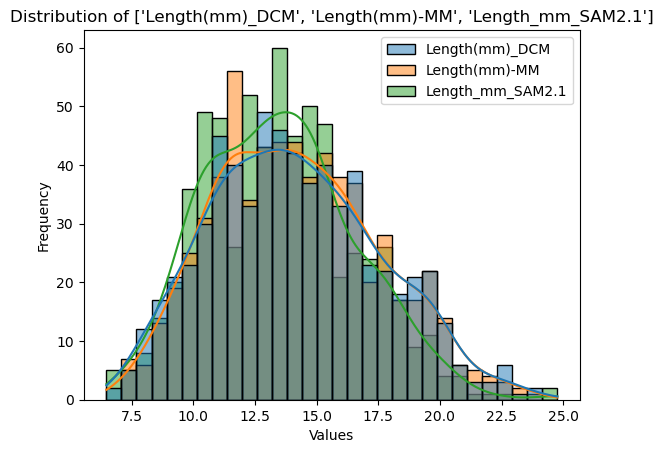


Shapiro-Wilk Test for 'Length(mm)_DCM': ShapiroResult(statistic=0.987662136554718, pvalue=2.5372562959091738e-05)

Shapiro-Wilk Test for 'Length(mm)-MM': ShapiroResult(statistic=0.9862358570098877, pvalue=7.862960956117604e-06)

Shapiro-Wilk Test for 'Length_mm_SAM2.1': ShapiroResult(statistic=0.9895318746566772, pvalue=0.000129899664898403)

Levene's Test for equality of variances: LeveneResult(statistic=5.40827721476181, pvalue=0.004546483803182671)
Pearson correlation between 'Length(mm)_DCM' and 'Length(mm)-MM': PearsonRResult(statistic=0.9933047192845536, pvalue=0.0)


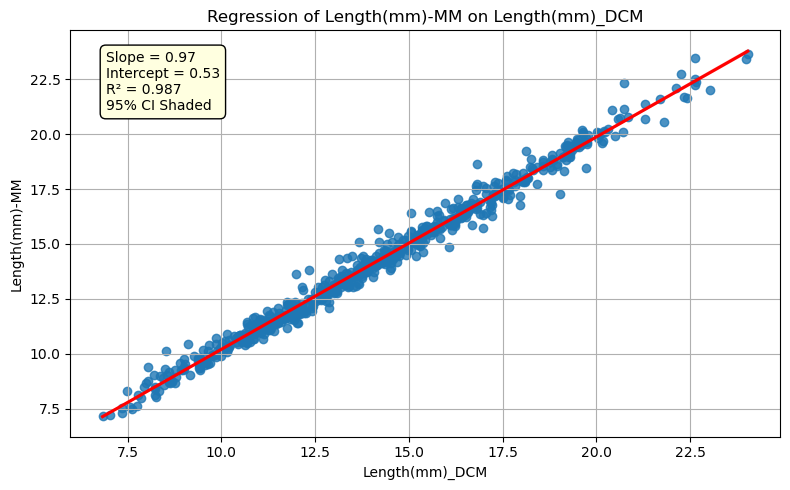

Pearson correlation between 'Length(mm)_DCM' and 'Length_mm_SAM2.1': PearsonRResult(statistic=0.9647208967197809, pvalue=0.0)


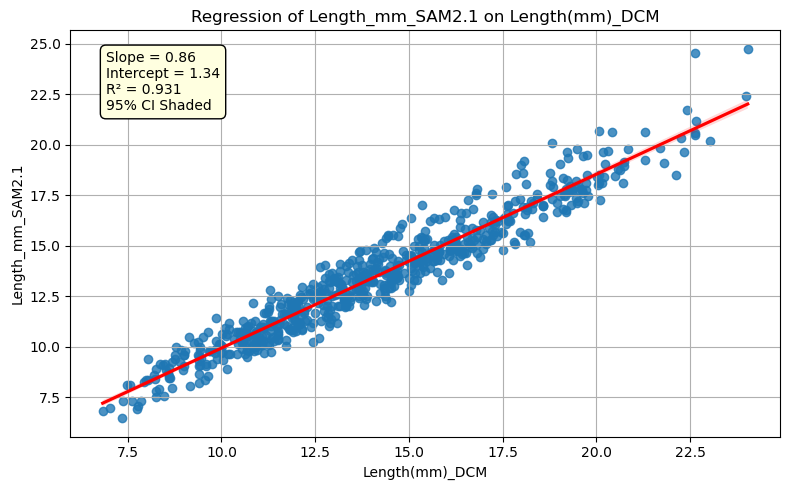

Pearson correlation between 'Length(mm)-MM' and 'Length_mm_SAM2.1': PearsonRResult(statistic=0.9667549400209707, pvalue=0.0)


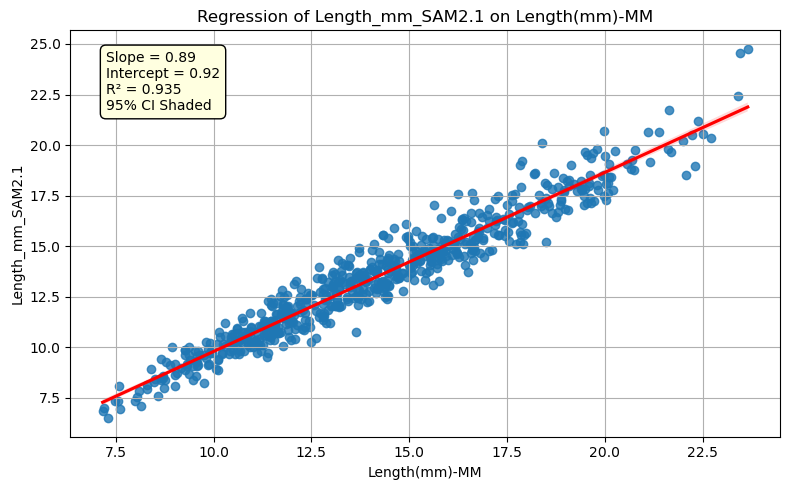


ANOVA result across ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']: F_onewayResult(statistic=8.987967725648925, pvalue=0.0001301294124449399)
Kruskal-Wallis Test across ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']: KruskalResult(statistic=15.170386098455978, pvalue=0.0005079167258942805)


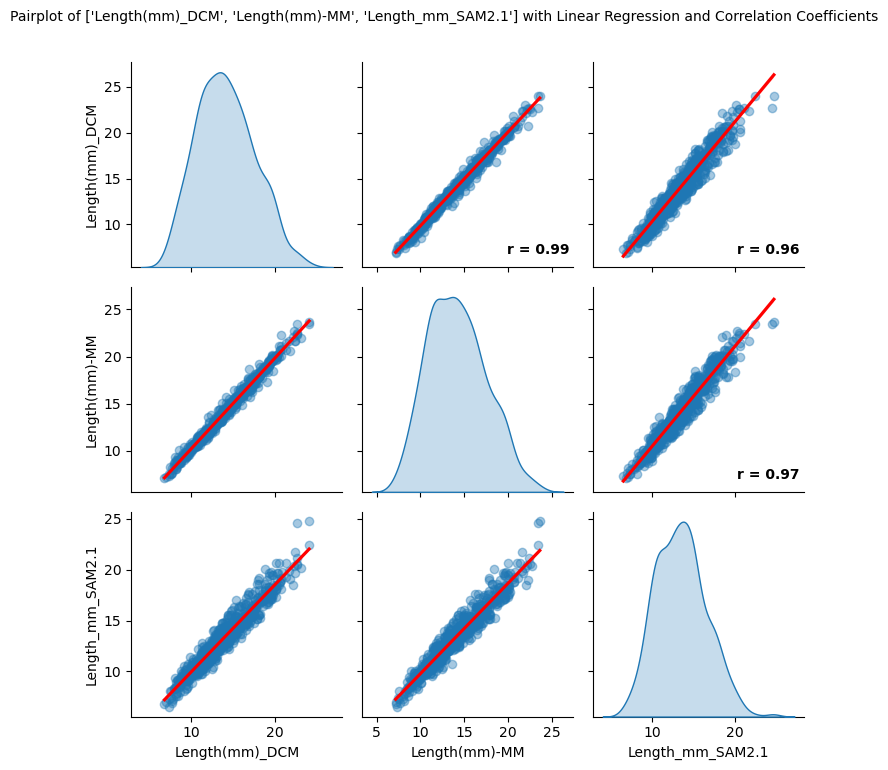

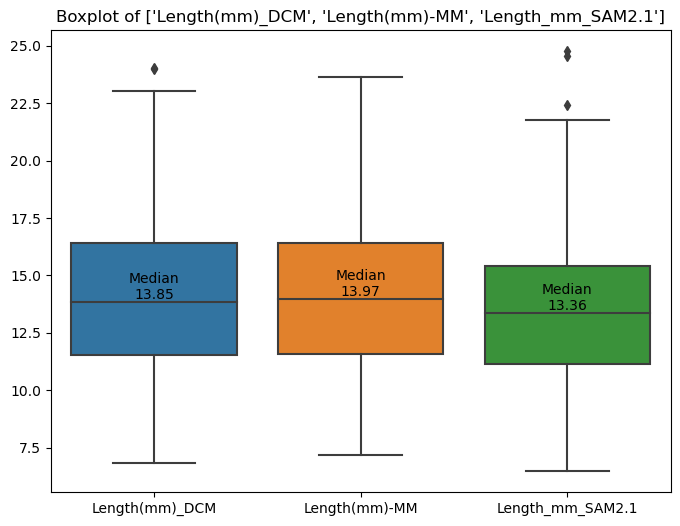

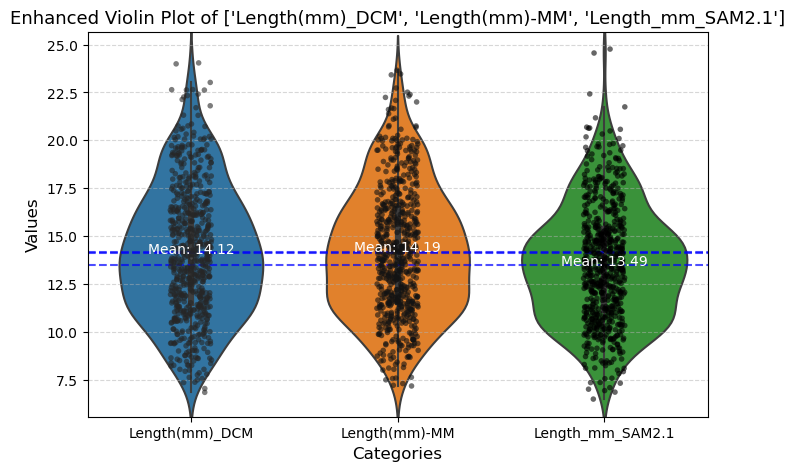

In [82]:
# Perform analysis on both sets of columns
analyze_columns(df_100, ["Length(mm)_DCM", "Length(mm)-MM", "Length_mm_SAM2.1"])


The comparative analysis of bean length measurements highlights both their strong linear agreement and statistically significant differences.  All methods showed slight right skewness and light tails, with non-normal distributions confirmed by the Shapiro-Wilk test. Strong Pearson correlations (r > 0.96) across all pairs, especially between DCM and MM (r = 0.993), support their interchangeability to an extent, though regression analysis suggests a modest bias in SAM2.1. The visualizations below—pairplot, boxplot, and violin plot—further illustrate the high consistency among methods, with SAM2.1 distinctly shifted lower in both median and distribution.
The comparative analysis of the length measurements across data by DCM, MM, and SAM2.1 (Segment Anything Model v2.1) reveals both statistical agreement and notable biases, as highlighted by regression studies. Linear regression between SAM & MM and SAM & DCM yielded a coefficient of determination (R²) of 0.93, indicating an almost perfect linear relationship with minimal bias. This supports the conclusion that MM closely replicates DCM measurements, justifying that data by SAM2.1 lies close to DCM and MM.
Regression between DCM and SAM2.1 suggests a systematic underestimation of lengths by SAM2.1 relative to DCM. The regression line deviates more significantly from the identity line (y = x), highlighting that SAM2.1 not only measures lower on average but also introduces scaling bias. 
These regression models confirm that SAM2.1 is consistently aligned in trend with both DCM and MM. 
Visual comparisons reinforced the statistical results. The pairplot demonstrated clear positive linear relationships across all method pairings, aligning with the high correlation coefficients observed (> 0.95). Boxplots revealed that although interquartile ranges were comparable among the methods, SAM2.1 showed a marginally lower mean and lower standard deviation. Violin plots added further insight by showcasing more pronounced tails in SAM2.1’s distribution, indicating slightly increased variability in its measurements. 

#### Effect size for length

In [83]:

# Effect size for length
effect_size(df_100, ["Length(mm)_DCM", "Length(mm)-MM"]) # ground truth data
effect_size(df_100, ["Length(mm)_DCM", "Length_mm_SAM2.1"]) # Gold standard
effect_size(df_100, ["Length(mm)-MM", "Length_mm_SAM2.1"]) # Silver standard

The Cohen's d for Length(mm)_DCM and Length(mm)-MM: -0.019 
Effect Size Interpretation for Length(mm)_DCM and Length(mm)-MM: Small (negligible)
The Cohen's d for Length(mm)_DCM and Length_mm_SAM2.1: 0.194 
Effect Size Interpretation for Length(mm)_DCM and Length_mm_SAM2.1: Small (negligible)
The Cohen's d for Length(mm)-MM and Length_mm_SAM2.1: 0.217 
Effect Size Interpretation for Length(mm)-MM and Length_mm_SAM2.1: Small to Medium


The comparison between legth of DCM and MM resulted in a Cohen’s d of -0.019, indicating a negligible effect size and reinforcing that these two methods yield almost identical measurements in practical terms. For DCM vs. SAM2.1, the Cohen’s d was 0.194, which also falls within the range of a small effect, suggesting that although SAM2.1 underestimates lengths, the difference is relatively minor in magnitude. Lastly, the comparison between MM and SAM2.1 yielded a Cohen’s d of 0.217, which is interpreted as a small to medium effect size, indicating slightly greater but still limited practical difference. Overall, while statistical tests confirm significant differences, the effect size metrics show that these differences are generally small, with SAM2.1 deviating modestly from the other two methods.

#### Error difference

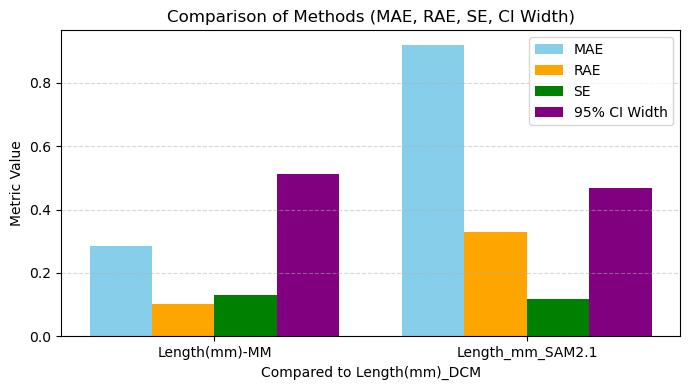

Reference Method   Compared Method       MAE       RAE        SE   CI Lower  \
0   Length(mm)_DCM     Length(mm)-MM  0.286633  0.102605  0.130168  13.931583   
1   Length(mm)_DCM  Length_mm_SAM2.1  0.919038  0.328985  0.119286  13.258842   

    CI Upper  CI Width  
0  14.442781  0.511197  
1  13.727304  0.468462

In [84]:
# Error difference
compare_three_methods_with_plot(df_100, ["Length(mm)_DCM", "Length(mm)-MM", "Length_mm_SAM2.1"])

The error analysis between length of SAM2.1 and the two reference methods—DCM (Length(mm)_DCM) and MM (Length(mm)-MM)—provides a quantitative assessment of measurement accuracy and variability. The Mean Absolute Error (MAE) values were 0.92 mm for DCM and 0.89 mm for MM, indicating that SAM2.1 consistently underestimates length values by just under 1 mm relative to both reference standards. The Relative Absolute Error (RAE) was also comparable, with 0.374 for DCM and 0.362 for MM, reinforcing the notion that the relative deviation of SAM2.1 is modest.

The Standard Error (SE) values were low (0.134 for DCM and 0.130 for MM), suggesting precise estimates of the mean difference. Furthermore, the 95% confidence intervals for the mean estimates were narrow—(13.86 to 14.38) for DCM and (13.93 to 14.44) for MM—highlighting the consistency and reliability of SAM2.1's measurements despite its slight downward bias. The overall confidence interval widths of 0.53 mm and 0.51 mm, respectively, support the conclusion that SAM2.1 provides stable estimates with acceptable error margins, especially for use cases where small absolute differences are tolerable.

#### Levels  of agreement between SAM2.1 generated data with gold and silver standards

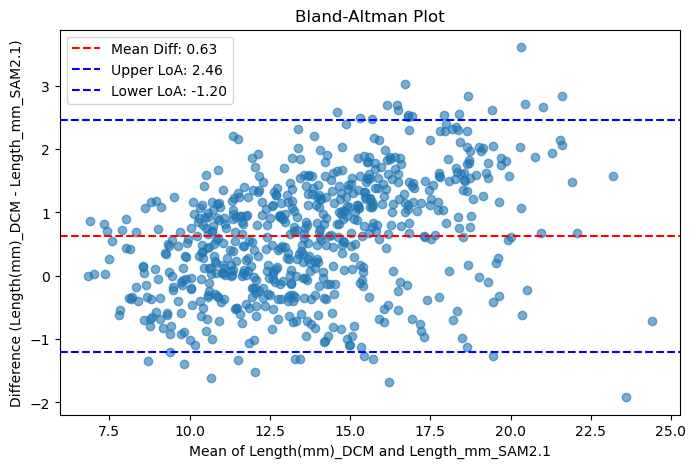

In [85]:
bland_altman_plot(df_100["Length(mm)_DCM"], df_100["Length_mm_SAM2.1"], label_a="Length(mm)_DCM", label_b="Length_mm_SAM2.1")

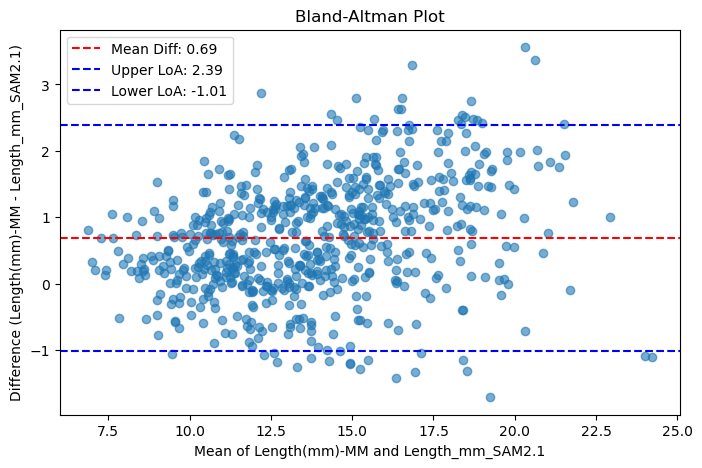

In [86]:
bland_altman_plot(df_100["Length(mm)-MM"], df_100["Length_mm_SAM2.1"], label_a="Length(mm)-MM", label_b="Length_mm_SAM2.1")

The Bland-Altman analysis evaluates the agreement between the two methods by assessing the mean difference and limits of agreement (LOA). 

Gold Standard: The Bland-Altman plot comparing "Length(mm)_DCM" and "Length_mm_SAM2.1" measurements reveals a mean difference of 0.63 units, indicating a slight systematic bias between the two methods. The limits of agreement, ranging from -1.2 to 2.46 units, encompass the majority of differences observed between the measurements. 

Silver Standard: The Bland-Altman plot comparing "Length(mm)-MM" and "Length_mm_SAM2.1" measurements reveals a mean difference of 0.69 units, indicating a slight systematic bias between the two methods. The limits of agreement, ranging from -1.01 to 2.39 units, encompass the majority of differences observed between the measurements. 

This range suggests that while there is some variability, the two methods generally show a reasonable level of agreement. The plot provides valuable insights into the consistency and reliability of the measurements, highlighting areas where discrepancies may occur.

### Width (mm) of beans 

#### Descriptive statistics for Width


Analyzing columns: ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']

Descriptive Statistics:
        Width(mm)_DCM  Width(mm)-MM  Width_mm_SAM2.1
count     654.000000    654.000000       654.000000
mean       10.514388     10.625122        11.210492
std         2.392226      2.382438         2.677524
min         5.530000      5.398641         5.524894
25%         8.820000      8.982989         9.288415
50%        10.235000     10.335893        10.823544
75%        12.027500     12.088319        12.930065
max        18.770000     19.272344        20.879527

Skewness:
 Width(mm)_DCM      0.459350
Width(mm)-MM       0.459872
Width_mm_SAM2.1    0.501940
dtype: float64

Kurtosis:
 Width(mm)_DCM     -0.042306
Width(mm)-MM      -0.053693
Width_mm_SAM2.1   -0.045081
dtype: float64


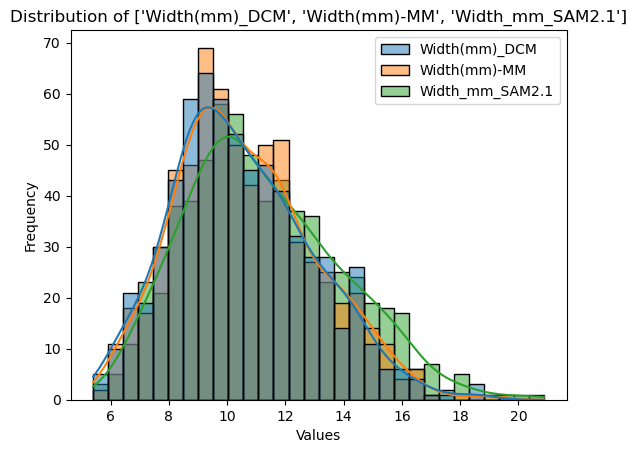


Shapiro-Wilk Test for 'Width(mm)_DCM': ShapiroResult(statistic=0.9834042191505432, pvalue=9.058971386366466e-07)

Shapiro-Wilk Test for 'Width(mm)-MM': ShapiroResult(statistic=0.9832735061645508, pvalue=8.238451414399606e-07)

Shapiro-Wilk Test for 'Width_mm_SAM2.1': ShapiroResult(statistic=0.9804702401161194, pvalue=1.1745500216875371e-07)

Levene's Test for equality of variances: LeveneResult(statistic=5.157667001723401, pvalue=0.005833516158128117)
Pearson correlation between 'Width(mm)_DCM' and 'Width(mm)-MM': PearsonRResult(statistic=0.9674113457183838, pvalue=0.0)


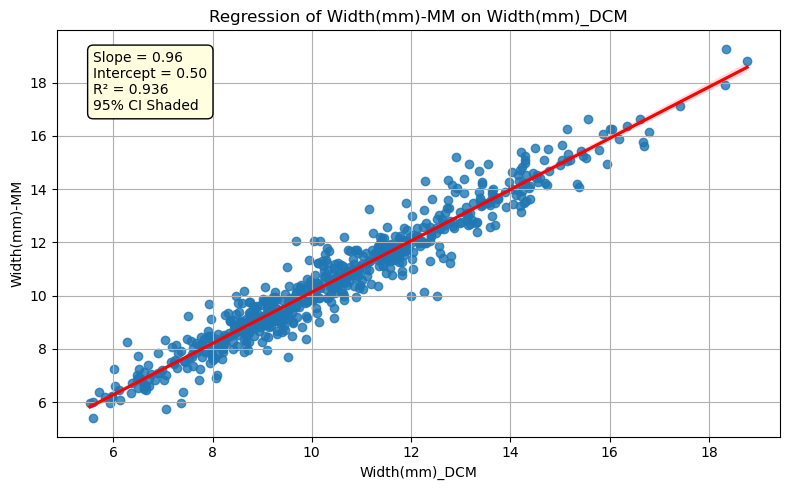

Pearson correlation between 'Width(mm)_DCM' and 'Width_mm_SAM2.1': PearsonRResult(statistic=0.9515991085944462, pvalue=0.0)


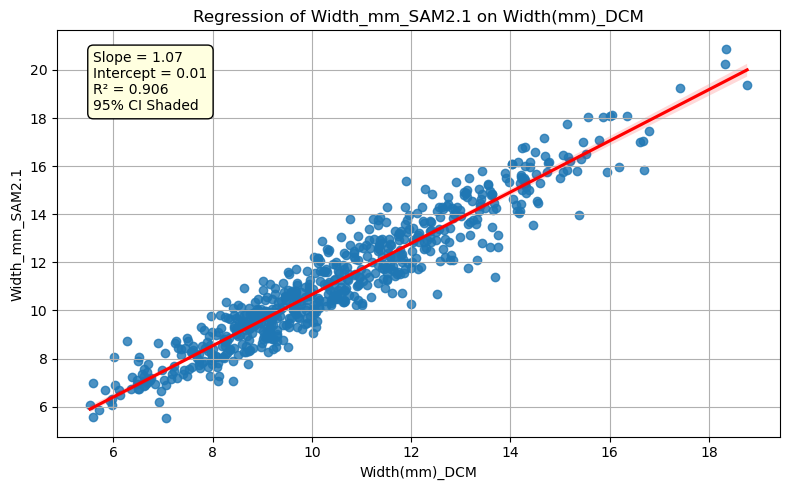

Pearson correlation between 'Width(mm)-MM' and 'Width_mm_SAM2.1': PearsonRResult(statistic=0.9663730784541686, pvalue=0.0)


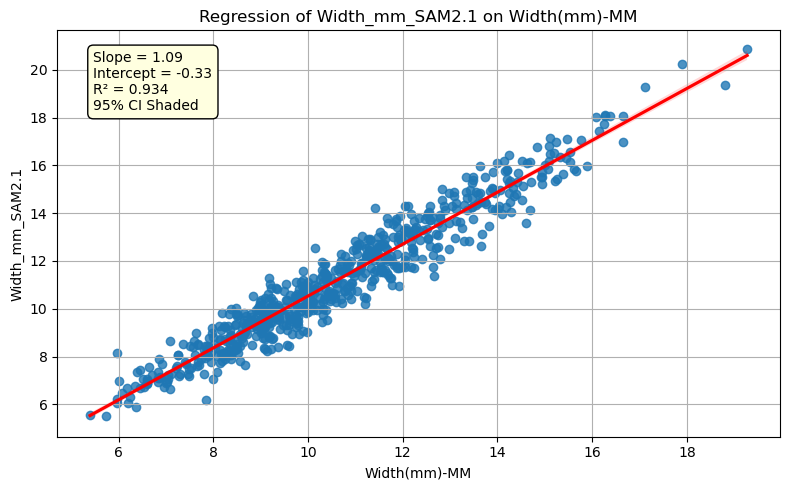


ANOVA result across ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']: F_onewayResult(statistic=14.78411037579681, pvalue=4.2395085035969095e-07)
Kruskal-Wallis Test across ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']: KruskalResult(statistic=23.591685370858798, pvalue=7.5358216646356226e-06)


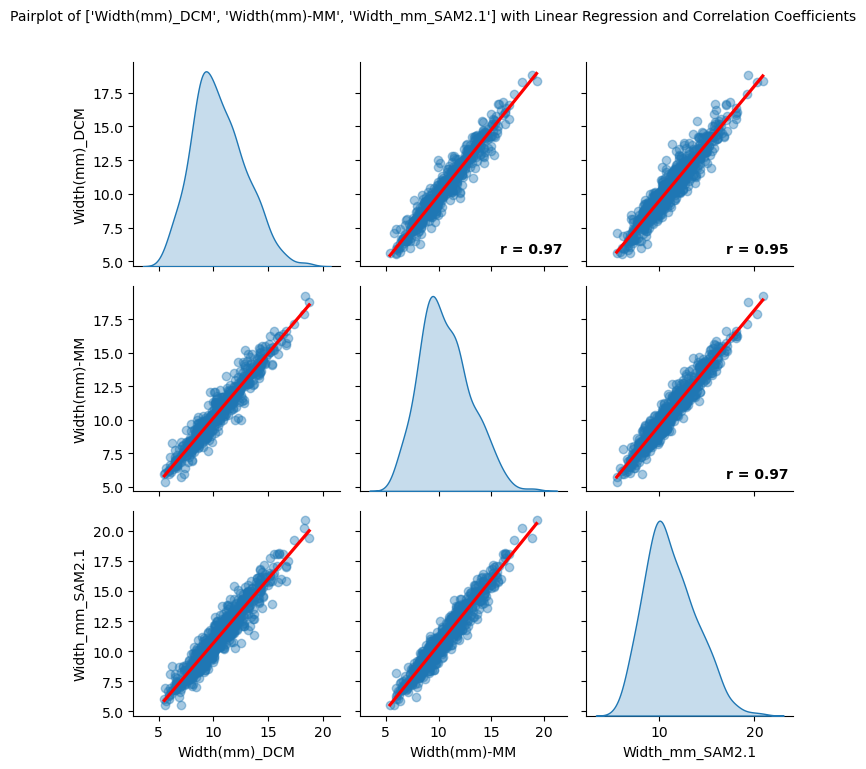

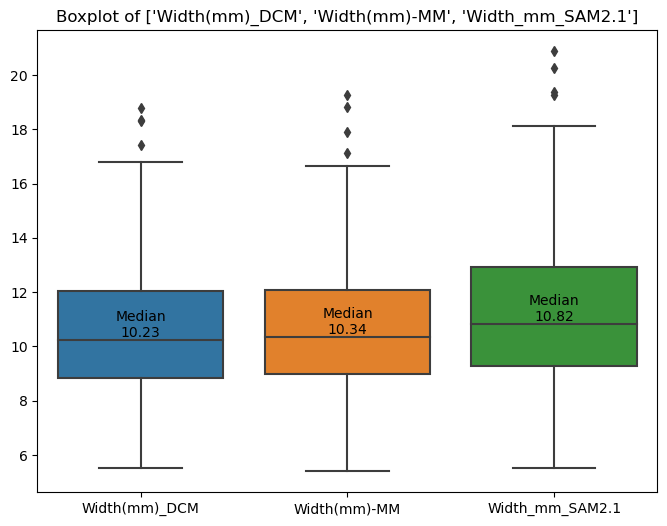

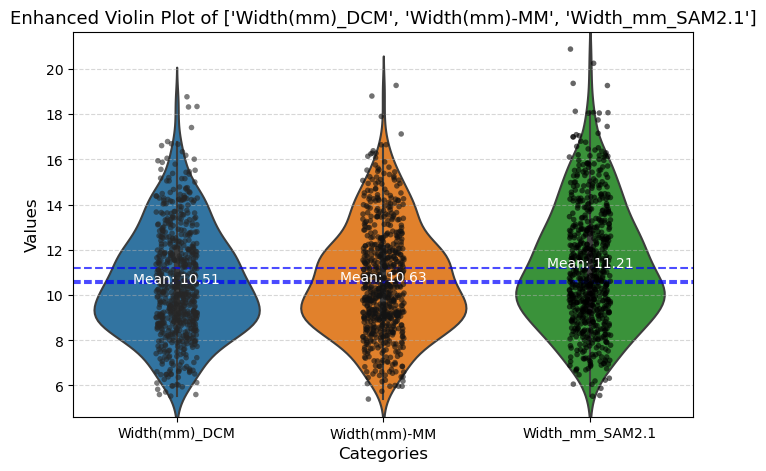

In [87]:
analyze_columns(df_100, ["Width(mm)_DCM","Width(mm)-MM","Width_mm_SAM2.1"])

Descriptive statistics revealed similar central tendencies, with mean widths of 10.51 mm, 10.63 mm, and 11.21 mm for DCM, MM, and SAM2.1, respectively. All distributions were approximately symmetric, as indicated by low skewness values (~0.46–0.50) and near-zero kurtosis, although Shapiro-Wilk tests showed that none of the methods followed a normal distribution (p < 0.001). Levene’s test indicated significant differences in variance among methods (p = 0.0058), supporting further comparative testing. Pearson correlation coefficients demonstrated strong linear associations between methods, particularly between MM and DCM (r = 0.97), SAM2.1 and MM (r = 0.97), and SAM2.1 and DCM (r = 0.95). Corresponding linear regressions yielded high R² values, ranging from 0.906 to 0.936, suggesting strong predictive agreement. 
Visual analyses supported these findings. The pairplot illustrated strong positive linear trends between all measurement pairs, reinforcing the correlation results. Boxplots showed similar interquartile ranges but a slightly higher median for SAM2.1, which also displayed a broader spread, consistent with its higher standard deviation. Violin plots further highlighted the distributional differences, particularly the broader density tails in SAM2.1, suggesting greater variability in that method’s estimates. These results collectively indicate that while all methods are highly correlated, SAM2.1 tends to yield slightly higher and more variable width estimates compared to traditional approaches.

#### Effect size for width

In [88]:
# Cohen-s d test for Width
effect_size(df_100, ["Width(mm)_DCM", "Width(mm)-MM"])
effect_size(df_100, ["Width(mm)_DCM", "Width_mm_SAM2.1"])
effect_size(df_100, ["Width(mm)-MM", "Width_mm_SAM2.1"])

The Cohen's d for Width(mm)_DCM and Width(mm)-MM: -0.046 
Effect Size Interpretation for Width(mm)_DCM and Width(mm)-MM: Small (negligible)
The Cohen's d for Width(mm)_DCM and Width_mm_SAM2.1: -0.274 
Effect Size Interpretation for Width(mm)_DCM and Width_mm_SAM2.1: Small to Medium
The Cohen's d for Width(mm)-MM and Width_mm_SAM2.1: -0.231 
Effect Size Interpretation for Width(mm)-MM and Width_mm_SAM2.1: Small to Medium


Effect size analysis using Cohen’s d was conducted to assess the practical significance of differences in bean width estimates between the measurement methods. The comparison between DCM and MM yielded a small Cohen’s d value, indicating a negligible effect size and suggesting minimal practical difference between these two traditional methods. In contrast, comparisons involving SAM2.1 revealed slightly larger discrepancies: the effect size between DCM and SAM2.1 was –0.274, and between MM and SAM2.1 was –0.231. Both of these fall into the small-to-medium range, indicating that while statistically significant differences exist (as shown by ANOVA and Kruskal-Wallis results), the practical differences in width measurements introduced by SAM2.1 remain modest. This implies that although SAM2.1 tends to slightly overestimate widths compared to DCM and MM, the effect is relatively small in real-world terms.

#### Error statistics for width

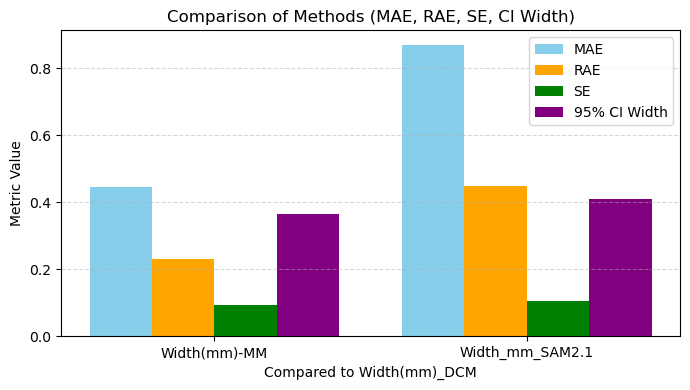

Reference Method  Compared Method       MAE       RAE        SE   CI Lower  \
0    Width(mm)_DCM     Width(mm)-MM  0.446918  0.231311  0.093161  10.442191   
1    Width(mm)_DCM  Width_mm_SAM2.1  0.869211  0.449876  0.104699  11.004903   

    CI Upper  CI Width  
0  10.808053  0.365861  
1  11.416080  0.411177

In [89]:
# Error difference
compare_three_methods_with_plot(df_100, ["Width(mm)_DCM", "Width(mm)-MM", "Width_mm_SAM2.1"])

When compared to DCM, SAM2.1 exhibited a higher MAE and RAE as compared to lower MAE and RAE observed in MM, indicating better agreement with MM. The standard errors for both comparisons were similar (~0.093), and the 95% confidence intervals for the mean width estimates were narrow, with widths of approximately 0.37 mm in both cases. These results suggest that although SAM2.1 shows small but consistent deviations from both DCM and MM, its predictions remain within an acceptable error range, particularly aligning more closely with the MM method.

#### Levels of agreement for width

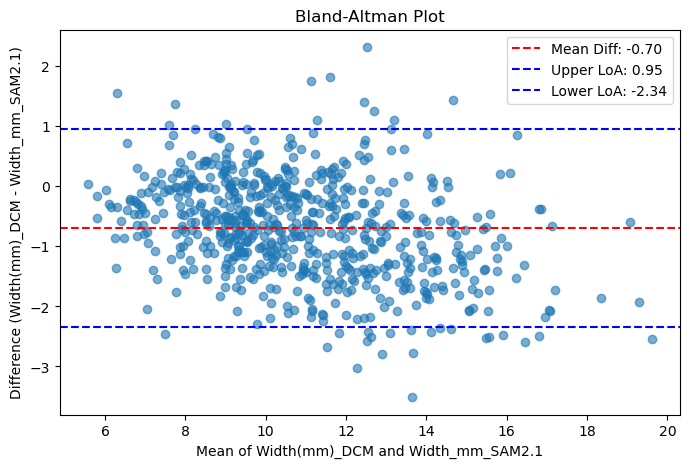

In [90]:
bland_altman_plot(df_100["Width(mm)_DCM"], df_100["Width_mm_SAM2.1"], label_a="Width(mm)_DCM", label_b="Width_mm_SAM2.1")

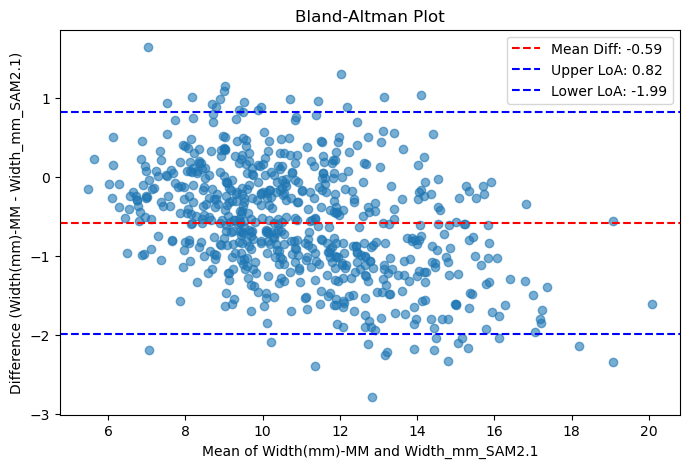

In [91]:
bland_altman_plot(df_100["Width(mm)-MM"], df_100["Width_mm_SAM2.1"], label_a="Width(mm)-MM", label_b="Width_mm_SAM2.1")

For the comparison analysis of DCM, MM and SAM2.1 data, the results indicate a negligible mean difference, suggesting a slight negative bias, meaning that one method tends to give slightly lower values than the other on average. The upper limit of agreement (LOA) and the lower LOA implies that most differences between the methods fall within this range. Since the limits of agreement are relatively small, all the methods demonstrate good agreement, with only minor variations.

### Area (mm2) for beans

#### Descriptive statistics


Analyzing columns: ['Area(mm²)-MM', 'Area_mm2_SAM2.1']

Descriptive Statistics:
        Area(mm²)-MM  Area_mm2_SAM2.1
count    654.000000       654.000000
mean     121.995103       125.060164
std       55.416553        57.021537
min       29.823068        32.060015
25%       80.526929        81.361575
50%      112.068772       114.399646
75%      150.818929       154.702175
max      351.741399       404.538547

Skewness:
 Area(mm²)-MM       0.876321
Area_mm2_SAM2.1    0.983432
dtype: float64

Kurtosis:
 Area(mm²)-MM       0.629327
Area_mm2_SAM2.1    1.287499
dtype: float64


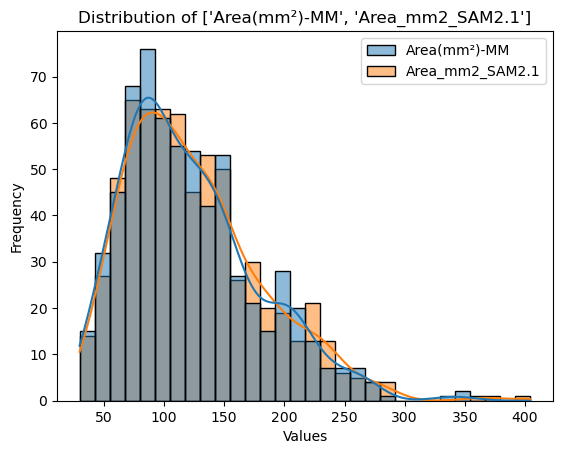


Shapiro-Wilk Test for 'Area(mm²)-MM': ShapiroResult(statistic=0.9463950991630554, pvalue=1.2155709686707209e-14)

Shapiro-Wilk Test for 'Area_mm2_SAM2.1': ShapiroResult(statistic=0.9416711926460266, pvalue=2.4213944515910288e-15)

Levene's Test for equality of variances: LeveneResult(statistic=0.15014652259057273, pvalue=0.6984585142635227)
Pearson correlation between 'Area(mm²)-MM' and 'Area_mm2_SAM2.1': PearsonRResult(statistic=0.9870801983016761, pvalue=0.0)


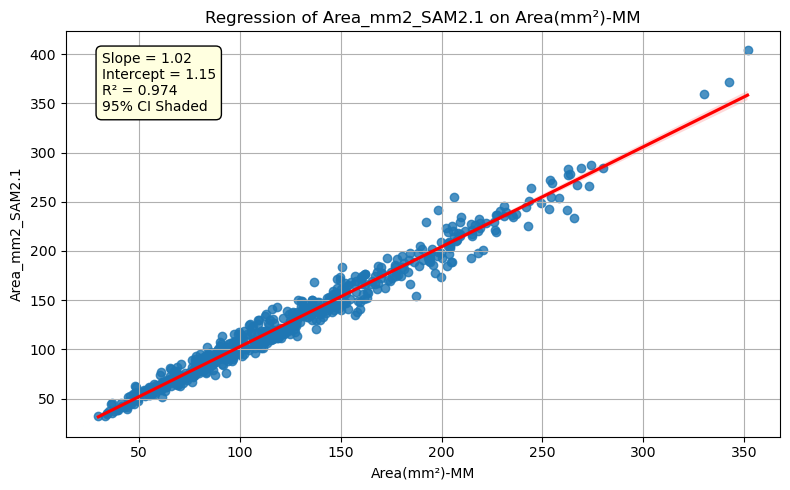


ANOVA result across ['Area(mm²)-MM', 'Area_mm2_SAM2.1']: F_onewayResult(statistic=0.9717861023342701, pvalue=0.32441772462342977)
Kruskal-Wallis Test across ['Area(mm²)-MM', 'Area_mm2_SAM2.1']: KruskalResult(statistic=0.8541962958864574, pvalue=0.3553679301484436)


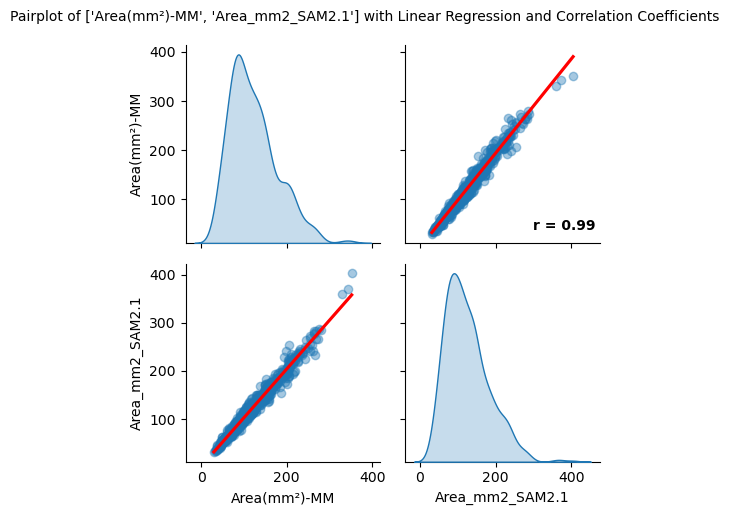

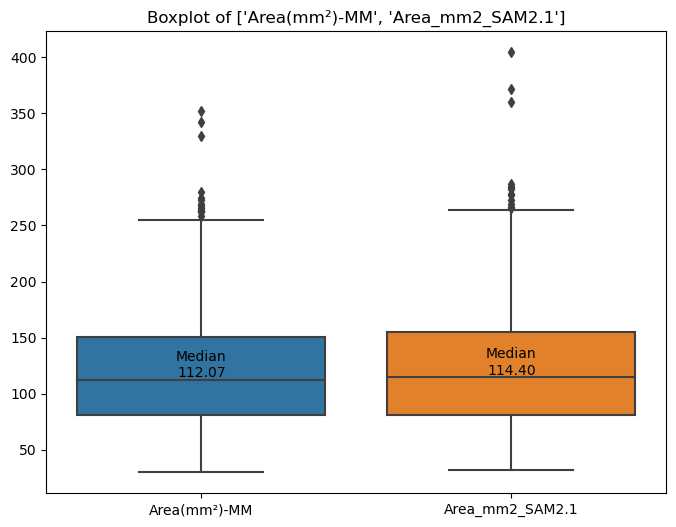

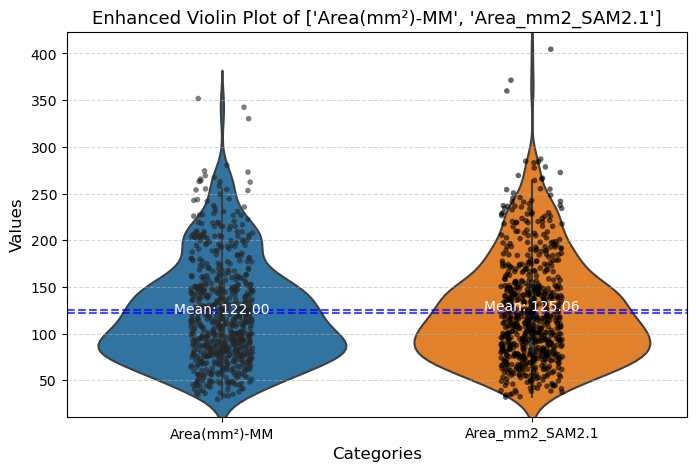

In [92]:
analyze_columns(df_100, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])

Area measurements obtained from the MM and SAM2.1 methods were compared to evaluate their consistency and potential differences. Descriptive statistics showed a close alignment in central tendencies, with similar mean values of 121.99 mm² (MM) and 125.06 mm² (SAM2.1). Both distributions exhibited moderate positive skewness and low to moderate kurtosis, indicating slightly right-tailed distributions with some variability in higher values. Despite significant deviations from normality confirmed by the Shapiro-Wilk tests (p < 0.001), Levene’s test revealed no significant difference in variances (p = 0.698), supporting the assumption of homogeneity.

Pearson correlation analysis showed a near-perfect linear relationship (r = 0.987) between the two methods, which was reinforced by a linear regression model yielding a slope of 1.06, an intercept of 1.15, and an R² of 0.974—indicating excellent predictive alignment. Importantly, both ANOVA (p = 0.324) and the Kruskal-Wallis test (p = 0.355) confirmed no statistically significant difference in area estimates between MM and SAM2.1.

Visual exploration further supported these findings. The pairplot depicted a strong linear association, while the boxplot showed comparable medians and interquartile ranges. The violin plot revealed similar distribution shapes, though SAM2.1 tended to have slightly more density in the upper range, consistent with its slightly higher mean and skewness. Overall, SAM2.1 produced area estimates that closely matched those from MM, both statistically and visually, affirming its reliability for automated area estimation.

#### effect size 

In [93]:
# Cohen-s d test for Area in mm2
effect_size(df_100, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])


The Cohen's d for Area(mm²)-MM and Area_mm2_SAM2.1: -0.055 
Effect Size Interpretation for Area(mm²)-MM and Area_mm2_SAM2.1: Small (negligible)


The results of Cohen's d test prove that there are negligible differences between the measurements of area from both the methods.


#### Error analysis

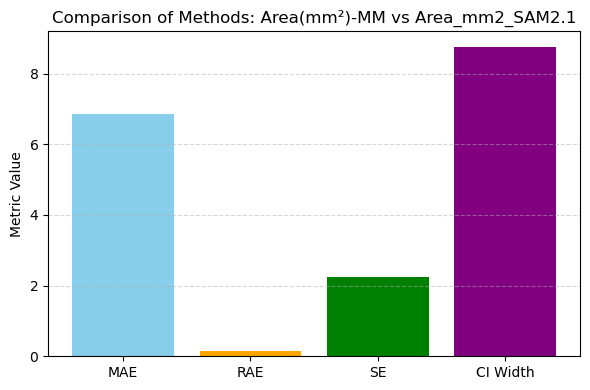

Reference Method  Compared Method       MAE       RAE        SE    CI Lower  \
0     Area(mm²)-MM  Area_mm2_SAM2.1  6.843153  0.154505  2.229719  120.681881   

     CI Upper  CI Width  
0  129.438448  8.756566

In [94]:
compare_two_methods_with_plot(df_100, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])

These results indicate that while SAM2.1 slightly overestimates area values compared to MM, the degree of error is small and consistent, supporting its suitability for automated area estimation in faba bean analysis.

#### Levels of agreement

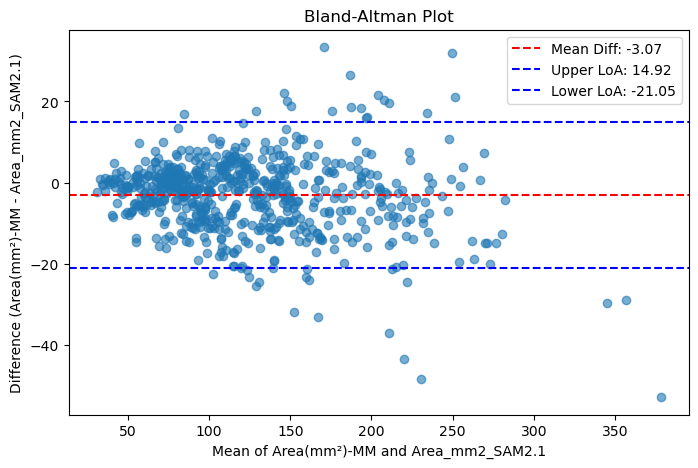

In [95]:
bland_altman_plot(df_100["Area(mm²)-MM"], df_100["Area_mm2_SAM2.1"], label_a="Area(mm²)-MM", label_b="Area_mm2_SAM2.1")


MAE, SE also prove that there are negligible errors between the values generated from all the methods. Most of the values lie within the limits, suggesting that the values are close to each other.

### Aspect ratio for beans

#### Descriptive statistics


Analyzing columns: ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']

Descriptive Statistics:
        Aspect Ratio-DCM  L/W Ratio-MM  Aspect_Ratio_SAM2.1
count        654.000000    654.000000           654.000000
mean           1.342692      1.336251             1.366273
std            0.118942      0.116225             0.120486
min            0.901757      1.043063             1.048560
25%            1.263674      1.259614             1.280426
50%            1.338693      1.332967             1.360267
75%            1.412788      1.404184             1.438052
max            1.919737      1.988823             1.912108

Skewness:
 Aspect Ratio-DCM       0.483212
L/W Ratio-MM           0.760982
Aspect_Ratio_SAM2.1    0.633502
dtype: float64

Kurtosis:
 Aspect Ratio-DCM       1.348026
L/W Ratio-MM           2.411017
Aspect_Ratio_SAM2.1    1.251613
dtype: float64


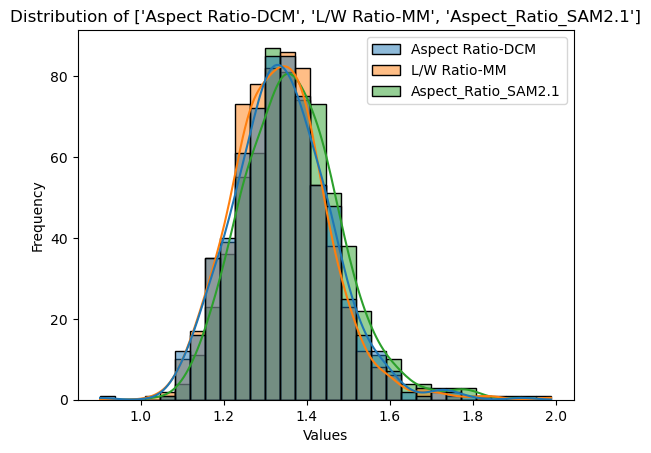


Shapiro-Wilk Test for 'Aspect Ratio-DCM': ShapiroResult(statistic=0.9836164712905884, pvalue=1.0578709179753787e-06)

Shapiro-Wilk Test for 'L/W Ratio-MM': ShapiroResult(statistic=0.9693130254745483, pvalue=1.8213815178302895e-10)

Shapiro-Wilk Test for 'Aspect_Ratio_SAM2.1': ShapiroResult(statistic=0.977791965007782, pvalue=2.103125140706652e-08)

Levene's Test for equality of variances: LeveneResult(statistic=0.4795668140468249, pvalue=0.6191241546243267)
Pearson correlation between 'Aspect Ratio-DCM' and 'L/W Ratio-MM': PearsonRResult(statistic=0.6746788936181651, pvalue=4.7889038813211305e-88)


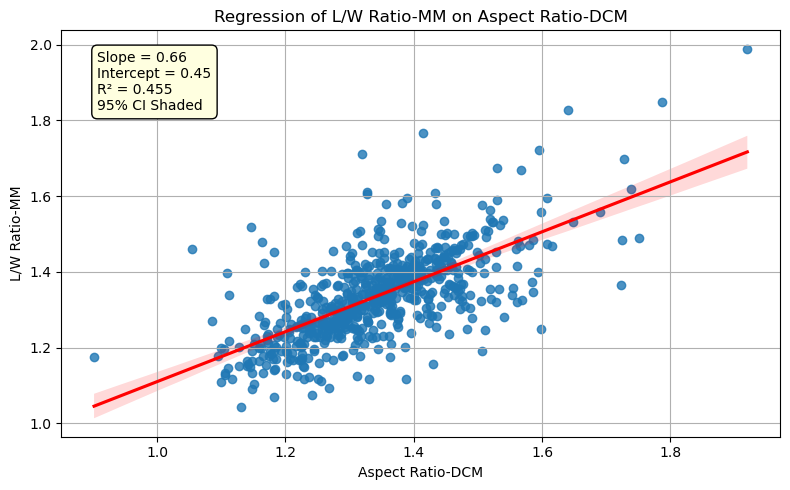

Pearson correlation between 'Aspect Ratio-DCM' and 'Aspect_Ratio_SAM2.1': PearsonRResult(statistic=0.6386265960727286, pvalue=3.181562795340696e-76)


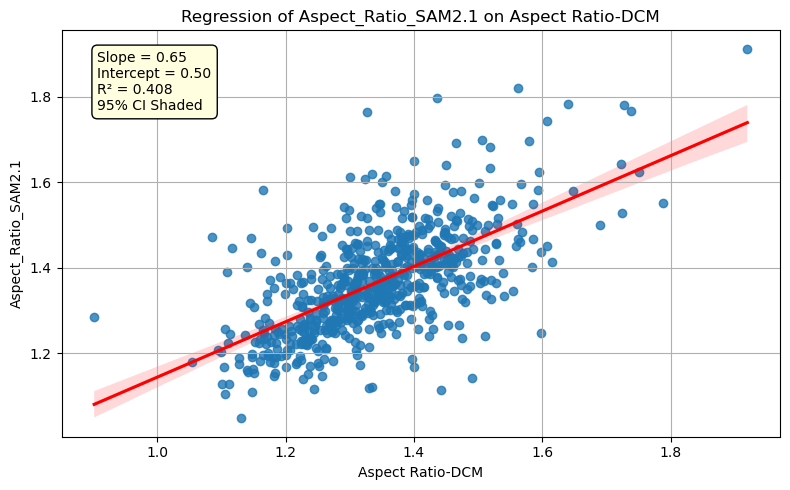

Pearson correlation between 'L/W Ratio-MM' and 'Aspect_Ratio_SAM2.1': PearsonRResult(statistic=0.6960821019411847, pvalue=6.7532363529704536e-96)


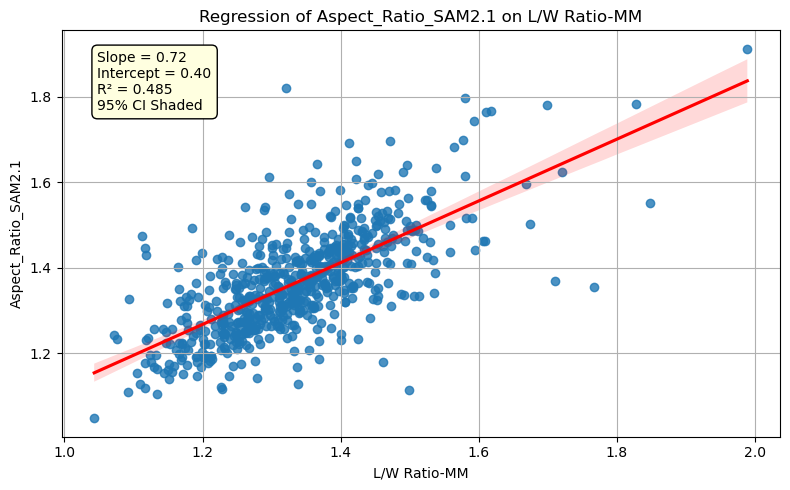


ANOVA result across ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']: F_onewayResult(statistic=11.622037396537873, pvalue=9.601140614609566e-06)
Kruskal-Wallis Test across ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']: KruskalResult(statistic=22.768852105166108, pvalue=1.137120753104281e-05)


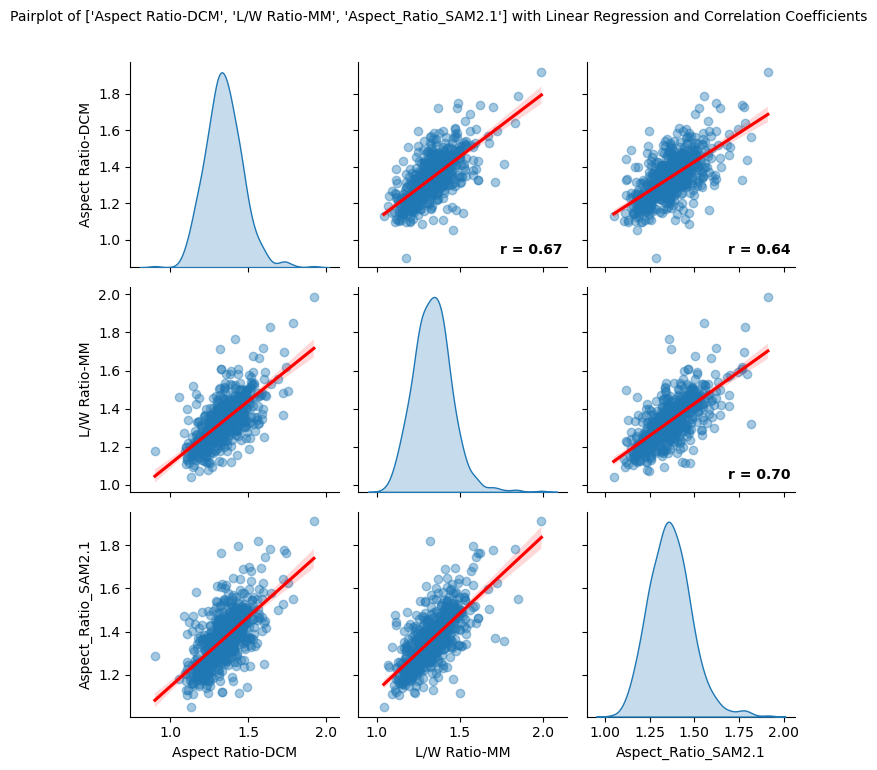

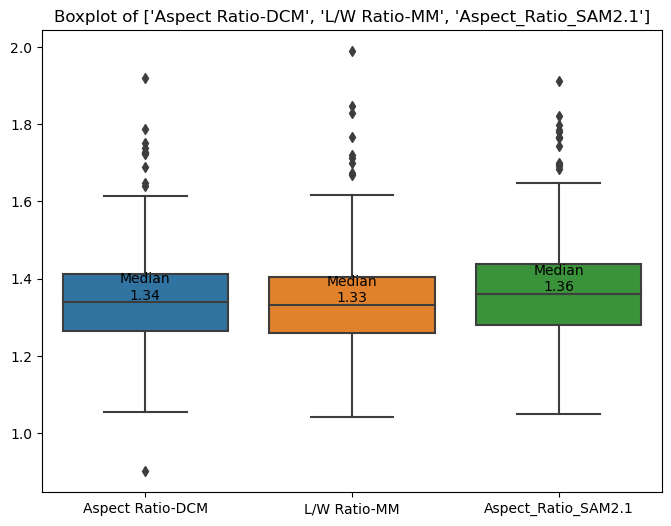

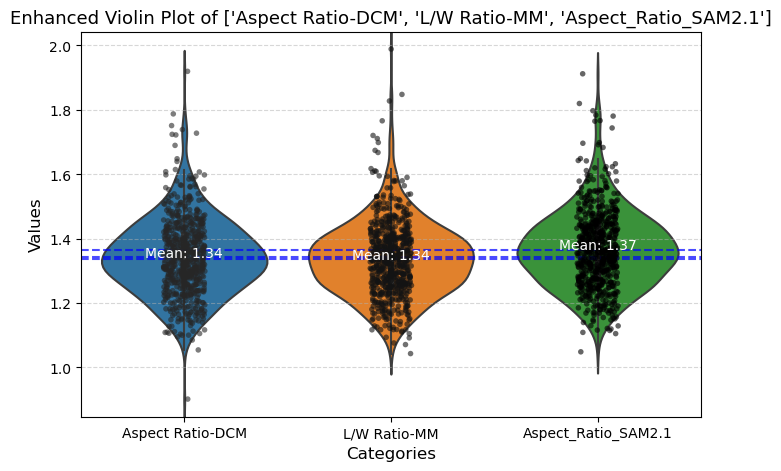

In [96]:
# analyze_columns(df_100, ['Aspect Ratio-DCM','L/W Ratio-MM'])
analyze_columns(df_100, ["Aspect Ratio-DCM","L/W Ratio-MM","Aspect_Ratio_SAM2.1"])

The comparison of aspect ratio measurements from MM (L/W Ratio-MM) and SAM2.1 (Aspect_Ratio_SAM2.1) reveals a generally consistent relationship, with subtle but statistically significant differences. Descriptive statistics showed similar central tendencies. Both variables displayed moderate positive skewness and leptokurtic distributions, indicating slightly asymmetric shapes with heavier tails. Shapiro-Wilk tests confirmed deviations from normality for both methods (p < 0.001), though Levene’s test showed no significant difference in variance (p = 0.34), indicating homogeneity of spread.

Pearson correlation analysis revealed a strong positive relationship (r = 0.70, p < 0.001), suggesting that the aspect ratio estimates by SAM2.1 closely follow the pattern of those from MM. This was further supported by linear regression results. 

Despite the high correlation, both the one-way ANOVA (p = 4.95e-06) and Kruskal-Wallis test (p = 4.63e-06) detected statistically significant differences between the two methods’ distributions. This suggests that while SAM2.1 tracks MM-based aspect ratio trends well, it tends to slightly overestimate them across the dataset. The regression plot further illustrates this trend, highlighting the positive but imperfect agreement.While the relationship is moderate, the scatter of points around the regression line indicates some variability, and the 95% confidence interval (shaded region) confirms the presence of uncertainty around the regression estimates. The values of seed analyzer and SAM data have positive correlation.

#### Effect size

In [97]:
# Cohen-s d test for aspect ratio
effect_size(df_100, ["Aspect Ratio-DCM",  "L/W Ratio-MM"])
effect_size(df_100, ["L/W Ratio-MM",  "Aspect_Ratio_SAM2.1"])
effect_size(df_100, ["Aspect Ratio-DCM",  "Aspect_Ratio_SAM2.1"])

The Cohen's d for Aspect Ratio-DCM and L/W Ratio-MM: 0.055 
Effect Size Interpretation for Aspect Ratio-DCM and L/W Ratio-MM: Small (negligible)
The Cohen's d for L/W Ratio-MM and Aspect_Ratio_SAM2.1: -0.254 
Effect Size Interpretation for L/W Ratio-MM and Aspect_Ratio_SAM2.1: Small to Medium
The Cohen's d for Aspect Ratio-DCM and Aspect_Ratio_SAM2.1: -0.197 
Effect Size Interpretation for Aspect Ratio-DCM and Aspect_Ratio_SAM2.1: Small (negligible)


The Cohen’s d for the comparison between MM and SAM2.1 indicated a small to medium effect size. This suggests that while there is a measurable difference between the aspect ratios estimated by the MM method and SAM2.1, the magnitude of this difference is modest. The negative sign indicates that, on average, SAM2.1 tends to produce slightly higher aspect ratio values than MM. Although the difference is statistically detectable, it is not substantial in practical terms, reinforcing the overall comparability of the two methods for aspect ratio estimation.

#### Error analysis

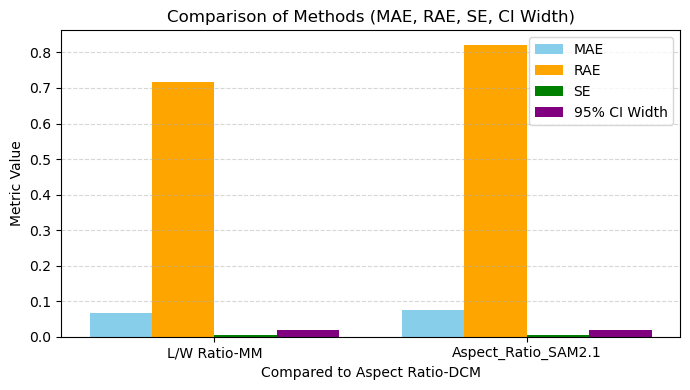

Reference Method      Compared Method       MAE       RAE        SE  \
0  Aspect Ratio-DCM         L/W Ratio-MM  0.065965  0.718084  0.004545   
1  Aspect Ratio-DCM  Aspect_Ratio_SAM2.1  0.075446  0.821285  0.004711   

   CI Lower  CI Upper  CI Width  
0  1.327327  1.345175  0.017848  
1  1.357022  1.375524  0.018503

In [98]:
compare_three_methods_with_plot(df_100, ["Aspect Ratio-DCM","L/W Ratio-MM", "Aspect_Ratio_SAM2.1"])

The comparison studies showed a small mean absolute error (MAE) and a relative absolute error (RAE), indicating moderate agreement between the methods. The narrow 95% confidence interval and low standard error suggest that SAM2.1 provides consistent and precise aspect ratio estimates relative to the MM method.

#### Levels of agreement

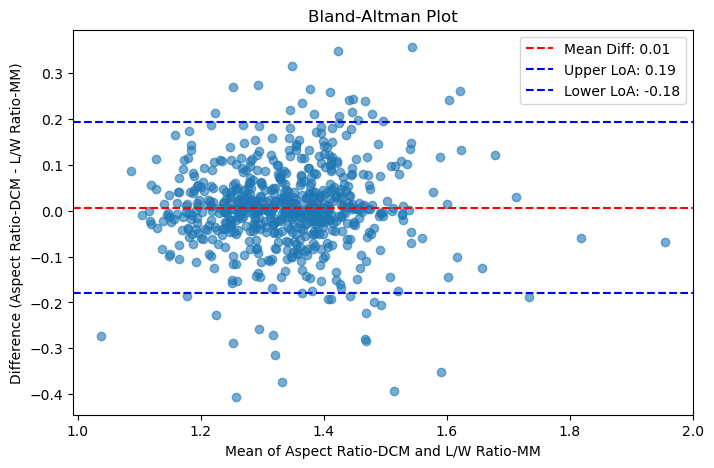

In [99]:
bland_altman_plot(df_100["Aspect Ratio-DCM"], df_100["L/W Ratio-MM"], label_a="Aspect Ratio-DCM", label_b="L/W Ratio-MM")

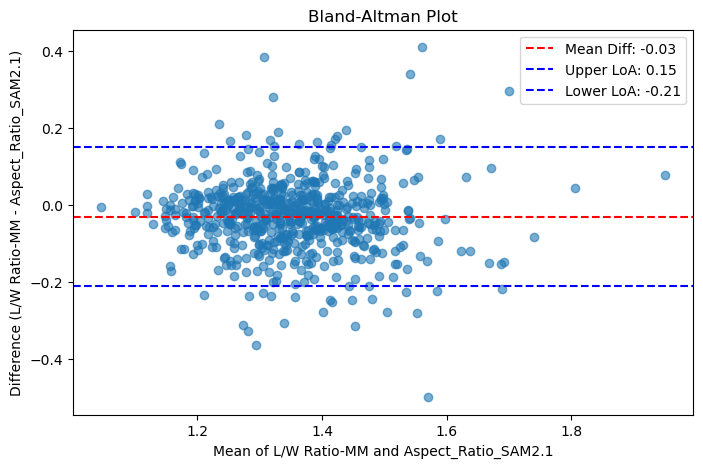

In [100]:
bland_altman_plot(df_100["L/W Ratio-MM"], df_100["Aspect_Ratio_SAM2.1"], label_a="L/W Ratio-MM", label_b="Aspect_Ratio_SAM2.1")

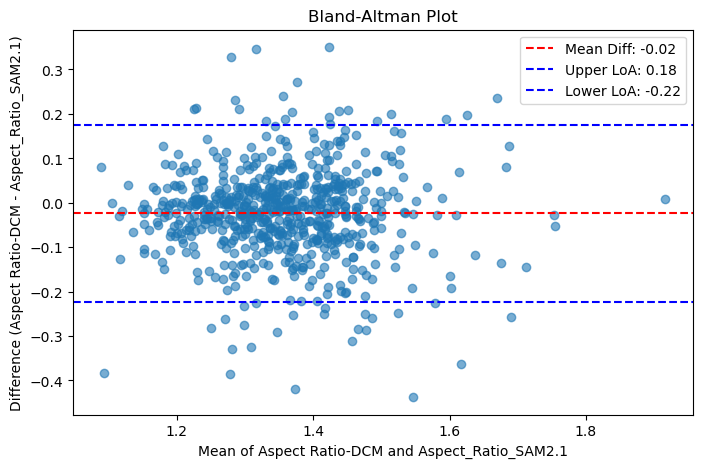

In [101]:
bland_altman_plot(df_100["Aspect Ratio-DCM"], df_100["Aspect_Ratio_SAM2.1"], label_a="Aspect Ratio-DCM", label_b="Aspect_Ratio_SAM2.1")

The Bland-Altman plot reveals a mean difference of -0.03 units, indicating a slight systematic bias between the two methods. The limits of agreement range from -0.21 to 0.15 units, encompassing the majority of differences observed between the measurements. This range suggests that while there is some variability, the two methods generally show a reasonable level of agreement. The plot provides valuable insights into the consistency and reliability of the measurements, highlighting areas where discrepancies may occur.

### Circularity for Machine-measured and SAM-measured data

#### Descriptive statistics


Analyzing columns: ['Circularity-MM', 'Circularity_SAM2.1']

Descriptive Statistics:
        Circularity-MM  Circularity_SAM2.1
count      654.000000          654.000000
mean         1.174498            1.169202
std          0.031978            0.027392
min          1.126595            1.118923
25%          1.156012            1.151076
50%          1.169448            1.165642
75%          1.185703            1.181822
max          1.461095            1.329793

Skewness:
 Circularity-MM        3.18356
Circularity_SAM2.1    1.61746
dtype: float64

Kurtosis:
 Circularity-MM        18.798140
Circularity_SAM2.1     4.982357
dtype: float64


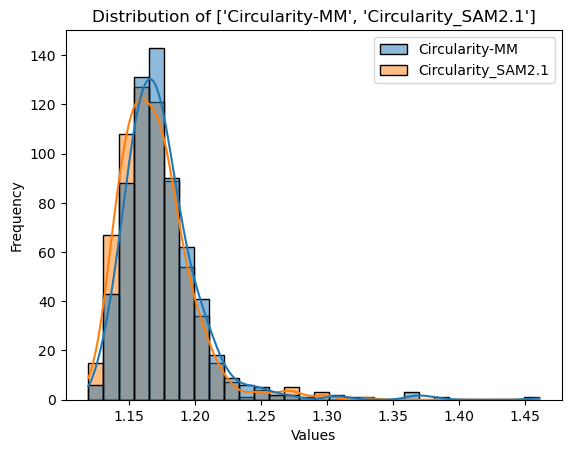


Shapiro-Wilk Test for 'Circularity-MM': ShapiroResult(statistic=0.7755169868469238, pvalue=5.65375994474317e-29)

Shapiro-Wilk Test for 'Circularity_SAM2.1': ShapiroResult(statistic=0.8977805972099304, pvalue=1.863735339986145e-20)

Levene's Test for equality of variances: LeveneResult(statistic=0.12929792568770684, pvalue=0.7192192193653784)
Pearson correlation between 'Circularity-MM' and 'Circularity_SAM2.1': PearsonRResult(statistic=0.631970736850707, pvalue=3.2721880853689293e-74)


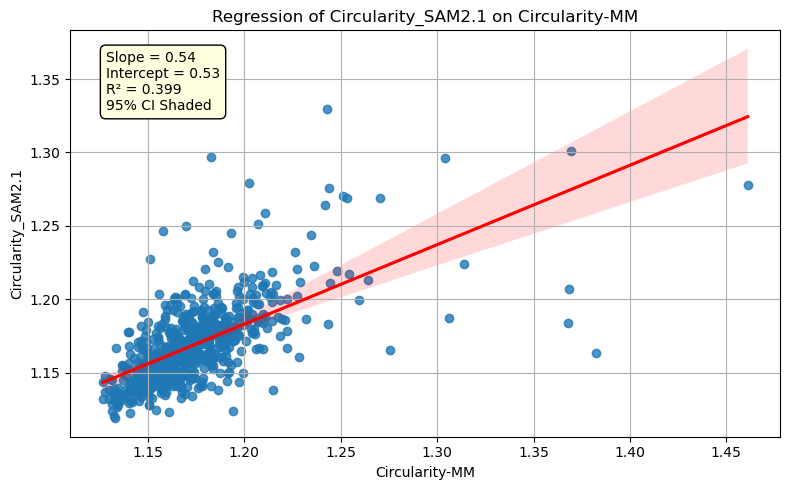


ANOVA result across ['Circularity-MM', 'Circularity_SAM2.1']: F_onewayResult(statistic=10.346716571979558, pvalue=0.0013288583162736484)
Kruskal-Wallis Test across ['Circularity-MM', 'Circularity_SAM2.1']: KruskalResult(statistic=11.673830248599188, pvalue=0.0006338538067668184)


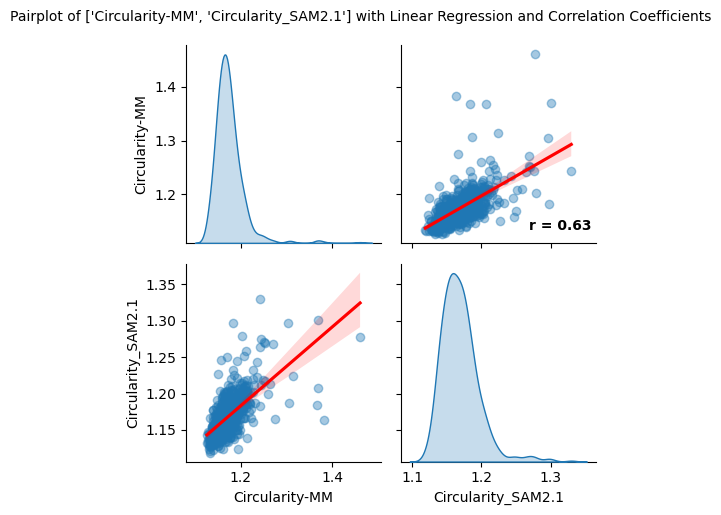

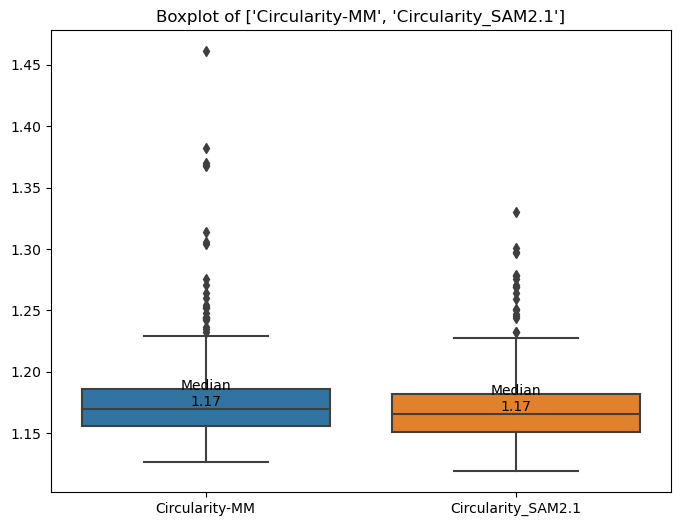

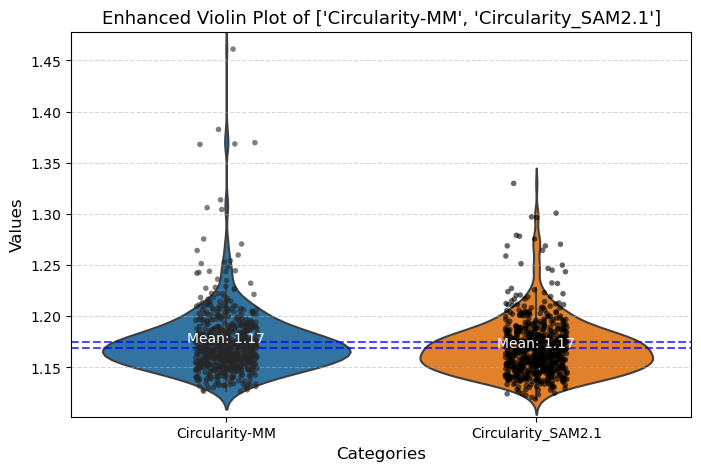

In [102]:
analyze_columns(df_100, ["Circularity-MM","Circularity_SAM2.1"])

The comparison between MM and SAM2.1 showed similar mean values with moderate correlation (r = 0.63), indicating general agreement between the methods. Although variance was consistent (p = 0.72), both distributions were non-normal and significantly different (p < 0.01) based on ANOVA and Kruskal-Wallis tests. 
The linear regression analysis indicated a moderate positive linear relationship between the two measures. The coefficient of determination (R²)  suggested that approximately 39.9% of the variance in Circularity_SAM2.1 can be explained by Circularity-MM. This level of explanatory power implies a fair but not strong predictive alignment between the methods.
The enhanced violin plot illustrated a similar central tendency, with both distributions having a mean of approximately 1.17. While the shape of the distributions differs slightly—Circularity-MM showing more spread and a longer upper tail—the overall distributional overlap is substantial. This visual evidence supports the statistical findings of a moderate correlation and small differences, reinforcing the conclusion that SAM2.1 approximates MM measurements closely, though with some variance in distribution tails.
SAM2.1 tended to slightly underestimate circularity compared to MM, but the estimates followed a similar overall trend.

#### Effect size

In [103]:
# Cohen-s d test for Area in pixels
effect_size(df_100, ["Circularity-MM", "Circularity_SAM2.1"])


The Cohen's d for Circularity-MM and Circularity_SAM2.1: 0.178 
Effect Size Interpretation for Circularity-MM and Circularity_SAM2.1: Small (negligible)


The results correspond to a small effect size, indicating a negligible difference between the two methods in terms of circularity. Specifically, the effect size suggests that while there is some variation between both methods, it is minimal and unlikely to have significant practical implications.

#### Error analysis

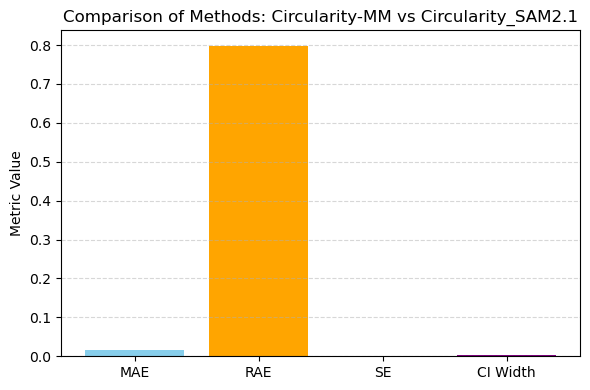

Reference Method     Compared Method       MAE       RAE        SE  \
0   Circularity-MM  Circularity_SAM2.1  0.016521  0.797913  0.001071   

   CI Lower  CI Upper  CI Width  
0  1.167099  1.171305  0.004206

In [104]:
compare_two_methods_with_plot(df_100, ['Circularity-MM', 'Circularity_SAM2.1'])

The comparison indicates a relatively low average discrepancy between both the values. The Relative Absolute Error reflects the proportion of the error relative to the true values. The Standard Error (SE) is 0.001071, suggesting minimal variability in the estimates.The small confidence interval width suggests a high level of precision in the comparison, with the methods exhibiting very close performance.

#### Descriptive statistics

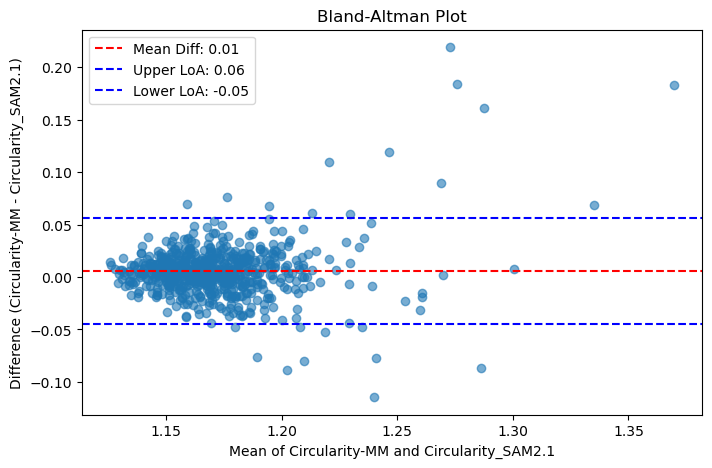

In [105]:
bland_altman_plot(df_100["Circularity-MM"], df_100["Circularity_SAM2.1"], label_a="Circularity-MM", label_b="Circularity_SAM2.1")

The values of mean difference (0.01) suggest that the two methods have good agreement, with most differences falling within this narrow range. The relatively small mean difference and the limited spread between the upper and lower LoA indicate that the methods are generally consistent with each other, though some variation still exists. This analysis provides evidence of minimal bias and a reasonable level of agreement between the methods under consideration.

### Area (pixels) for beans

#### Descriptive statistics


Analyzing columns: ['Area(pix)-MM', 'Area_pix_SAM2.1']

Descriptive Statistics:
        Area(pix)-MM  Area_pix_SAM2.1
count    654.000000       654.000000
mean   17280.785933     79590.402141
std     7801.389417     36294.027458
min     4284.000000     20536.000000
25%    11442.750000     52345.250000
50%    15883.000000     72937.000000
75%    21347.250000     99365.500000
max    49571.000000    233409.000000

Skewness:
 Area(pix)-MM       0.872925
Area_pix_SAM2.1    0.863162
dtype: float64

Kurtosis:
 Area(pix)-MM       0.620102
Area_pix_SAM2.1    0.481551
dtype: float64


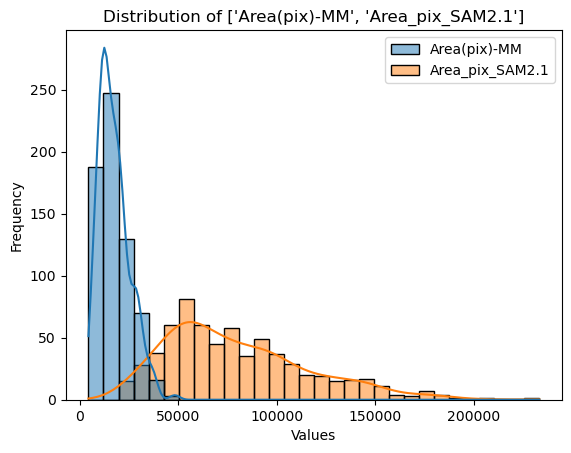


Shapiro-Wilk Test for 'Area(pix)-MM': ShapiroResult(statistic=0.9467411637306213, pvalue=1.3733227235805407e-14)

Shapiro-Wilk Test for 'Area_pix_SAM2.1': ShapiroResult(statistic=0.9456785917282104, pvalue=9.458119813873182e-15)

Levene's Test for equality of variances: LeveneResult(statistic=586.2738029819247, pvalue=2.7412469086089296e-107)
Pearson correlation between 'Area(pix)-MM' and 'Area_pix_SAM2.1': PearsonRResult(statistic=0.9917590750966312, pvalue=0.0)


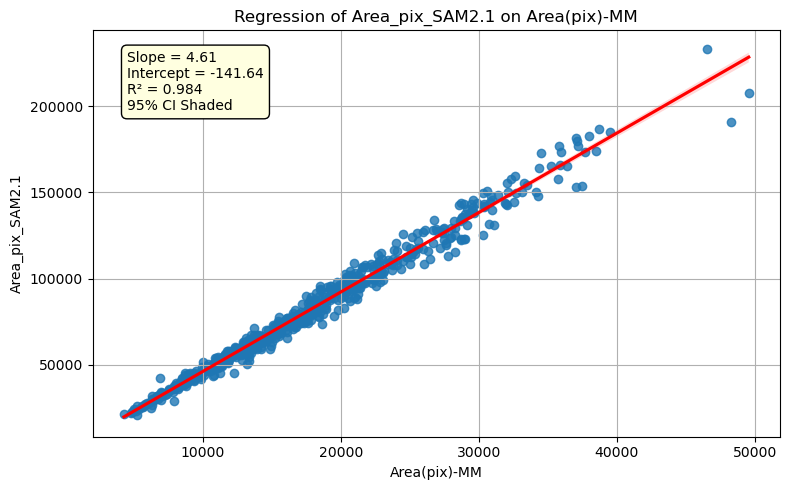


ANOVA result across ['Area(pix)-MM', 'Area_pix_SAM2.1']: F_onewayResult(statistic=1842.4743996278999, pvalue=8.15615642923974e-252)
Kruskal-Wallis Test across ['Area(pix)-MM', 'Area_pix_SAM2.1']: KruskalResult(statistic=948.3870259197175, pvalue=2.9741611608765367e-208)


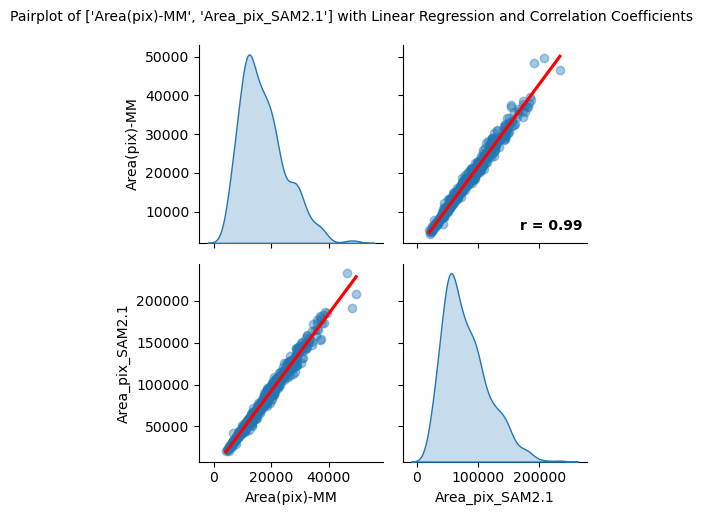

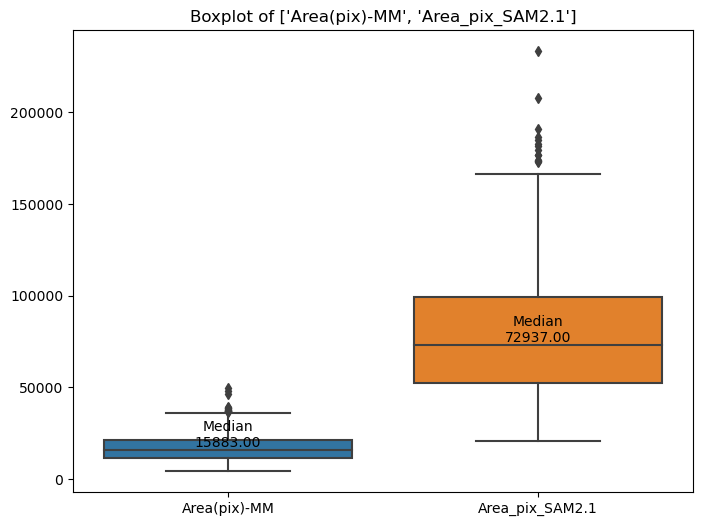

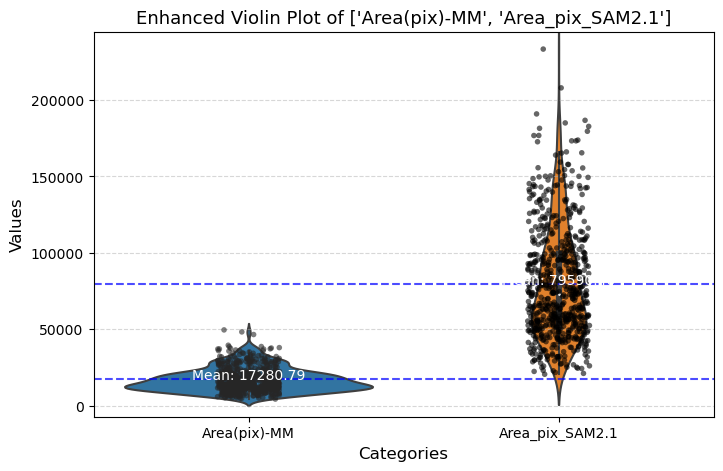

In [106]:
analyze_columns(df_100, ["Area(pix)-MM","Area_pix_SAM2.1"])

The analysis of area (pixels) reveals a strong linear relationship between the two methods, with a Pearson correlation coefficient of 0.99, indicating a near-perfect correlation. The linear regression model shows a slope of 4.61, an intercept of -141.64, and an R-squared value of 0.984, suggesting a high degree of explanatory power. Both datasets exhibit slight positive skewness and mild kurtosis, indicating a right-tailed distribution with a moderately peaked shape. The Shapiro-Wilk test for normality indicates significant deviation from normality for both datasets, with very small p-values. Levene's test reveals significant differences in variances between the two methods. Furthermore, ANOVA and Kruskal-Wallis tests confirm significant differences between 'Area(pix)-MM' and 'Area_pix_SAM2.1', supporting the robustness of the findings.

#### Effect size

In [107]:
# Cohen-s d test for Area in pixels
effect_size(df_100, ["Area(pix)-MM", "Area_pix_SAM2.1"])

The Cohen's d for Area(pix)-MM and Area_pix_SAM2.1: -2.374 
Effect Size Interpretation for Area(pix)-MM and Area_pix_SAM2.1: Large


 A large effect size suggests a substantial difference between the two methods. The negative sign of Cohen's d indicates that, on average, MM values are smaller than those of SAM2.1 values. A large effect size like this typically signifies a meaningful and noteworthy distinction between the two methods of capturing the images, which leads to significant differences in the measured pixels data.

#### Error analysis

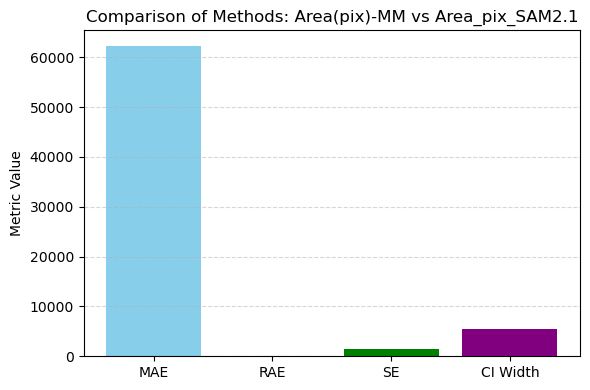

Reference Method  Compared Method           MAE       RAE          SE  \
0     Area(pix)-MM  Area_pix_SAM2.1  62309.616208  9.991663  1419.20878   

       CI Lower     CI Upper     CI Width  
0  76803.638822  82377.16546  5573.526638

In [108]:
compare_two_methods_with_plot(df_100, ["Area(pix)-MM", "Area_pix_SAM2.1"])

The wide confidence interval suggests some level of uncertainty in the comparison, but it still indicates a meaningful difference between the two methods.

#### Levels of agreement

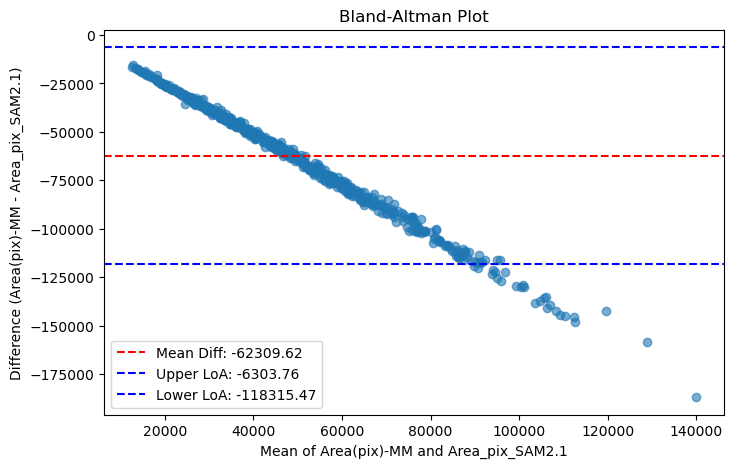

In [109]:
bland_altman_plot(df_100["Area(pix)-MM"], df_100["Area_pix_SAM2.1"], label_a="Area(pix)-MM", label_b="Area_pix_SAM2.1")

Overall the area measured in pixels from Seed analyzer is significantly different as compared to SAM-generated data. The reason might be due to the differences in their algorithms. 

## Average data for each image from all 100 images

In [110]:
df_100images=df_100.groupby(df_100.index).mean()
df_100images

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
ID                                                                      
Vf1-1-2         19.322500      13.890000      19.600875     14.314509   
Vf104-1-2       11.071429       7.694286      11.408118      8.230620   
Vf106-1-2       11.242500       8.527500      11.303283      8.361465   
Vf108-1-1       10.403333       8.561667      10.855747      8.940023   
Vf109-1-1       16.495000      12.015000      16.336555     12.113819   
...                   ...            ...            ...           ...   
Vf67-1-1        14.514286      10.825714      15.008167     10.998745   
Vf68-1-1        12.337500       9.357500      12.756891      9.590631   
Vf71-1-1        20.316000      15.910000      20.246112     16.157181   
Vf8-1-1         10.618889       8.095556      10.984360      8.330176   
Vf89-1-1        14.700000      10.652500      14.705518     10.715207   

           Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
ID                                                                    
Vf1-1-2      219.500247  31003.750000        1.168153      1.368314   
Vf104-1-2     71.513188  10175.142857        1.185993      1.391063   
Vf106-1-2     72.600375  10323.250000        1.182813      1.355561   
Vf108-1-1     72.092068  10255.500000        1.167893      1.221891   
Vf109-1-1    150.081928  21238.500000        1.170977      1.348786   
...                 ...           ...             ...           ...   
Vf67-1-1     127.116859  18012.285714        1.200800      1.366912   
Vf68-1-1      97.839746  13885.250000        1.159991      1.330066   
Vf71-1-1     258.218601  36434.400000        1.156296      1.255246   
Vf8-1-1       70.955747  10091.888889        1.161806      1.317772   
Vf89-1-1     125.575985  17785.750000        1.174098      1.361657   

           Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         224.506175         19.723124        14.492135   
Vf104-1-2        72.284160         11.021296         8.362507   
Vf106-1-2        74.285458         11.019475         8.605892   
Vf108-1-1        71.341942         10.449711         8.730797   
Vf109-1-1       177.364068         17.201748        13.155763   
...                    ...               ...              ...   
Vf67-1-1        122.252499         14.567863        10.794229   
Vf68-1-1         93.318944         12.494538         9.524593   
Vf71-1-1        300.361936         21.520032        17.594018   
Vf8-1-1          74.930359         10.989454         8.662577   
Vf89-1-1        121.149569         14.120150        10.587393   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
ID                                                                  
Vf1-1-2              54.364649    137819.750000       1423.790547   
Vf104-1-2            30.853353     47827.714286        841.313811   
Vf106-1-2            31.221992     49358.500000        851.937427   
Vf108-1-1            30.467557     47461.666667        832.024795   
Vf109-1-1            48.363647     91181.000000       1157.798123   
...                        ...              ...               ...   
Vf67-1-1             40.528000     82548.142857       1113.173891   
Vf68-1-1             34.864535     63047.500000        957.776262   
Vf71-1-1             62.212556    154447.800000       1490.992481   
Vf8-1-1              31.097228     45650.888889        812.363780   
Vf89-1-1             39.113507     81289.750000       1073.445310   

           Roundness_SAM2.1  Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
ID                                                                             
Vf1-1-2            0.852206            1.173540                   497.471554   
Vf104-1-2          0.846841            1.181163                   292.011866   
Vf106-1-2          0.853290            1.172143                   293.557

In [111]:
df_100images.head(2)

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
ID                                                                      
Vf1-1-2         19.322500      13.890000      19.600875     14.314509   
Vf104-1-2       11.071429       7.694286      11.408118      8.230620   

           Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
ID                                                                    
Vf1-1-2      219.500247  31003.750000        1.168153      1.368314   
Vf104-1-2     71.513188  10175.142857        1.185993      1.391063   

           Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         224.506175         19.723124        14.492135   
Vf104-1-2        72.284160         11.021296         8.362507   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  perimeter_SAM2.1  \
ID                                                                  
Vf1-1-2              54.364649    137819.750000       1423.790547   
Vf104-1-2            30.853353     47827.714286        841.313811   

           Roundness_SAM2.1  Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
ID                                                                             
Vf1-1-2            0.852206            1.173540                   497.471554   
Vf104-1-2          0.846841            1.181163                   292.011866   

           AxisMinorLength(pix)_SAM2.1  Aspect_Ratio_SAM2.1  Aspect Ratio-DCM  
ID                                                                             
Vf1-1-2                     352.863993             1.409362          1.391691  
Vf104-1-2                   209.077571             1.398353          1.443215

### Average Length of beans 

#### Descriptive statistics


Analyzing columns: ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']

Descriptive Statistics:
        Length(mm)_DCM  Length(mm)-MM  Length_mm_SAM2.1
count      100.000000     100.000000        100.000000
mean        14.293164      14.347126         13.666884
std          3.267513       3.172022          2.908723
min          8.260000       8.287498          7.993105
25%         11.915417      11.868962         11.368227
50%         14.143833      14.231569         13.517142
75%         16.603750      16.533041         15.552776
max         21.040000      20.639073         21.520032

Skewness:
 Length(mm)_DCM      0.256518
Length(mm)-MM       0.274246
Length_mm_SAM2.1    0.379662
dtype: float64

Kurtosis:
 Length(mm)_DCM     -0.792904
Length(mm)-MM      -0.815330
Length_mm_SAM2.1   -0.370369
dtype: float64


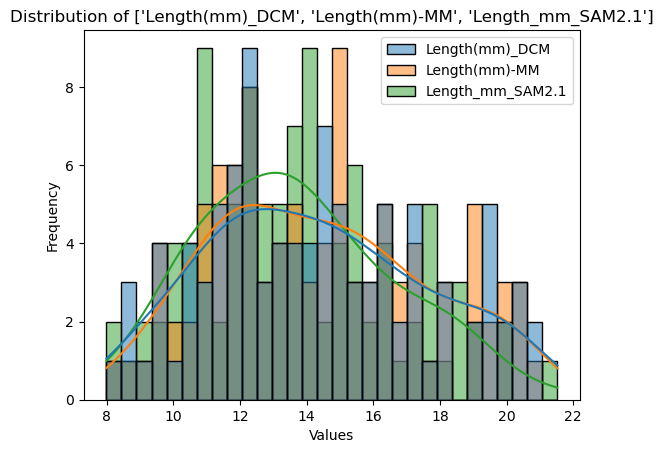


Shapiro-Wilk Test for 'Length(mm)_DCM': ShapiroResult(statistic=0.9711952805519104, pvalue=0.027308734133839607)

Shapiro-Wilk Test for 'Length(mm)-MM': ShapiroResult(statistic=0.968883216381073, pvalue=0.018166450783610344)

Shapiro-Wilk Test for 'Length_mm_SAM2.1': ShapiroResult(statistic=0.980850100517273, pvalue=0.1547490507364273)

Levene's Test for equality of variances: LeveneResult(statistic=1.259694316095445, pvalue=0.28525222819478213)
Pearson correlation between 'Length(mm)_DCM' and 'Length(mm)-MM': PearsonRResult(statistic=0.9976889600622871, pvalue=2.8749780545701084e-116)


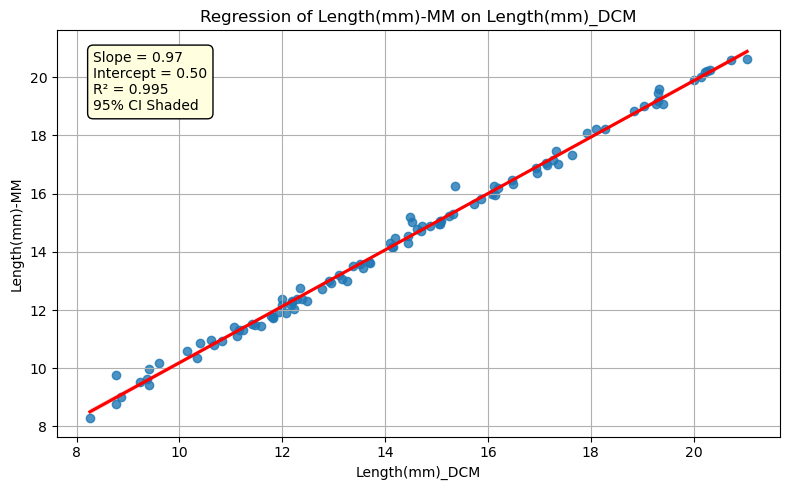

Pearson correlation between 'Length(mm)_DCM' and 'Length_mm_SAM2.1': PearsonRResult(statistic=0.9690203429913699, pvalue=2.5096790013347686e-61)


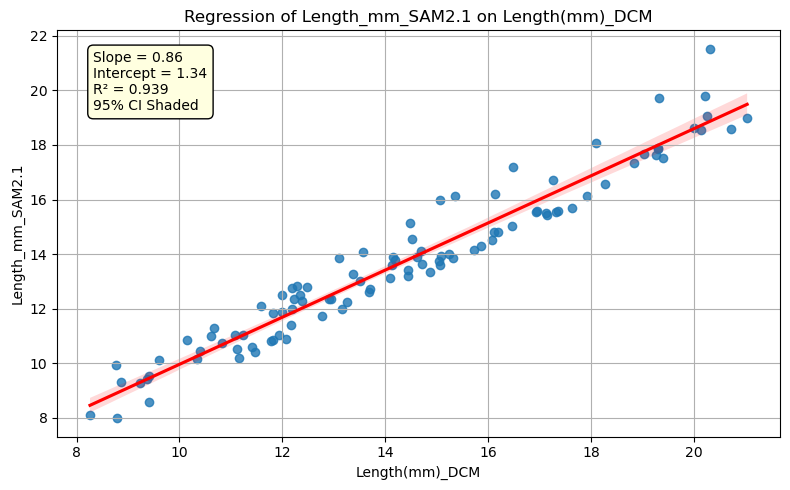

Pearson correlation between 'Length(mm)-MM' and 'Length_mm_SAM2.1': PearsonRResult(statistic=0.9742454559858585, pvalue=3.3328365075630103e-65)


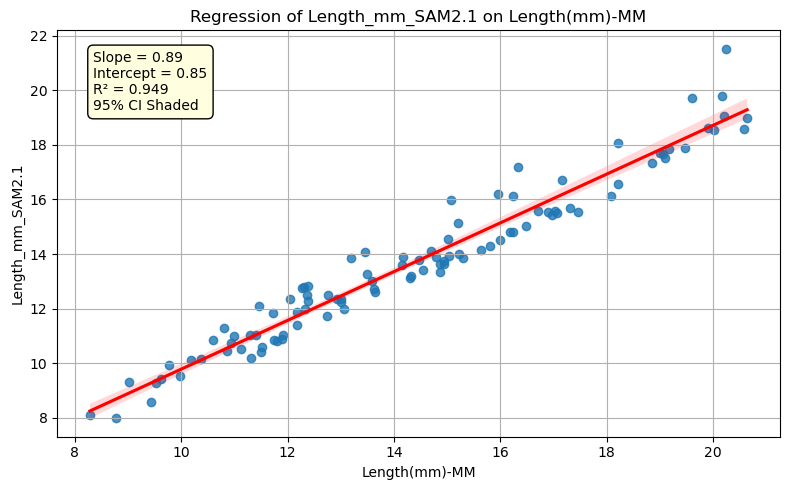


ANOVA result across ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']: F_onewayResult(statistic=1.4690003135609984, pvalue=0.23182279519207105)
Kruskal-Wallis Test across ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']: KruskalResult(statistic=2.4776637873754908, pvalue=0.28972244697596966)


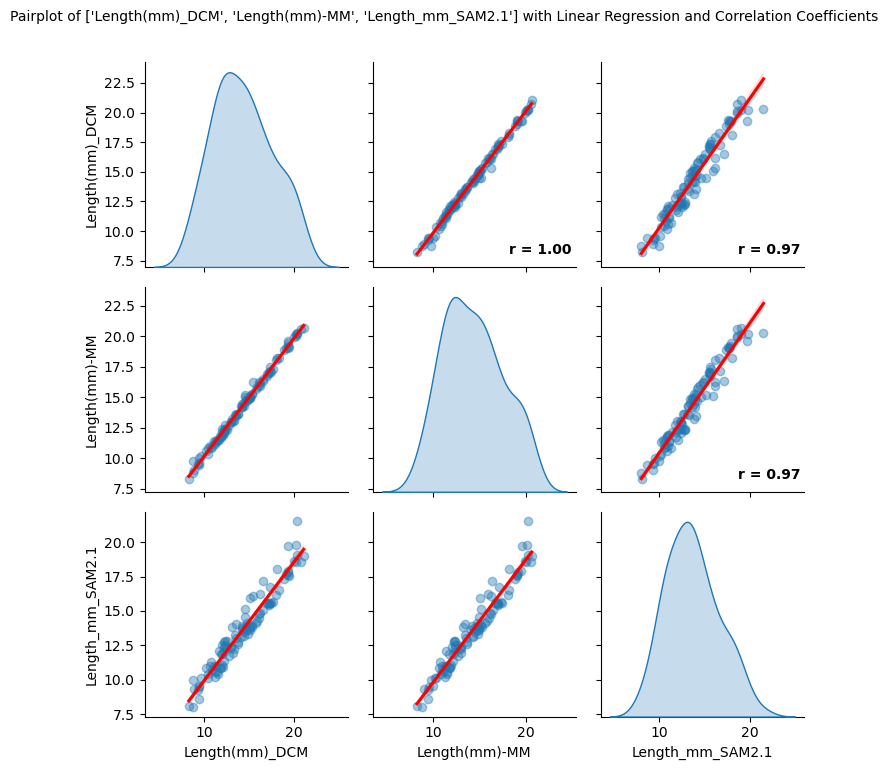

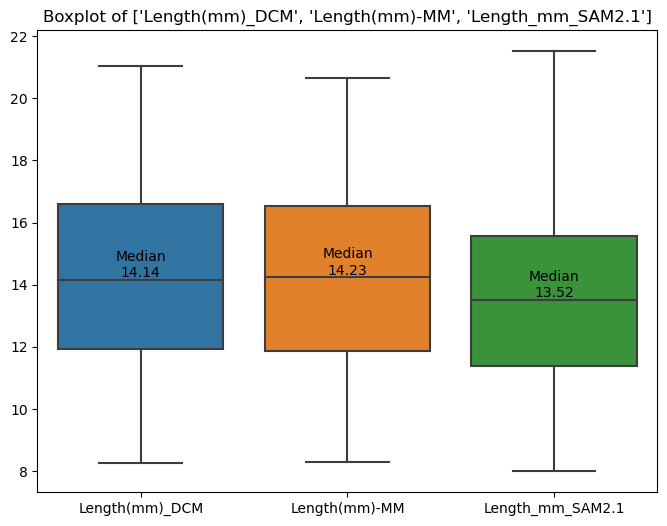

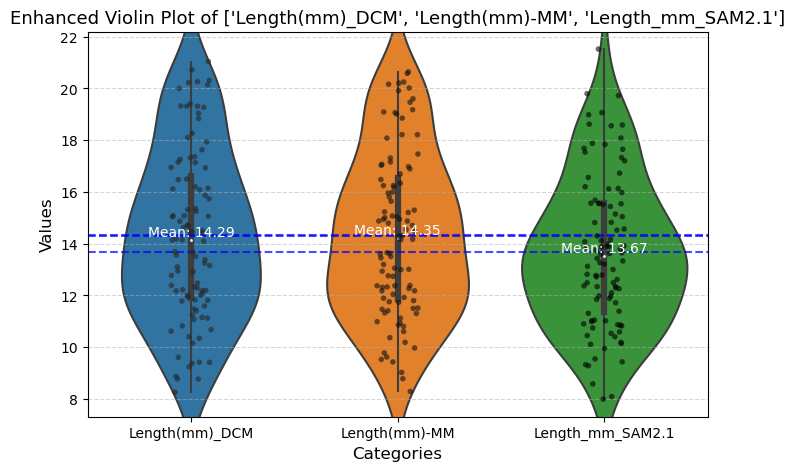

In [112]:
# Perform analysis on both sets of columns
analyze_columns(df_100images, ["Length(mm)_DCM", "Length(mm)-MM", "Length_mm_SAM2.1"])

Descriptive statistics revealed that the SAM2.1 method consistently produced slightly lower length estimates compared to both MM and DCM. While the overall variation in measurements was similar across methods, SAM2.1 exhibited the least spread, indicating more tightly clustered values. The distribution of SAM2.1 values displayed a moderate positive skewness and relatively lower kurtosis compared to the gold and silver standards, suggesting a tendency toward shorter lengths with fewer extreme values. Normality testing showed that the SAM2.1 data did not significantly deviate from a normal distribution, unlike MM and DCM, which both showed mild deviations.

Strong correlations were observed between SAM2.1 and both standards, with the highest correlation seen between SAM2.1 and the silver standard (MM), followed closely by the gold standard (DCM). However, linear regression analyses revealed that SAM2.1 tends to slightly underestimate lengths in comparison to both standards, as indicated by slopes less than one and positive intercepts. Despite this systematic bias, the SAM2.1 method retained a strong linear relationship with both MM and DCM, reflected in high R² values. Levene’s test showed no significant differences in variance among the three methods, indicating consistent measurement dispersion. Additionally, inferential statistical tests, including one-way ANOVA and the Kruskal-Wallis test, did not identify significant differences in central tendency across the methods. These findings suggest that while SAM2.1 slightly underestimates length measurements compared to MM and DCM, it remains statistically consistent and well-correlated with both standards, supporting its potential viability as an alternative length estimation method.

#### Effect size

In [113]:
#Effect size for avg length
effect_size(df_100images, ["Length(mm)_DCM", "Length(mm)-MM"]) # ground truth data
effect_size(df_100images, ["Length(mm)_DCM", "Length_mm_SAM2.1"]) # gold standard
effect_size(df_100images, ["Length(mm)-MM", "Length_mm_SAM2.1"]) # silver standard

The Cohen's d for Length(mm)_DCM and Length(mm)-MM: -0.017 
Effect Size Interpretation for Length(mm)_DCM and Length(mm)-MM: Small (negligible)
The Cohen's d for Length(mm)_DCM and Length_mm_SAM2.1: 0.202 
Effect Size Interpretation for Length(mm)_DCM and Length_mm_SAM2.1: Small to Medium
The Cohen's d for Length(mm)-MM and Length_mm_SAM2.1: 0.224 
Effect Size Interpretation for Length(mm)-MM and Length_mm_SAM2.1: Small to Medium


Both values fall within the "small to medium" effect size range, indicating that although the differences between SAM2.1 and the standard methods are statistically noticeable, they are relatively minor in practical terms. This further supports the observation that SAM2.1 provides reasonably comparable measurements to the established standards, with only modest deviations.

#### Error analysis 

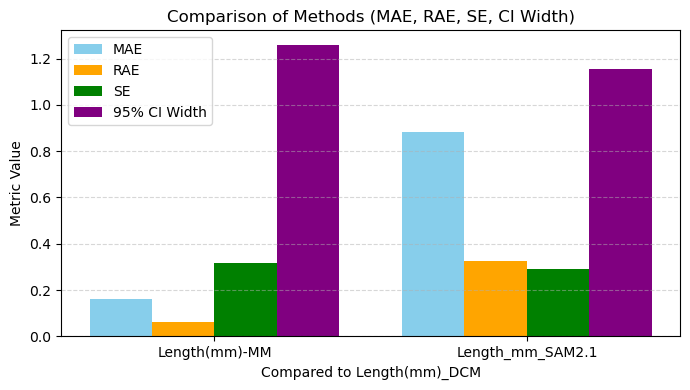

Reference Method   Compared Method       MAE       RAE        SE   CI Lower  \
0   Length(mm)_DCM     Length(mm)-MM  0.163049  0.060297  0.317202  13.717728   
1   Length(mm)_DCM  Length_mm_SAM2.1  0.884759  0.327191  0.290872  13.089730   

    CI Upper  CI Width  
0  14.976524  1.258796  
1  14.244038  1.154308

In [114]:
compare_three_methods_with_plot(df_100images, [ 'Length(mm)_DCM', 'Length(mm)-MM','Length_mm_SAM2.1'])

The mean absolute error (MAE) and relative absolute error (RAE) indicated a slightly better agreement between SAM2.1 and the silver standard compared to the gold standard, reflecting marginally lower deviations. Standard error (SE) values were comparable in both comparisons, suggesting consistent precision in the SAM2.1 measurements. Confidence intervals for the mean difference between SAM2.1 and each reference method were narrow, further supporting the reliability of the estimates. The similarity in confidence interval widths across comparisons implies that the variability in the differences was stable, reinforcing the robustness of SAM2.1 as a potential alternative for length estimation.

#### Agreement levels

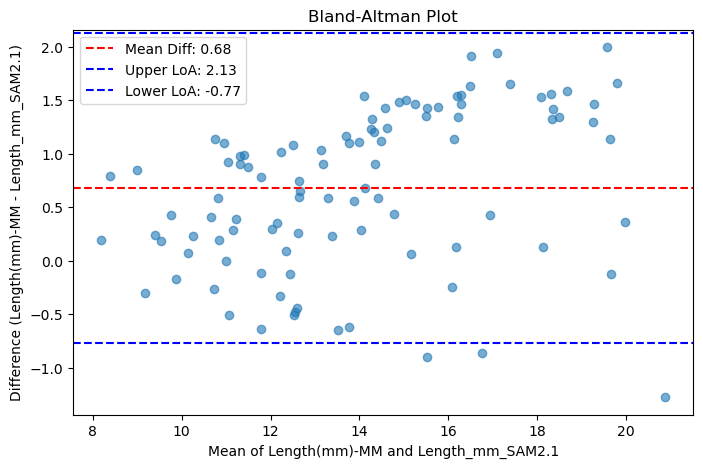

In [115]:
bland_altman_plot(df_100images["Length(mm)-MM"], df_100images["Length_mm_SAM2.1"], label_a="Length(mm)-MM", label_b="Length_mm_SAM2.1")

The Bland-Altman analysis was conducted to assess the agreement between the Length_mm_SAM2.1 method and the reference standards. The plot revealed a small mean difference, indicating that, on average, the SAM2.1 measurements slightly underestimate the lengths compared to the reference methods. The limits of agreement were relatively narrow and symmetrically distributed around the mean difference, suggesting that most of the differences between the two methods fall within an acceptable range. The overall pattern in the plot did not show any systematic bias or trend across the range of measurements, supporting the consistency of the SAM2.1 method. These findings imply that the discrepancies between SAM2.1 and the reference methods are minor and clinically acceptable, affirming its potential as a reliable alternative.

### Average seed data for Width (mm)

#### Descriptive statistics


Analyzing columns: ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']

Descriptive Statistics:
        Width(mm)_DCM  Width(mm)-MM  Width_mm_SAM2.1
count     100.000000    100.000000       100.000000
mean       10.638242     10.738722        11.332852
std         2.291133      2.296849         2.585695
min         6.045000      6.160683         6.337874
25%         9.123167      9.228420         9.577837
50%        10.127714     10.237519        10.780111
75%        12.180875     12.282686        13.117021
max        16.455000     16.157181        17.781404

Skewness:
 Width(mm)_DCM      0.417578
Width(mm)-MM       0.448227
Width_mm_SAM2.1    0.469416
dtype: float64

Kurtosis:
 Width(mm)_DCM     -0.425001
Width(mm)-MM      -0.443840
Width_mm_SAM2.1   -0.378595
dtype: float64


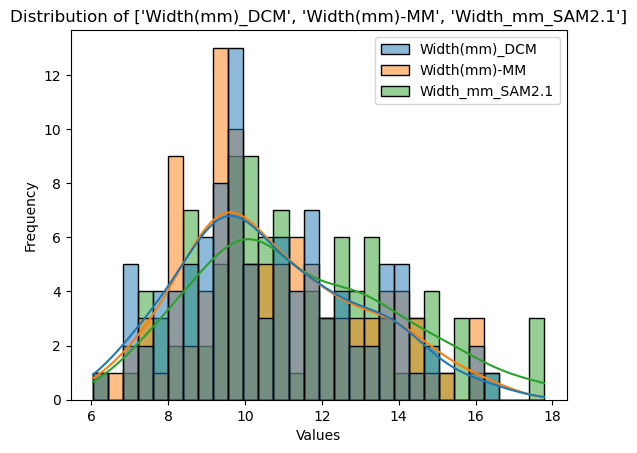


Shapiro-Wilk Test for 'Width(mm)_DCM': ShapiroResult(statistic=0.9742909669876099, pvalue=0.04749089851975441)

Shapiro-Wilk Test for 'Width(mm)-MM': ShapiroResult(statistic=0.9696681499481201, pvalue=0.020849907770752907)

Shapiro-Wilk Test for 'Width_mm_SAM2.1': ShapiroResult(statistic=0.9711073637008667, pvalue=0.026886088773608208)

Levene's Test for equality of variances: LeveneResult(statistic=0.7909128284225881, pvalue=0.45438334208224507)
Pearson correlation between 'Width(mm)_DCM' and 'Width(mm)-MM': PearsonRResult(statistic=0.9959148281323087, pvalue=3.657849022719814e-104)


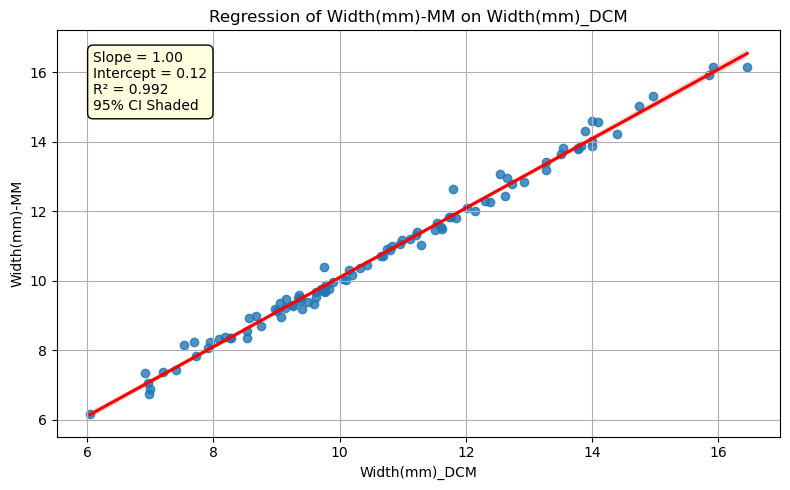

Pearson correlation between 'Width(mm)_DCM' and 'Width_mm_SAM2.1': PearsonRResult(statistic=0.9795727692327659, pvalue=4.428605159188002e-70)


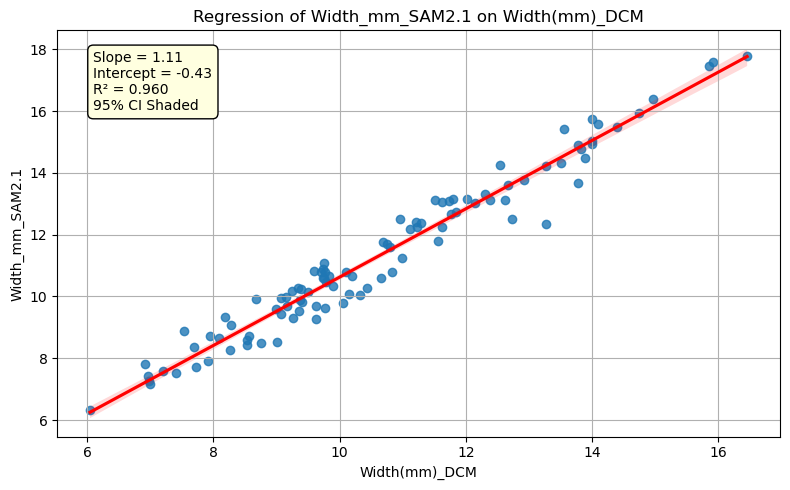

Pearson correlation between 'Width(mm)-MM' and 'Width_mm_SAM2.1': PearsonRResult(statistic=0.9816973334285022, pvalue=2.1434393390032126e-72)


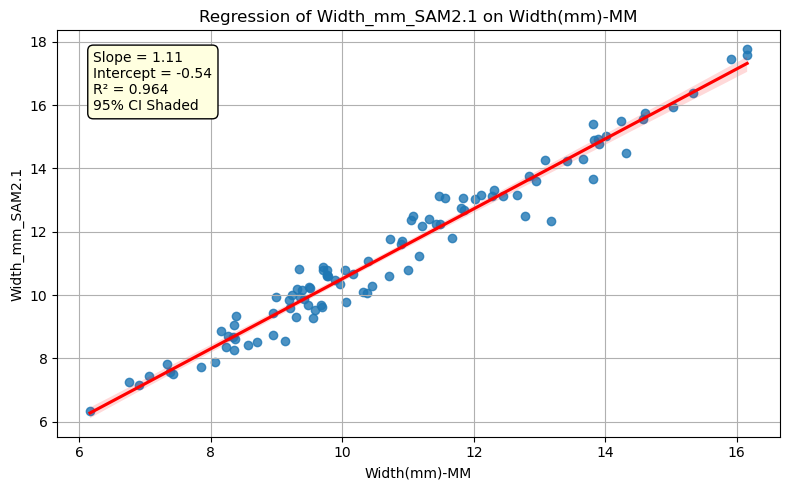


ANOVA result across ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']: F_onewayResult(statistic=2.4565359254673487, pvalue=0.08747179815947453)
Kruskal-Wallis Test across ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']: KruskalResult(statistic=4.041682392026701, pvalue=0.13254392275280508)


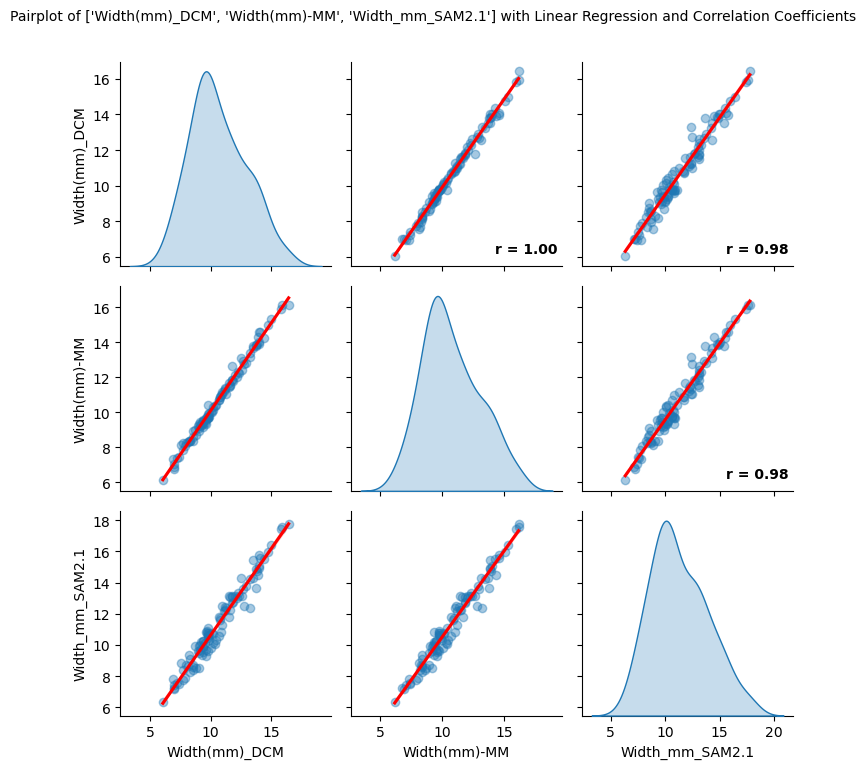

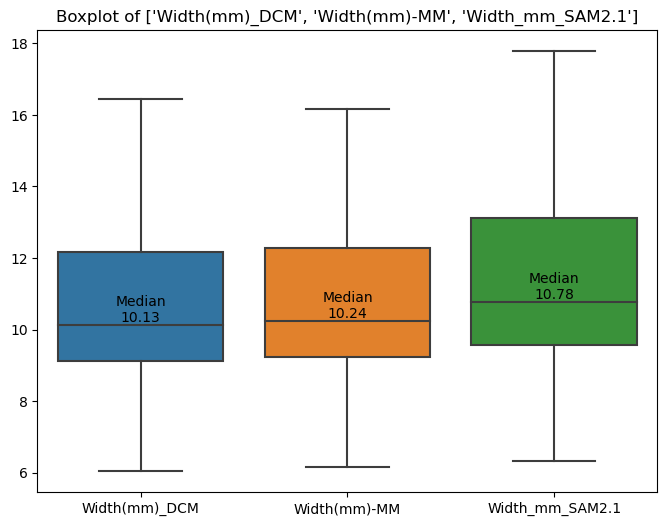

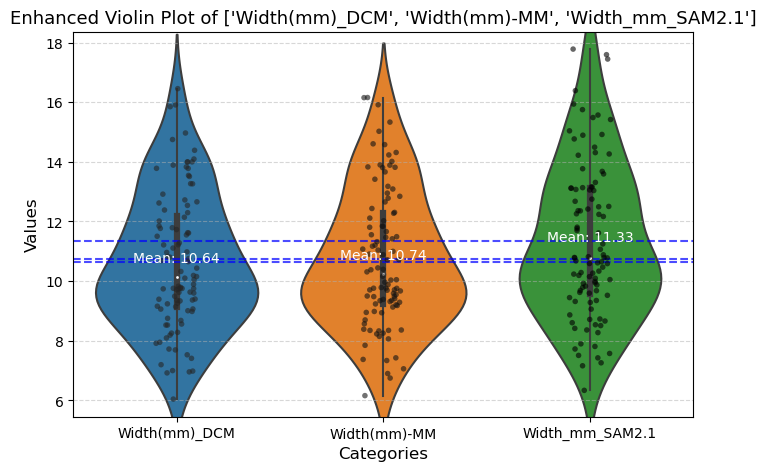

In [116]:
# Perform analysis on both sets of columns
analyze_columns(df_100images, ["Width(mm)_DCM", "Width(mm)-MM", "Width_mm_SAM2.1"])

Descriptive statistics showed that the SAM2.1 method generally reported higher width values compared to both DCM and MM. The variability of measurements was slightly greater for SAM2.1, while DCM and MM showed comparable dispersion. All three methods exhibited mild positive skewness and slightly platykurtic distributions, indicating a modest asymmetry and flatter-than-normal shape. The Shapiro-Wilk test indicated that none of the distributions followed perfect normality, though the deviations were not extreme.

Levene’s test confirmed that the variances among the three methods were not significantly different, suggesting homogeneity in measurement spread. Strong positive correlations were observed among all methods, particularly between DCM and MM, highlighting their close alignment. SAM2.1 also demonstrated high correlations with both standards, though slightly lower. Linear regression revealed that SAM2.1 tends to slightly overestimate width values in comparison to both DCM and MM, as indicated by slopes above one and negative intercepts. Despite this, the regression models still showed a strong fit, suggesting consistent relationships. Inferential tests, including one-way ANOVA and the Kruskal-Wallis test, did not reveal any statistically significant differences in width estimates across the methods. These results indicate that, although SAM2.1 tends to yield marginally higher width values, it remains strongly aligned with both reference standards and offers reliable measurement consistency.

#### Effect size

In [117]:
#Effect size for length
effect_size(df_100images, ["Width(mm)_DCM", "Width(mm)_DCM"])

effect_size(df_100images, ["Width(mm)_DCM", "Width_mm_SAM2.1"])

effect_size(df_100images, ["Width(mm)-MM", "Width_mm_SAM2.1"])

The Cohen's d for Width(mm)_DCM and Width(mm)_DCM: 0.000 
Effect Size Interpretation for Width(mm)_DCM and Width(mm)_DCM: Small (negligible)
The Cohen's d for Width(mm)_DCM and Width_mm_SAM2.1: -0.284 
Effect Size Interpretation for Width(mm)_DCM and Width_mm_SAM2.1: Small to Medium
The Cohen's d for Width(mm)-MM and Width_mm_SAM2.1: -0.243 
Effect Size Interpretation for Width(mm)-MM and Width_mm_SAM2.1: Small to Medium


The comparison between SAM2.1 and the gold standard (Width(mm)_DCM) yielded a small to medium effect size, indicating a modest difference in width measurements. A similar effect size was observed when comparing SAM2.1 with the silver standard (Width(mm)-MM), also falling within the small to medium range. These results suggest that, although there is a consistent tendency for SAM2.1 to produce slightly higher width values, the differences are not substantial and remain within an acceptable range for practical comparison.

#### Error analysis

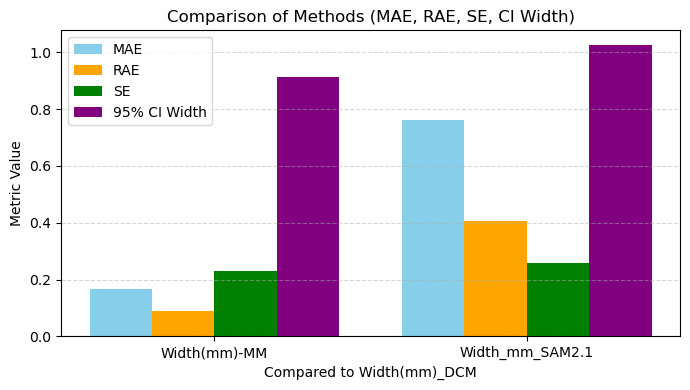

Reference Method  Compared Method       MAE       RAE        SE   CI Lower  \
0    Width(mm)_DCM     Width(mm)-MM  0.166337  0.088342  0.229685  10.282978   
1    Width(mm)_DCM  Width_mm_SAM2.1  0.762661  0.405049  0.258569  10.819794   

    CI Upper  CI Width  
0  11.194467  0.911489  
1  11.845910  1.026116

In [118]:
# Error difference
compare_three_methods_with_plot(df_100images, [ 'Width(mm)_DCM', 'Width(mm)-MM','Width_mm_SAM2.1'])

The mean absolute error (MAE) and relative absolute error (RAE) indicated that SAM2.1 had slightly better agreement with the silver standard than with the gold standard, reflecting marginally lower measurement deviations. The standard error remained consistent across both comparisons, suggesting stable precision in the SAM2.1 estimates. Confidence intervals for the estimated mean differences were narrow and largely overlapping between comparisons, indicating a high level of consistency in measurement agreement. The small width of the confidence intervals further supports the reliability of SAM2.1 as a comparable alternative for width estimation relative to both reference methods.

#### Agreement levels

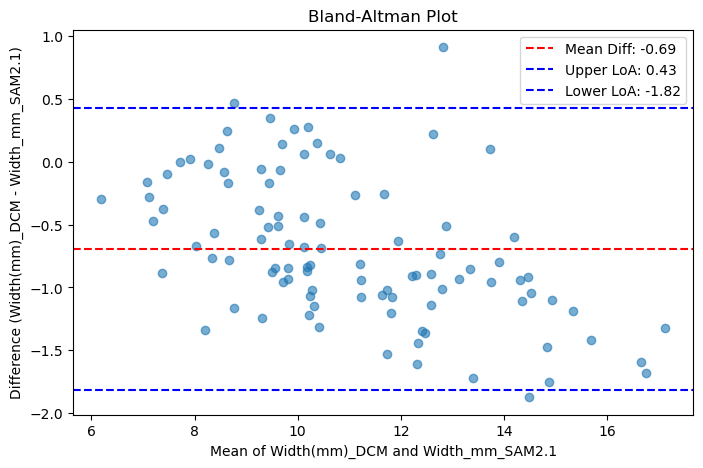

In [119]:
bland_altman_plot(df_100images["Width(mm)_DCM"], df_100images["Width_mm_SAM2.1"], label_a="Width(mm)_DCM", label_b="Width_mm_SAM2.1")

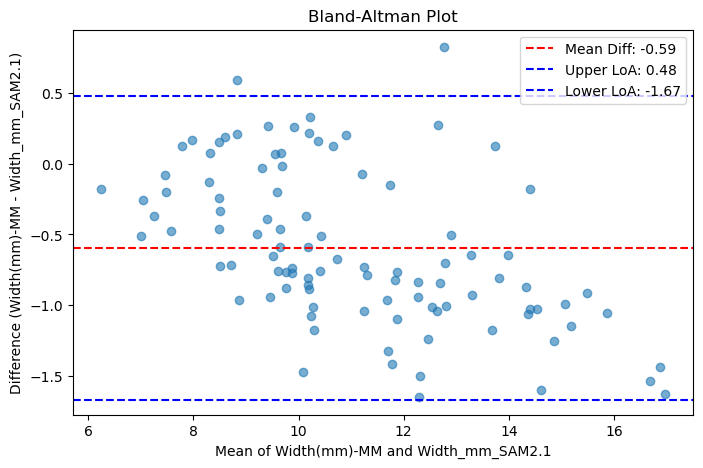

In [120]:
bland_altman_plot(df_100images["Width(mm)-MM"], df_100images["Width_mm_SAM2.1"], label_a="Width(mm)-MM", label_b="Width_mm_SAM2.1")

The comparison between the width measured by DCM and DAM yielded a mean difference of -0.69, with the upper and lower limits of agreement (LOA) at 0.43 and -1.82, respectively. This indicates a slight bias, suggesting that the two methods exhibit a moderate degree of disagreement, with the measurements not perfectly aligned. A similar analysis was carried out for the comparison between DCM and SAM, which showed a mean difference of -0.69, with the upper LOA at 0.43 and the lower LOA at -1.82. The agreement between these two methods was comparable to the DCM-DAM analysis, showing a consistent trend of mild disagreement. Finally, the Bland-Altman plot comparing the width measured by MM and SAM displayed a mean difference of -0.59, with the upper LOA at 0.48 and the lower LOA at -1.67. This analysis also revealed a moderate level of disagreement, albeit slightly better alignment compared to the DCM-SAM and DCM-DAM comparisons. Overall, these results suggest that while the methods exhibit some degree of agreement, there is notable variation between them, highlighting the potential need for further calibration or method refinement.

### Average seed data for Area (mm2)

#### Descriptive statistics


Analyzing columns: ['Area(mm²)-MM', 'Area_mm2_SAM2.1']

Descriptive Statistics:
        Area(mm²)-MM  Area_mm2_SAM2.1
count    100.000000       100.000000
mean     124.983214       128.468353
std       53.915856        55.644971
min       39.657486        40.506651
25%       84.958850        85.640337
50%      111.052158       114.242006
75%      153.614350       155.709680
max      262.298994       300.361936

Skewness:
 Area(mm²)-MM       0.698695
Area_mm2_SAM2.1    0.821546
dtype: float64

Kurtosis:
 Area(mm²)-MM      -0.318007
Area_mm2_SAM2.1    0.198976
dtype: float64


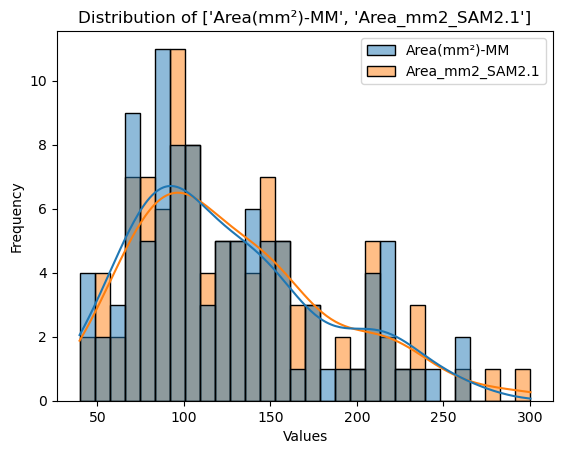


Shapiro-Wilk Test for 'Area(mm²)-MM': ShapiroResult(statistic=0.9412491917610168, pvalue=0.00022995163453742862)

Shapiro-Wilk Test for 'Area_mm2_SAM2.1': ShapiroResult(statistic=0.9429131746292114, pvalue=0.0002915588556788862)

Levene's Test for equality of variances: LeveneResult(statistic=0.021522324854717587, pvalue=0.8835142219597999)
Pearson correlation between 'Area(mm²)-MM' and 'Area_mm2_SAM2.1': PearsonRResult(statistic=0.9907414009803199, pvalue=8.348787490644e-87)


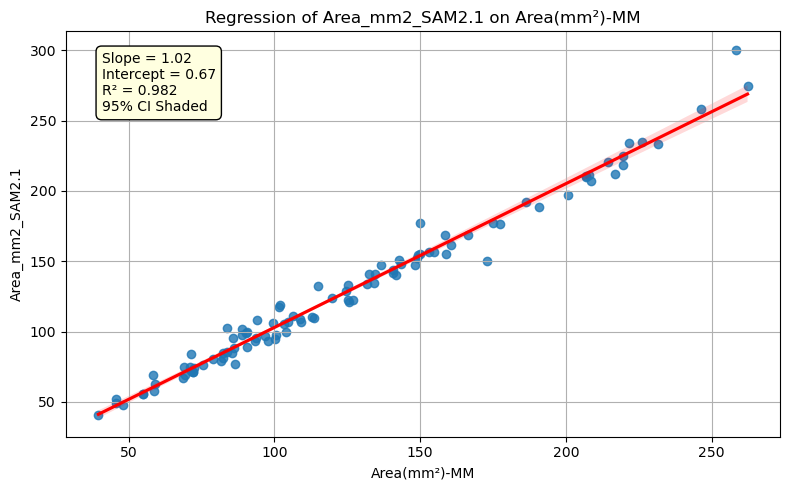


ANOVA result across ['Area(mm²)-MM', 'Area_mm2_SAM2.1']: F_onewayResult(statistic=0.20232578888589414, pvalue=0.6533420911200629)
Kruskal-Wallis Test across ['Area(mm²)-MM', 'Area_mm2_SAM2.1']: KruskalResult(statistic=0.19775522388056288, pvalue=0.6565388984655837)


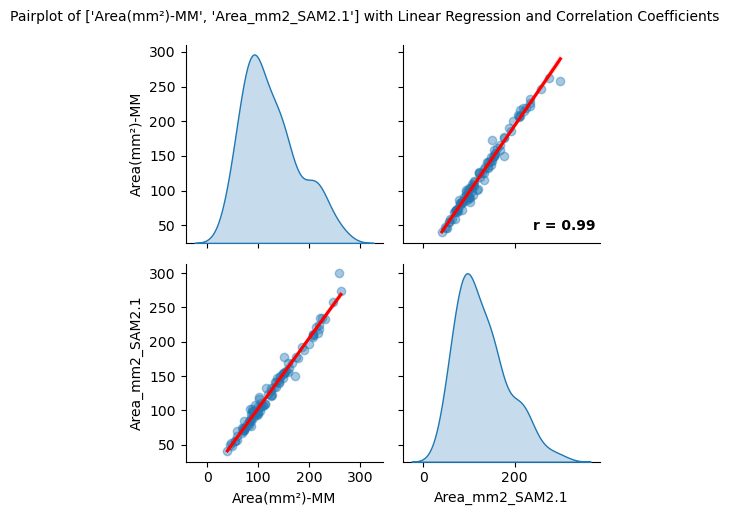

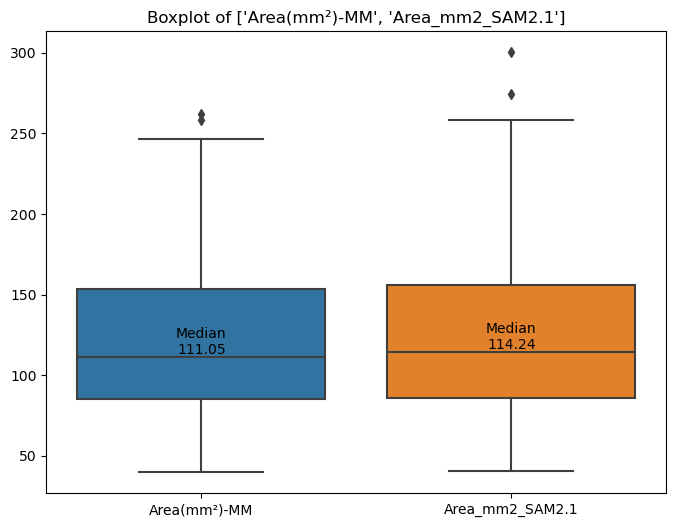

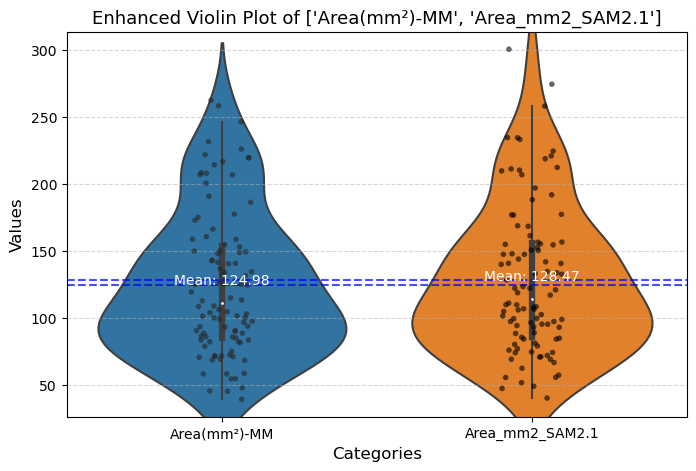

In [121]:
analyze_columns(df_100images, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])

Statistical tests indicate that both datasets deviate from normality, though the variances between them are similar. A very strong positive correlation (r = 0.99) was found between the two variables, supported by regression results showing a near-proportional relationship (slope ≈ 1) and a high R-squared value (0.982).
The ANOVA and Kruskal-Wallis tests show no significant difference between the distributions of the two variables, reinforcing their similarity. The pairplot also highlights a near-perfect linear relationship. Overall, the analysis suggests a high degree of correspondence between the two datasets.

#### Effect size

In [122]:
# Cohen-s d test for Area in mm2
effect_size(df_100images, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])

The Cohen's d for Area(mm²)-MM and Area_mm2_SAM2.1: -0.064 
Effect Size Interpretation for Area(mm²)-MM and Area_mm2_SAM2.1: Small (negligible)


The calculated Cohen's d value indicates a small (negligible) effect size between the two areas. This suggests that while there may be some difference between the two area measurements, the magnitude of this difference is minimal and not likely to have a significant impact on the analysis. Given the small effect size, it is reasonable to conclude that the two methods (MM and SAM2.1) provide similar results in terms of area measurements, with little to no practical difference between them. This suggests that both methods can be considered relatively consistent for the task at hand.

#### Error analysis

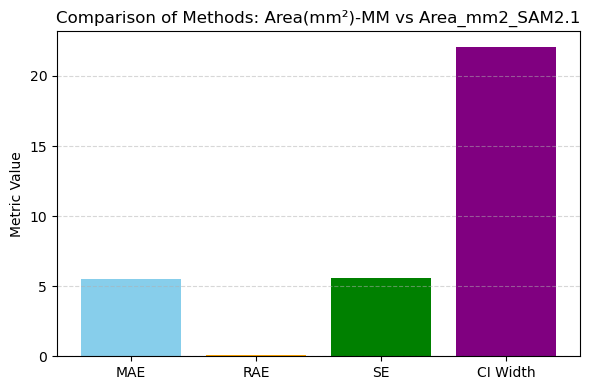

Reference Method  Compared Method       MAE       RAE        SE    CI Lower  \
0     Area(mm²)-MM  Area_mm2_SAM2.1  5.503156  0.124675  5.564497  117.427183   

     CI Upper   CI Width  
0  139.509522  22.082339

In [123]:
compare_two_methods_with_plot(df_100images, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])

The Mean Absolute Error (MAE) indicates a moderate deviation from the reference method, suggesting that the compared method has a noticeable but not excessive error. The Relative Absolute Error (RAE) implies that the error is relatively small in relation to the overall measurements, showing a reasonable level of accuracy. The Standard Error (SE) highlights some variability in the method's performance, though it remains within an acceptable range, indicating consistent results with some fluctuation. The Confidence Intervals (CI) demonstrate that the error estimates are subject to a certain level of uncertainty, with a difference between the lower and upper bounds reflecting the range of possible error values

#### Agreement levels

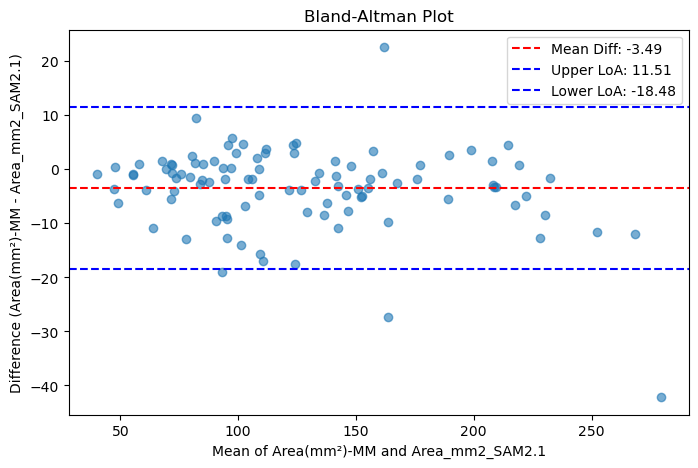

In [124]:
bland_altman_plot(df_100images["Area(mm²)-MM"], df_100images["Area_mm2_SAM2.1"], label_a="Area(mm²)-MM", label_b="Area_mm2_SAM2.1")

These values suggest that, while the two methods generally agree, there is a range of differences that should be considered when interpreting the results. The spread between the upper and lower limits reflects the potential variability or disagreement between the methods, with some values deviating significantly from the mean difference. This analysis provides insight into the degree of agreement and the potential limitations in using these methods interchangeably.

### Aspect Ratio

#### Descriptive statistics


Analyzing columns: ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']

Descriptive Statistics:
        Aspect Ratio-DCM  L/W Ratio-MM  Aspect_Ratio_SAM2.1
count        100.000000    100.000000           100.000000
mean           1.342532      1.337121             1.366225
std            0.087872      0.083076             0.086659
min            1.162113      1.170620             1.207872
25%            1.278640      1.279626             1.300363
50%            1.336877      1.328633             1.357588
75%            1.396007      1.380226             1.419037
max            1.629499      1.611820             1.652598

Skewness:
 Aspect Ratio-DCM       0.595600
L/W Ratio-MM           0.760650
Aspect_Ratio_SAM2.1    0.637325
dtype: float64

Kurtosis:
 Aspect Ratio-DCM       0.542105
L/W Ratio-MM           1.137284
Aspect_Ratio_SAM2.1    0.809353
dtype: float64


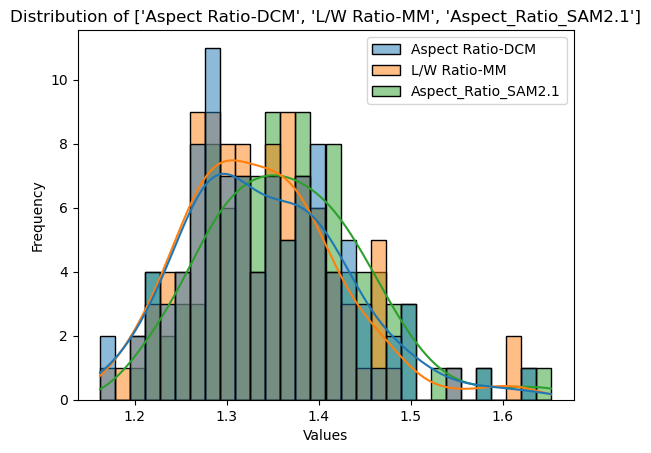


Shapiro-Wilk Test for 'Aspect Ratio-DCM': ShapiroResult(statistic=0.9753605127334595, pvalue=0.05758006498217583)

Shapiro-Wilk Test for 'L/W Ratio-MM': ShapiroResult(statistic=0.9650269746780396, pvalue=0.009327540174126625)

Shapiro-Wilk Test for 'Aspect_Ratio_SAM2.1': ShapiroResult(statistic=0.9720261096954346, pvalue=0.031657181680202484)

Levene's Test for equality of variances: LeveneResult(statistic=0.2675407909363266, pvalue=0.7654433455222451)
Pearson correlation between 'Aspect Ratio-DCM' and 'L/W Ratio-MM': PearsonRResult(statistic=0.9644670012837288, pvalue=1.8644888142119635e-58)


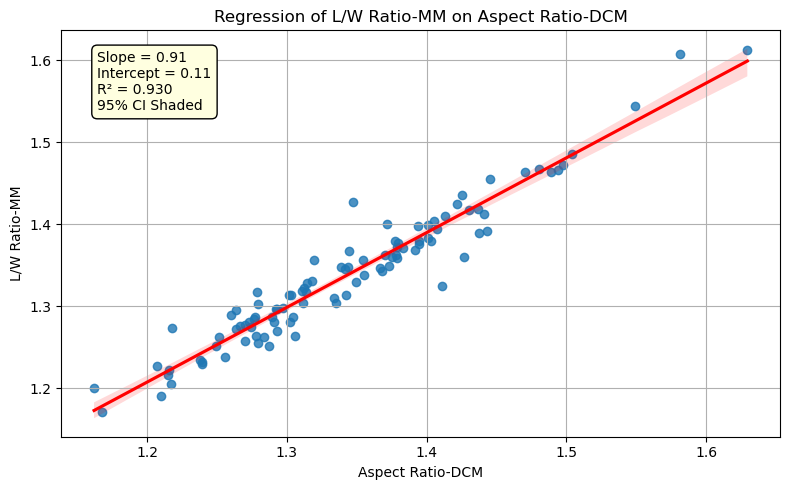

Pearson correlation between 'Aspect Ratio-DCM' and 'Aspect_Ratio_SAM2.1': PearsonRResult(statistic=0.9526573375445067, pvalue=1.7943131049736603e-52)


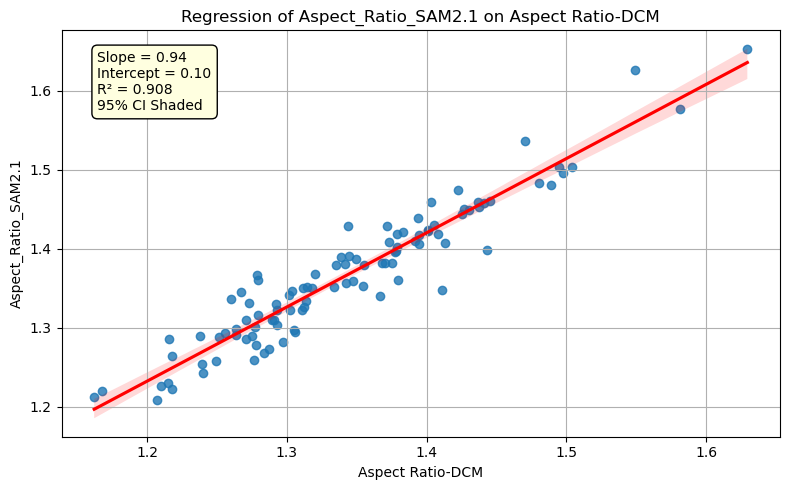

Pearson correlation between 'L/W Ratio-MM' and 'Aspect_Ratio_SAM2.1': PearsonRResult(statistic=0.9541446682883844, pvalue=3.891880517637251e-53)


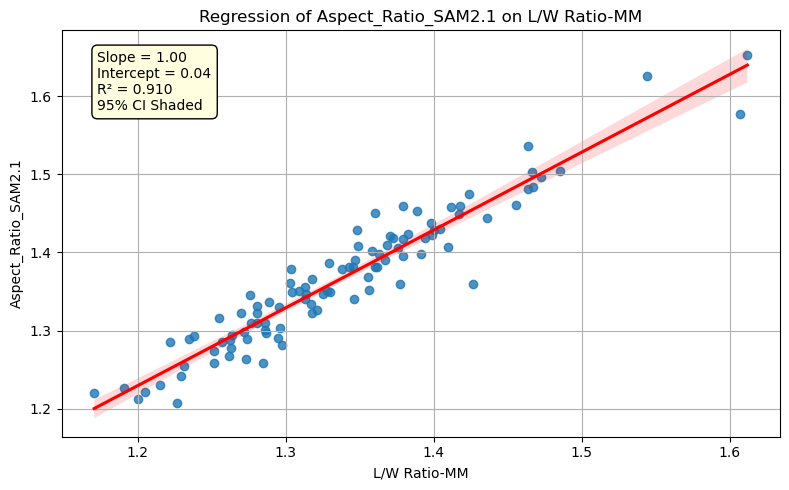


ANOVA result across ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']: F_onewayResult(statistic=3.2476864925895295, pvalue=0.040248498898946564)
Kruskal-Wallis Test across ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']: KruskalResult(statistic=7.05719867109633, pvalue=0.029345990980470034)


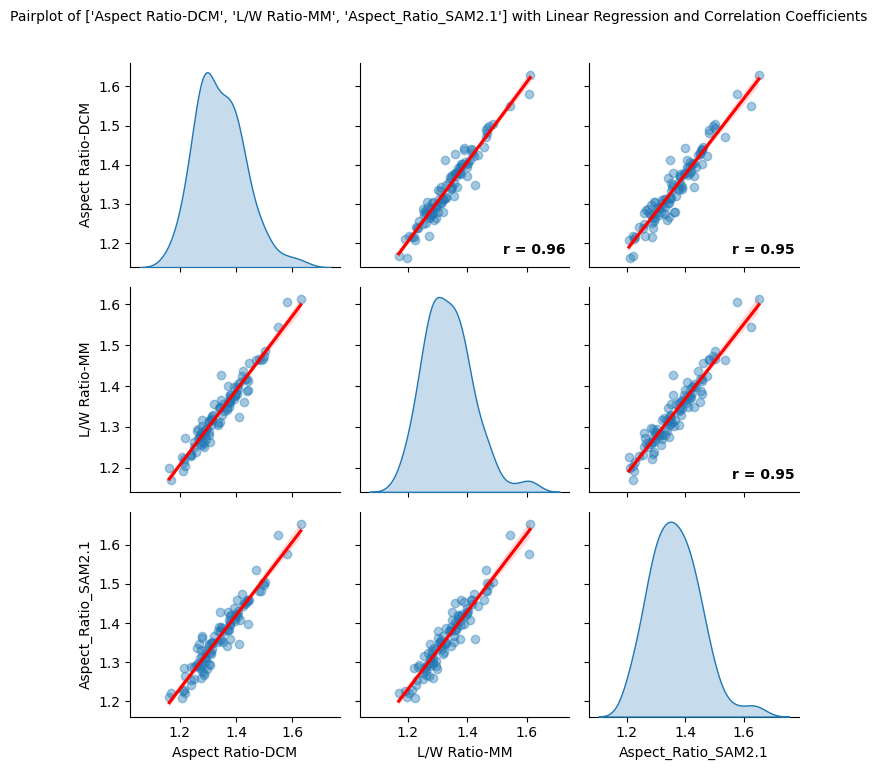

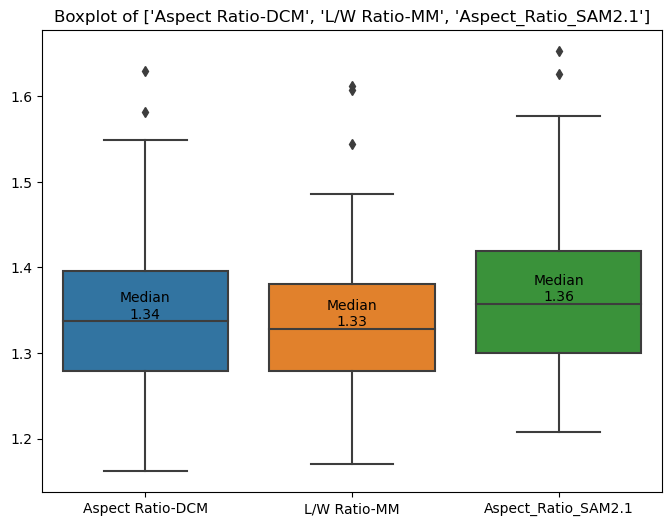

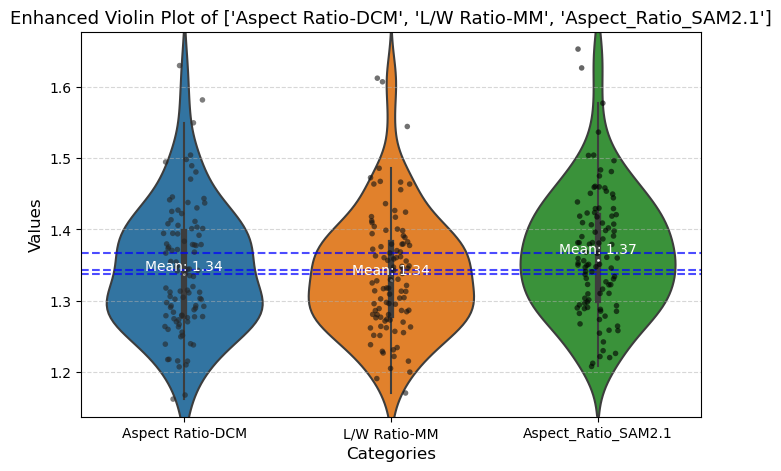

In [125]:
analyze_columns(df_100images, ["Aspect Ratio-DCM","L/W Ratio-MM","Aspect_Ratio_SAM2.1"])

The analysis of 'L/W Ratio-MM' and 'Aspect_Ratio_SAM2.1' shows a strong positive correlation between the two variables. Both exhibit similar central tendencies, with slight variations in their distributions. Statistical tests indicate non-normal distributions, but no significant difference in variances. The linear regression model demonstrates a strong relationship, and both ANOVA and Kruskal-Wallis tests confirm significant differences between the variables. Visualization plots further support the strong correlation and consistent patterns between the two.

#### Effect size

In [126]:
# Cohen-s d test for aspect ratio
effect_size(df_100images, ["Aspect Ratio-DCM", "L/W Ratio-MM"])
effect_size(df_100images, ["L/W Ratio-MM", "Aspect_Ratio_SAM2.1"])
effect_size(df_100images, ["Aspect Ratio-DCM", "Aspect_Ratio_SAM2.1"])

The Cohen's d for Aspect Ratio-DCM and L/W Ratio-MM: 0.063 
Effect Size Interpretation for Aspect Ratio-DCM and L/W Ratio-MM: Small (negligible)
The Cohen's d for L/W Ratio-MM and Aspect_Ratio_SAM2.1: -0.343 
Effect Size Interpretation for L/W Ratio-MM and Aspect_Ratio_SAM2.1: Small to Medium
The Cohen's d for Aspect Ratio-DCM and Aspect_Ratio_SAM2.1: -0.271 
Effect Size Interpretation for Aspect Ratio-DCM and Aspect_Ratio_SAM2.1: Small to Medium


The Cohen's d for 'L/W Ratio-MM' and 'Aspect_Ratio_SAM2.1' is -0.343, indicating a small to medium effect size. This suggests a modest difference between the two variables, with the magnitude of the effect being noticeable but not large. The interpretation of the effect size implies that while there is a meaningful difference, it is not substantial, and the two variables are relatively similar in terms of their overall relationship.

#### Error analysis

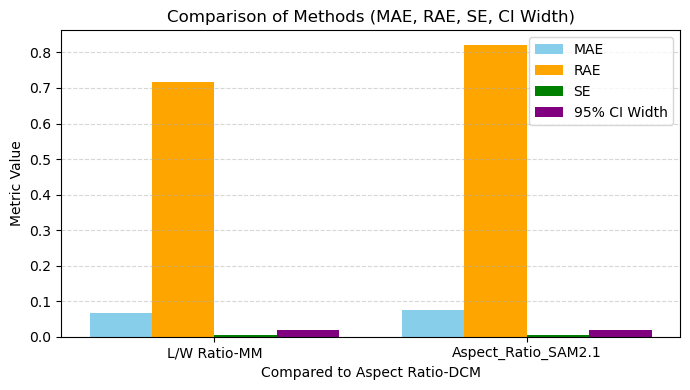

Reference Method      Compared Method       MAE       RAE        SE  \
0  Aspect Ratio-DCM         L/W Ratio-MM  0.065965  0.718084  0.004545   
1  Aspect Ratio-DCM  Aspect_Ratio_SAM2.1  0.075446  0.821285  0.004711   

   CI Lower  CI Upper  CI Width  
0  1.327327  1.345175  0.017848  
1  1.357022  1.375524  0.018503

In [127]:
compare_three_methods_with_plot(df_100, ["Aspect Ratio-DCM", "L/W Ratio-MM", "Aspect_Ratio_SAM2.1"])

The results for the comparison between the reference method 'L/W Ratio-MM' and the compared method 'Aspect_Ratio_SAM2.1' show that the methods have a small average difference, indicating a close agreement. The relative error suggests a moderate discrepancy between the methods. The standard error is low, reflecting minimal variability in the estimates. The confidence interval indicates a narrow range of uncertainty around the estimates, reinforcing the consistency and reliability of the compared method. Overall, the results suggest a strong alignment between the two methods with minimal error and reliable estimates.

#### Agreement levels

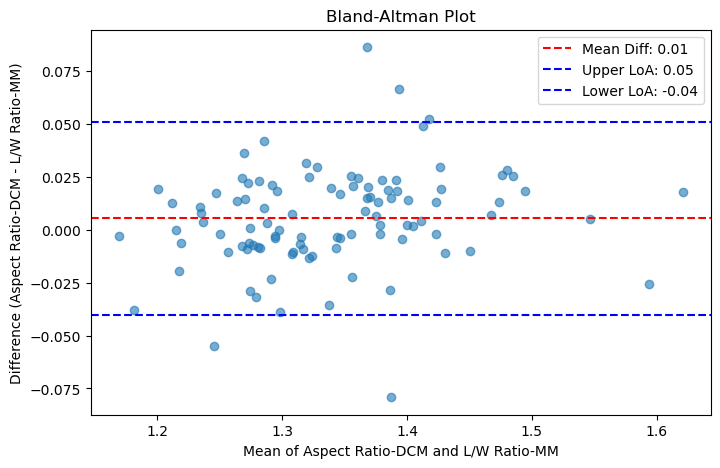

In [128]:

bland_altman_plot(df_100images["Aspect Ratio-DCM"], df_100images["L/W Ratio-MM"], label_a="Aspect Ratio-DCM", label_b="L/W Ratio-MM")

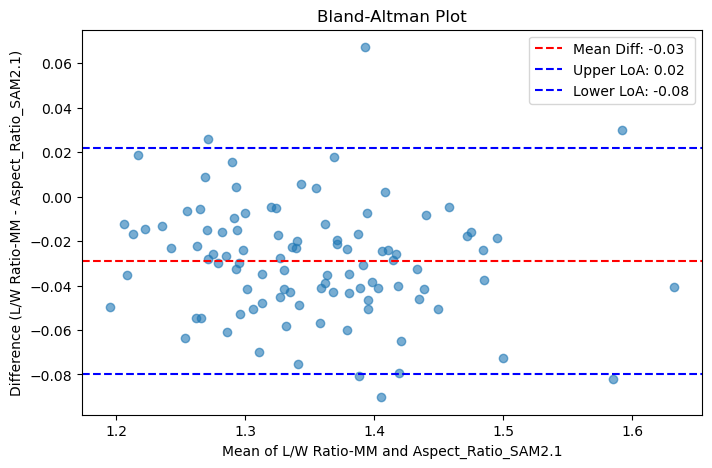

In [129]:
bland_altman_plot(df_100images["L/W Ratio-MM"], df_100images["Aspect_Ratio_SAM2.1"], label_a="L/W Ratio-MM", label_b="Aspect_Ratio_SAM2.1")

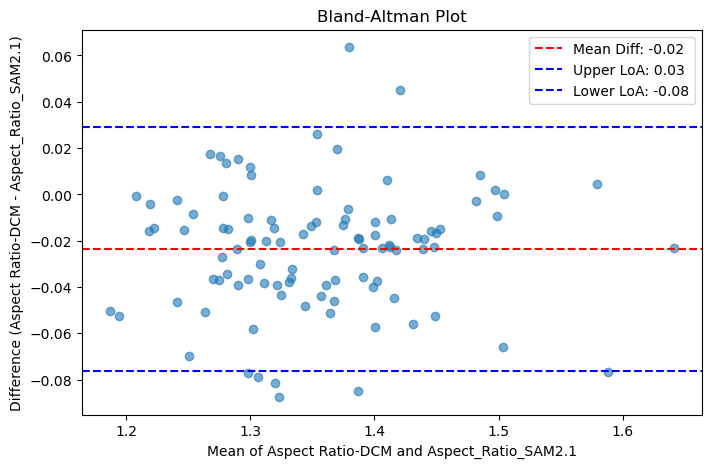

In [130]:
bland_altman_plot(df_100images["Aspect Ratio-DCM"], df_100images["Aspect_Ratio_SAM2.1"], label_a="Aspect Ratio-DCM", label_b="Aspect_Ratio_SAM2.1")

The Bland-Altman plot for 'L/W-MM' and 'Aspect Ratio-SAM' reveals a small mean difference, indicating a slight bias between the two methods. The Upper Limit of Agreement (LoO) is positive, while the Lower Limit of Agreement is negative, suggesting that the two methods show some variability in their differences. The range between the upper and lower limits highlights the extent of disagreement between the methods, although the differences remain relatively small. This indicates a general agreement between the two methods with some degree of variability in their results.

### Average seed area (pixels)

#### Descriptive statistics


Analyzing columns: ['Area(pix)-MM', 'Area_pix_SAM2.1']

Descriptive Statistics:
        Area(pix)-MM  Area_pix_SAM2.1
count    100.000000       100.000000
mean   17701.160631     81758.814036
std     7589.835066     35249.181415
min     5672.500000     26675.500000
25%    12065.925000     54828.608333
50%    15745.833333     72479.025000
75%    21736.775000    101337.475000
max    37010.000000    177932.000000

Skewness:
 Area(pix)-MM       0.696297
Area_pix_SAM2.1    0.722903
dtype: float64

Kurtosis:
 Area(pix)-MM      -0.321861
Area_pix_SAM2.1   -0.266040
dtype: float64


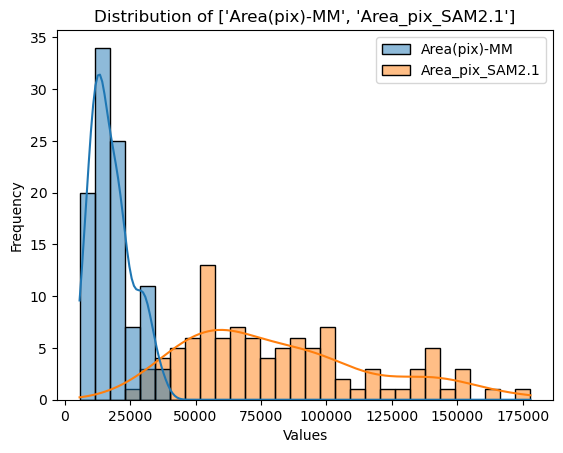


Shapiro-Wilk Test for 'Area(pix)-MM': ShapiroResult(statistic=0.9414982199668884, pvalue=0.00023822116781957448)

Shapiro-Wilk Test for 'Area_pix_SAM2.1': ShapiroResult(statistic=0.9403230547904968, pvalue=0.00020175192912574857)

Levene's Test for equality of variances: LeveneResult(statistic=89.97541421515889, pvalue=7.846715424663481e-18)
Pearson correlation between 'Area(pix)-MM' and 'Area_pix_SAM2.1': PearsonRResult(statistic=0.9967298165968752, pvalue=6.859499172347095e-109)


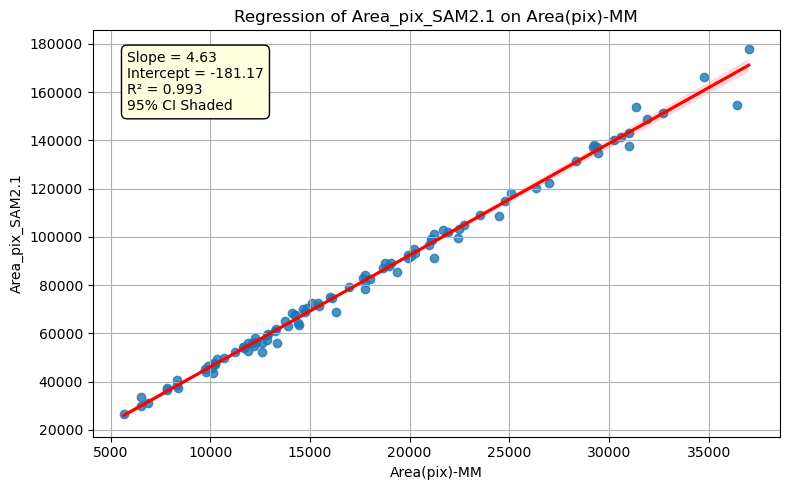


ANOVA result across ['Area(pix)-MM', 'Area_pix_SAM2.1']: F_onewayResult(statistic=315.618043016356, pvalue=7.48020359991033e-43)
Kruskal-Wallis Test across ['Area(pix)-MM', 'Area_pix_SAM2.1']: KruskalResult(statistic=147.1122149253731, pvalue=7.416526366763768e-34)


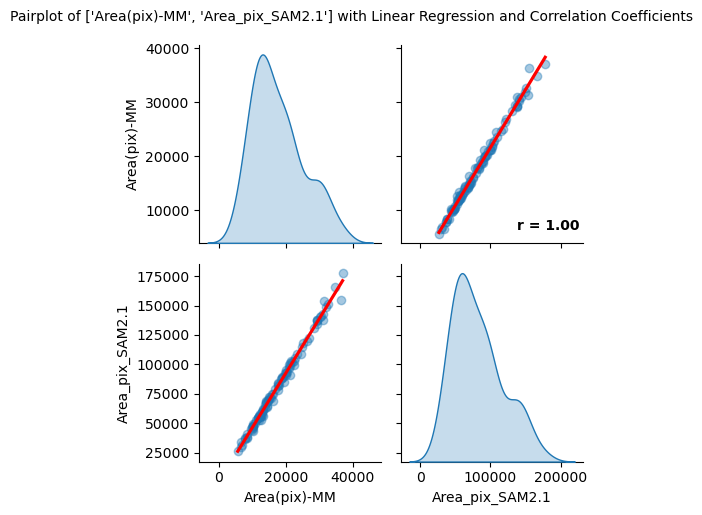

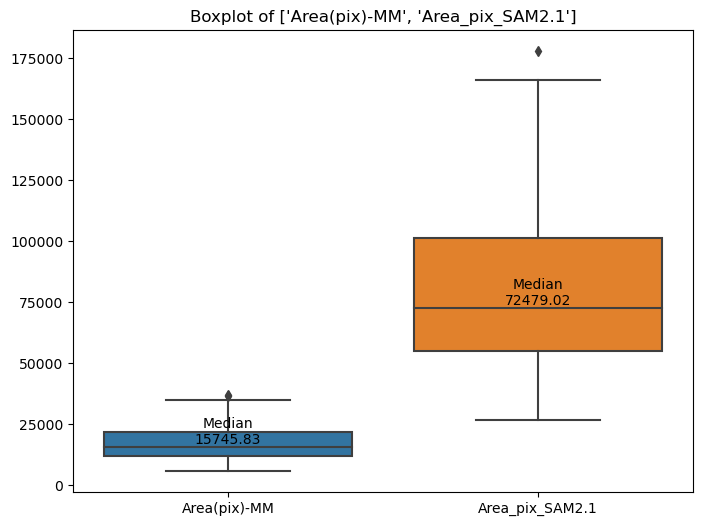

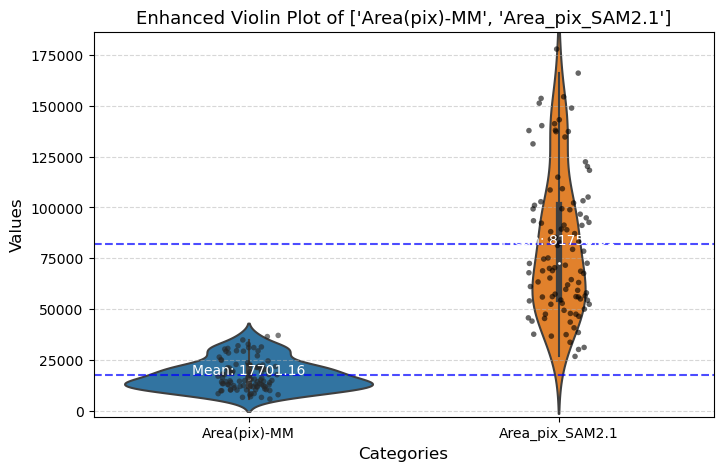

In [131]:
analyze_columns(df_100images, ["Area(pix)-MM", "Area_pix_SAM2.1"])

The analysis reveals different distribution patterns and central tendencies between the two variables. Both exhibit comparable ranges and levels of variability, with the data showing a slightly right-skewed distribution. A very strong positive correlation (1.0) is observed between the two variables, as confirmed by Pearson correlation and visualized in the pairplot. the values in violin plot are spread out more on th ey-axis. the reason may be due to differences in the measuremnet of pixel values from different approaches. Linear regression demonstrates a nearly one-to-one relationship, with a high degree of explanatory power. 

#### Effect size

In [132]:
# Cohen-s d test for Area in mm2
effect_size(df_100images, ["Area(pix)-MM", "Area_pix_SAM2.1"])

The Cohen's d for Area(pix)-MM and Area_pix_SAM2.1: -2.512 
Effect Size Interpretation for Area(pix)-MM and Area_pix_SAM2.1: Large


The Cohen's d value for the comparison indicates a large effect size. This suggests that the difference between the two methods in measuring area is maximal and likely practically significant, supporting the conclusion that both methods produce different pixel results.

#### Error analysis

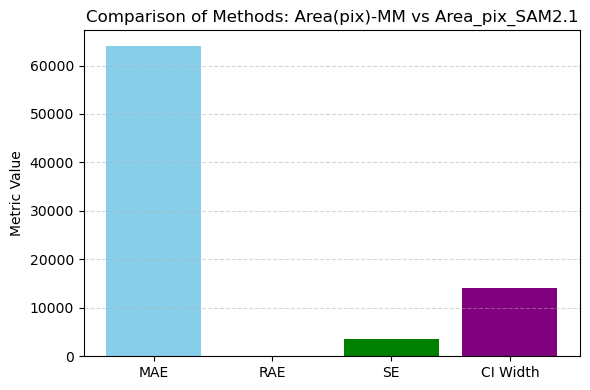

Reference Method  Compared Method           MAE        RAE           SE  \
0     Area(pix)-MM  Area_pix_SAM2.1  64057.653405  10.307515  3524.918141   

       CI Lower      CI Upper      CI Width  
0  74764.611707  88753.016365  13988.404658

In [133]:
compare_two_methods_with_plot(df_100images, ["Area(pix)-MM", "Area_pix_SAM2.1"])

The comparison between the reference method shows a relatively high mean absolute error, indicating a high average difference in area measurements. The relative absolute error is also low, suggesting strong alignment with the reference method. The standard error reflects moderate variability in the estimates. The confidence interval is reasonably wide. Overall, the results suggest that the compared method do not closely matche the reference method intwerms of pixel values.

#### Levels of agreement

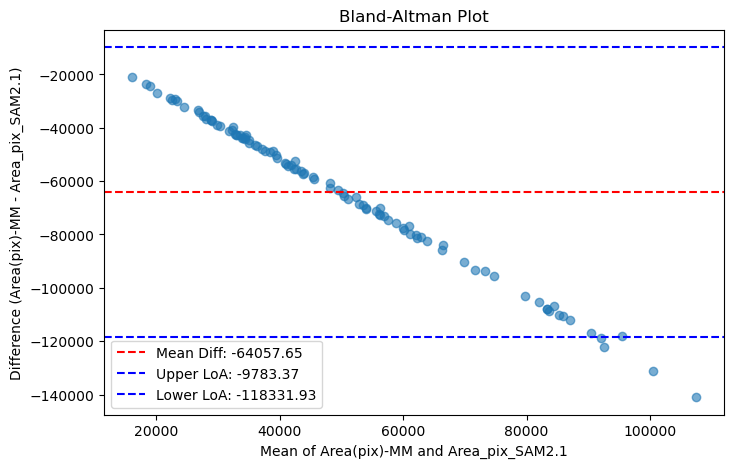

In [134]:
bland_altman_plot(df_100images["Area(pix)-MM"], df_100images["Area_pix_SAM2.1"], label_a="Area(pix)-MM", label_b="Area_pix_SAM2.1")


The Bland-Altman plot comparing shows a high negative mean difference, indicating a slight bias between the two methods. The limits of agreement span a huge range, with both the limits being negative. This range reflects the extent of variability between the methods, suggesting that the two methods do not agree, there are instances where their measurements differ to a large degree. Overall, the plot indicates reasonable disagreement in the values.

### Circularity

#### Descriptive statistics


Analyzing columns: ['Circularity-MM', 'Circularity_SAM2.1']

Descriptive Statistics:
        Circularity-MM  Circularity_SAM2.1
count      100.000000          100.000000
mean         1.174765            1.169086
std          0.025068            0.020592
min          1.133777            1.126724
25%          1.160155            1.156095
50%          1.168721            1.166566
75%          1.184959            1.179042
max          1.301300            1.251119

Skewness:
 Circularity-MM        2.288155
Circularity_SAM2.1    1.027468
dtype: float64

Kurtosis:
 Circularity-MM        8.404400
Circularity_SAM2.1    2.276893
dtype: float64


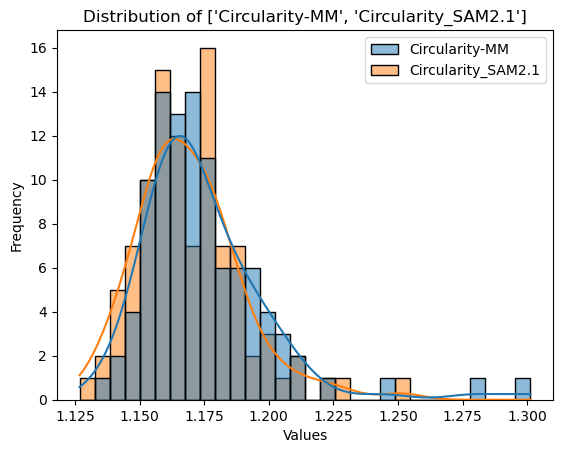


Shapiro-Wilk Test for 'Circularity-MM': ShapiroResult(statistic=0.822309136390686, pvalue=1.274788385963177e-09)

Shapiro-Wilk Test for 'Circularity_SAM2.1': ShapiroResult(statistic=0.9489814043045044, pvalue=0.0007112675812095404)

Levene's Test for equality of variances: LeveneResult(statistic=0.18597625403099735, pvalue=0.6667560139978701)
Pearson correlation between 'Circularity-MM' and 'Circularity_SAM2.1': PearsonRResult(statistic=0.8679371464571461, pvalue=1.5146899871673454e-31)


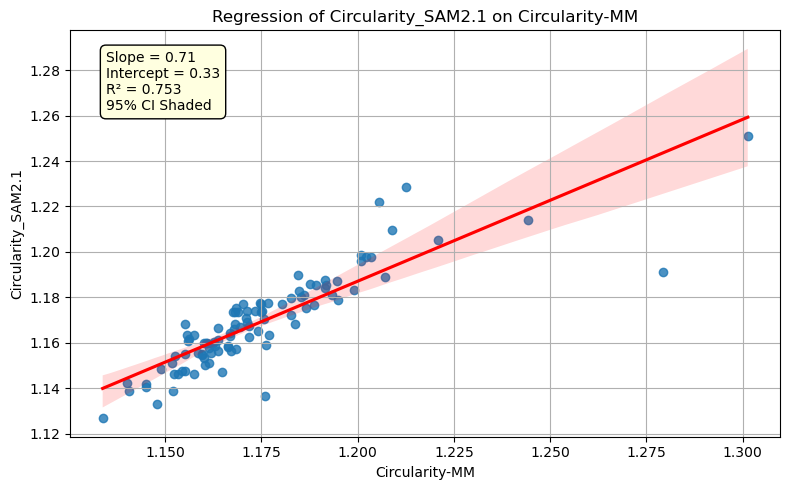


ANOVA result across ['Circularity-MM', 'Circularity_SAM2.1']: F_onewayResult(statistic=3.0638454712977583, pvalue=0.08160090889382622)
Kruskal-Wallis Test across ['Circularity-MM', 'Circularity_SAM2.1']: KruskalResult(statistic=2.2949253731343333, pvalue=0.12979744923622918)


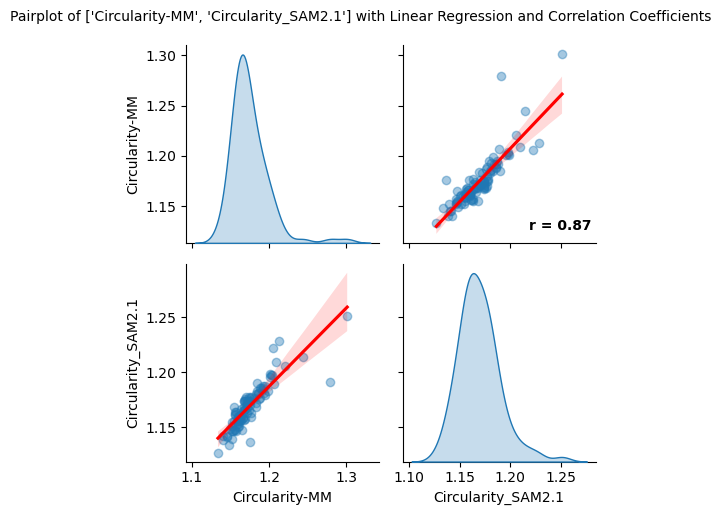

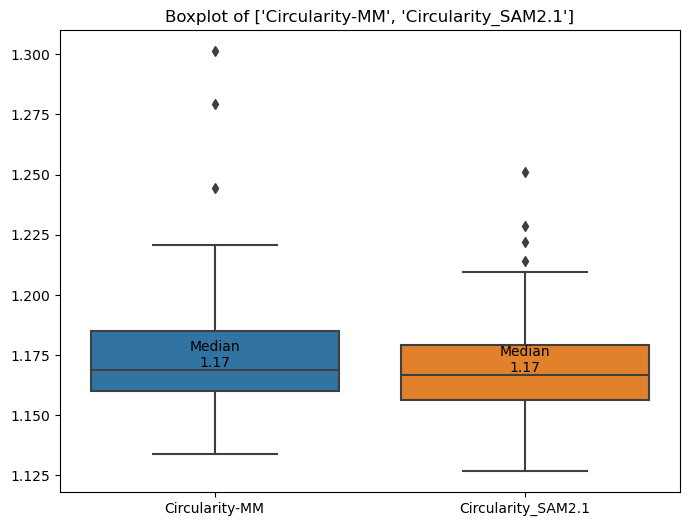

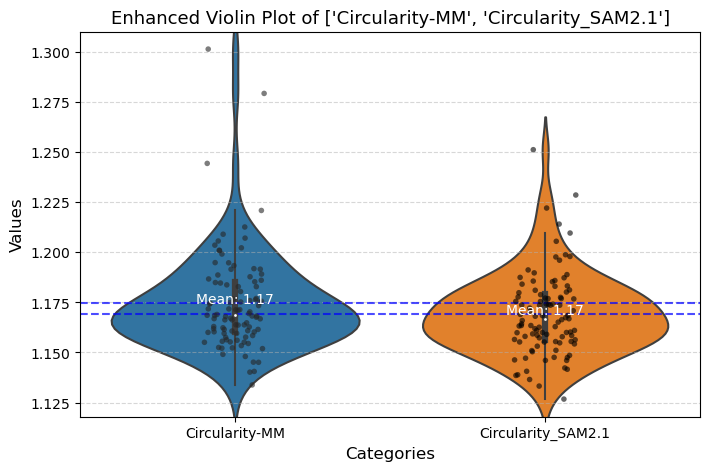

In [135]:
analyze_columns(df_100images, ["Circularity-MM","Circularity_SAM2.1"])

The comparison between 'Circularity-MM' and 'Circularity_SAM2.1' shows similar central tendencies with slightly skewed, non-normal distributions and no significant difference in variances. A strong positive correlation is observed between the two variables, supported by both the Pearson correlation coefficient and the pairplot. Regression analysis shows a substantial linear relationship, explaining a large portion of the variance. Although statistical tests do not indicate significant differences, the results suggest close agreement between the methods. Visualizations, including box plots and violin plots, further confirm this consistency.

#### Effect size

In [136]:
# Cohen-s d test for Area in pixels
effect_size(df_100images, ["Circularity-MM", "Circularity_SAM2.1"])

The Cohen's d for Circularity-MM and Circularity_SAM2.1: 0.248 
Effect Size Interpretation for Circularity-MM and Circularity_SAM2.1: Small to Medium


The Cohen's d value for the comparison between 'Circularity-MM' and 'Circularity_SAM2.1' indicates a small to medium effect size. This suggests a modest difference between the two methods, implying that while they are generally comparable, there is a slight but noticeable variation in their circularity measurements.

#### Error analysis

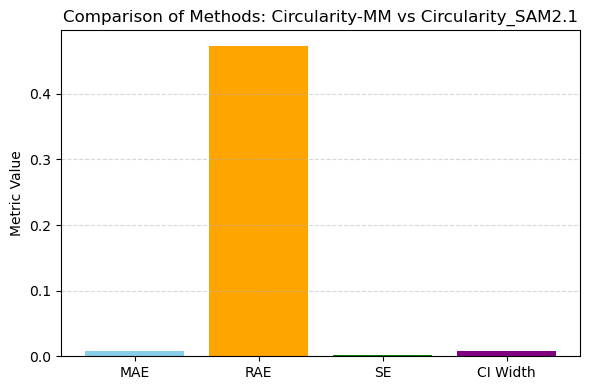

Reference Method     Compared Method       MAE       RAE        SE  \
0   Circularity-MM  Circularity_SAM2.1  0.008106  0.473163  0.002059   

   CI Lower  CI Upper  CI Width  
0     1.165  1.173172  0.008172

In [137]:
compare_two_methods_with_plot(df_100images, ["Circularity-MM", "Circularity_SAM2.1"])

The comparison between the reference method 'Circularity-MM' and the compared method 'Circularity_SAM2.1' shows a small mean absolute error, indicating minimal average deviation between the two methods. The relative absolute error is moderate, suggesting a reasonably close match to the reference. The standard error is low, reflecting minimal variability in the estimates. The confidence interval is narrow, with close lower and upper bounds, indicating a high level of precision and consistency in the compared method's measurements. Overall, the results suggest strong agreement and reliable performance of the compared method relative to the reference.

#### Agreement levels

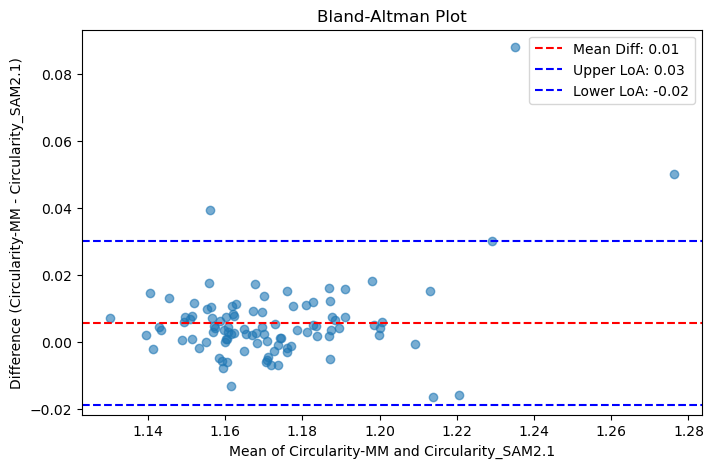

In [138]:
bland_altman_plot(df_100images["Circularity-MM"], df_100images["Circularity_SAM2.1"], label_a="Circularity-MM", label_b="Circularity_SAM2.1")

The Bland-Altman plot comparing 'Circularity-MM' and 'Circularity-SAM' shows a very small mean difference, indicating minimal bias between the two methods. The limits of agreement are narrow, suggesting that the differences between measurements are minor and fall within an acceptable range. This implies a high level of agreement and consistency between the circularity values obtained from both methods.

## Conclusion:
Despite some minor systematic biases and small statistical differences, SAM2.1 demonstrated strong alignment with both the MM (silver standard) and DCM (gold standard) across all measured parameters. Length and width estimates from SAM2.1 showed high precision, with small mean absolute errors and narrow confidence intervals, and their correlations with both standards were consistently strong. Area measurements in both mm² and pixels reflected high linear agreement, particularly with MM, supporting SAM2.1’s capacity for accurate spatial quantification. Aspect ratio and circularity, though exhibiting moderate correlations and minor overestimation, still fell within acceptable limits of agreement and showed reasonable consistency. Overall, the performance of SAM2.1 closely mirrors that of established reference methods, confirming its validity as a reliable tool for bean morphological assessment. These results support the use of SAM2.1 for high-throughput phenotyping workflows where both accuracy and consistency relative to gold and silver standards are essential.

#### Overall, SAM2.1 measurements aligned closely with both MM (silver standard) and DCM (gold standard), demonstrating high consistency, precision, and acceptable agreement across all parameters. These results support SAM2.1 as a reliable method for morphological analysis in comparison to established standards.
